In [1]:
import gym
import pickle
import numpy as np
import matplotlib.pyplot as plt

from sklearn.utils import shuffle
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C

from matplotlib import animation
from JSAnimation.IPython_display import display_animation
from IPython.display import display
%matplotlib inline

def display_frames_as_gif(frames):
    patch = plt.imshow(frames[0])
    plt.axis('off')
    def animate(i):
        patch.set_data(frames[i])

    anim = animation.FuncAnimation(plt.gcf(), animate, frames = len(frames), interval=5)
    display(display_animation(anim, default_mode='loop'))

# Behavior Clonning 

# MountCar Example

### Load data from pickle file

Data file has (s,a) pairs

In [2]:
envname="MountainCarContinuous-v0"

# Load demonstrations
demo_file = open('./'+envname+'_expert_demo.pkl', 'rb')
demonstrations, = pickle.load(demo_file)
demonstrations = shuffle(demonstrations)

# Check expert's performance
exp_ret = np.mean([np.sum(d['rewards']) for d in demonstrations])
print('Expert\'s Average Cumulative Rewards {:.3f}'.format(exp_ret))

demo_observes = []
demo_actions = []
for demonstration in demonstrations:
    for obs in demonstration['observes']:
        demo_observes.append(obs)
    for act in demonstration['actions']:
        demo_actions.append(act)
demo_observes=np.asarray(demo_observes)
demo_actions=np.asarray(demo_actions)

demo_observes, demo_actions = shuffle(demo_observes, demo_actions)

demo_observes=demo_observes[:100,:]
demo_actions=demo_actions[:100,:]

Expert's Average Cumulative Rewards 92.459


### Print the shape of data
### Find observation dimension and action dimension

In [3]:
obs_dim = 
act_dim = 

print("Observation data has shape {}".format(demo_observes.shape))
print("Action data has shape {}".format(demo_actions.shape))

Observation data has shape (100, 2)
Action data has shape (100, 1)


### Run Gaussian Process Regression

In [4]:
kernel = C(1.0, (1e-3, 1e3)) * RBF(1, (1e-2, 1e2))
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=9)

demo_obs_mean = np.mean(demo_observes,axis=0,keepdims=True)
demo_obs_std = np.std(demo_observes,axis=0,keepdims=True)
nz_demo_observes = (demo_observes - demo_obs_mean)/demo_obs_std

gpr = gp.fit(nz_demo_observes, demo_actions)

c:\users\user\appdata\local\programs\python\python35\lib\site-packages\sklearn\gaussian_process\gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'nit': 13, 'warnflag': 2, 'funcalls': 78, 'grad': array([-0.00259018, -0.05104364])}
  " state: %s" % convergence_dict)
c:\users\user\appdata\local\programs\python\python35\lib\site-packages\sklearn\gaussian_process\gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'nit': 10, 'warnflag': 2, 'funcalls': 58, 'grad': array([-0.11516762,  0.03965686])}
  " state: %s" % convergence_dict)
c:\users\user\appdata\local\programs\python\python35\lib\site-packages\sklearn\gaussian_process\gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'nit': 12, 'warnflag': 2, 'funcalls': 89, 'grad': array([ 0.00098801, -0.00621898])}
  " state: %s" % conv

### Test GPR controller!

WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
Total Reward : 92.90



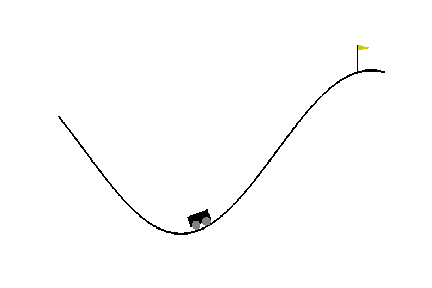
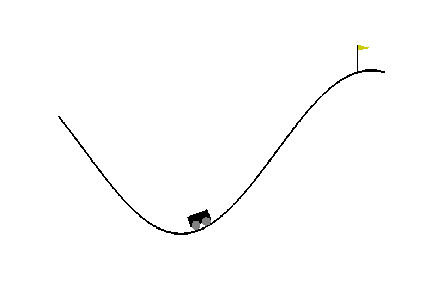
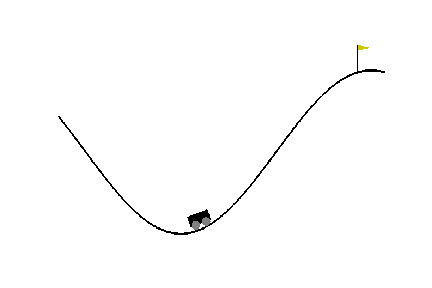
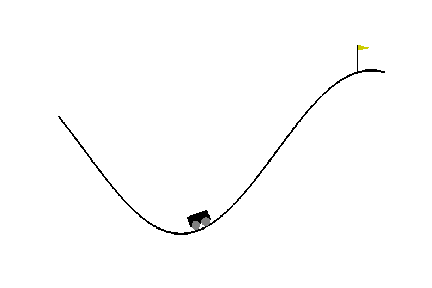
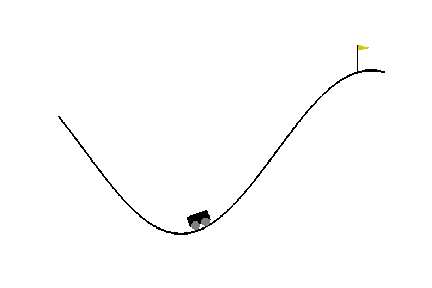
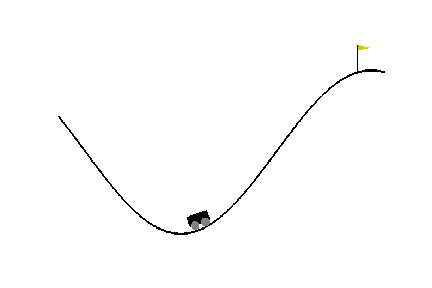
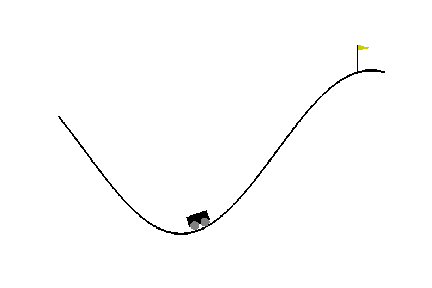
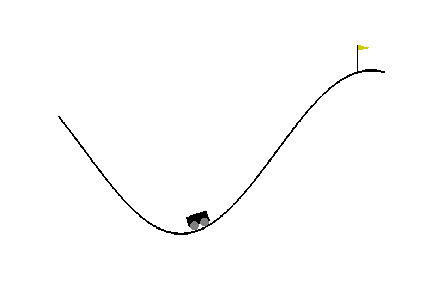
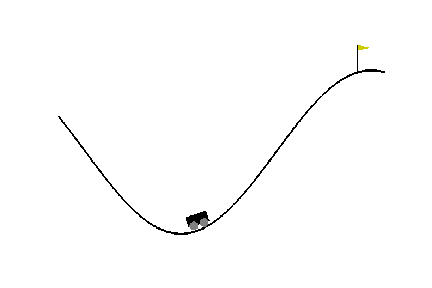
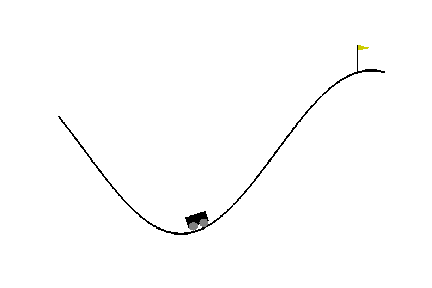
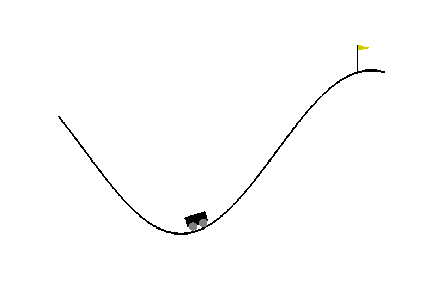
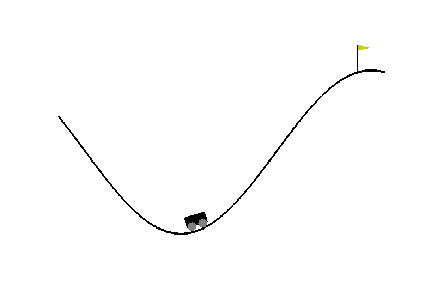
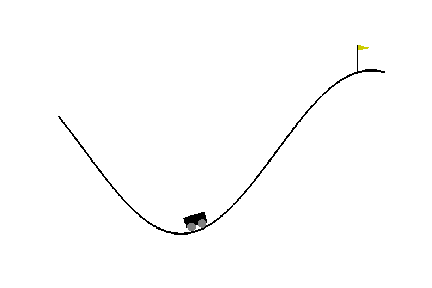
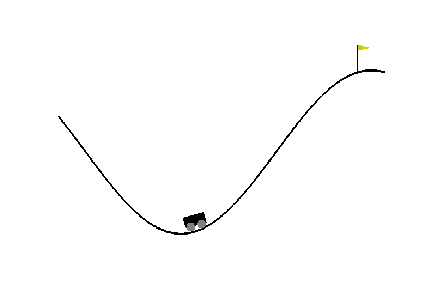
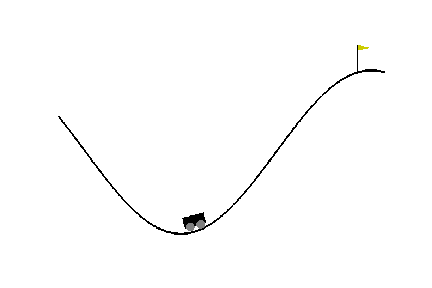
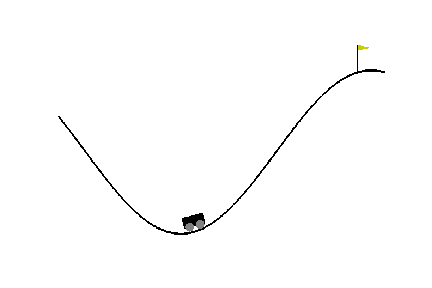
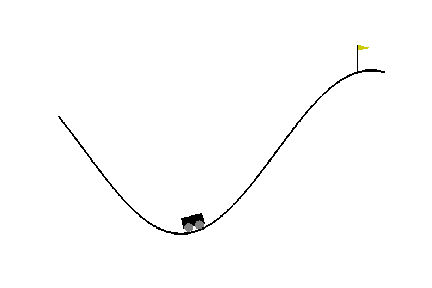
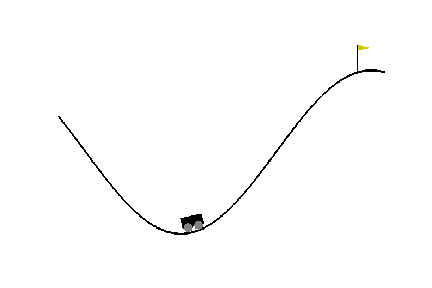
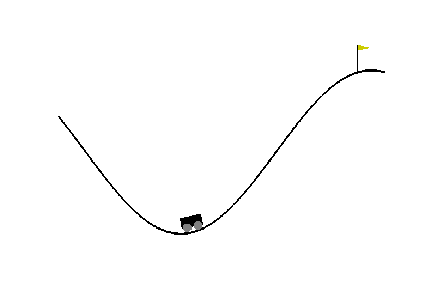
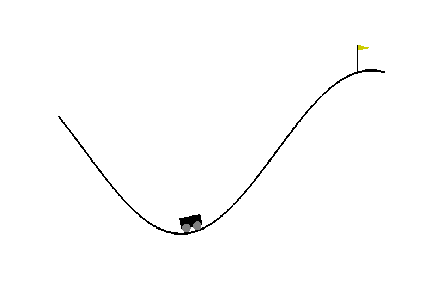
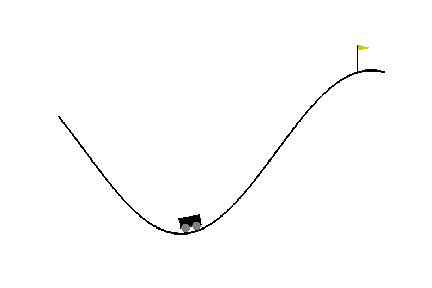
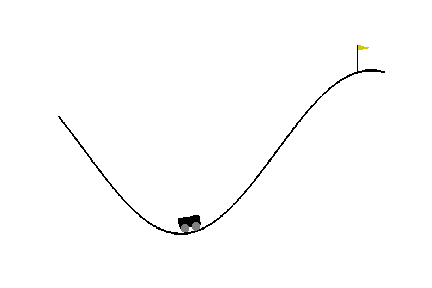
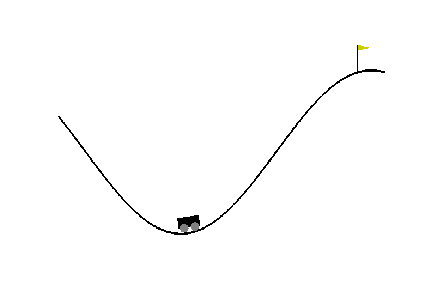
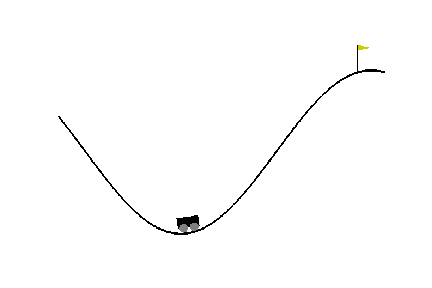
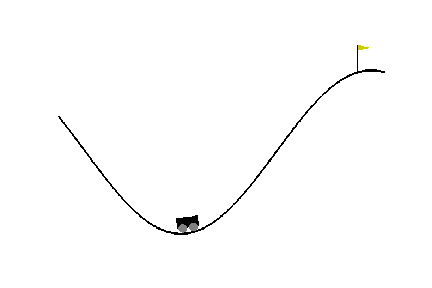
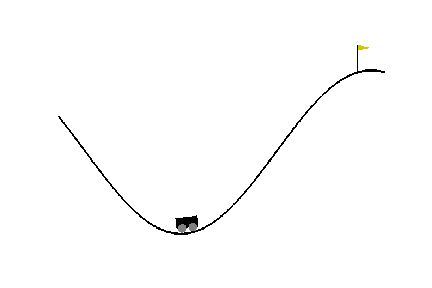
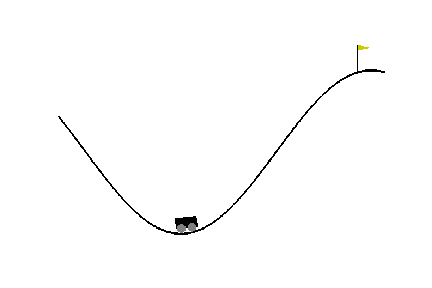
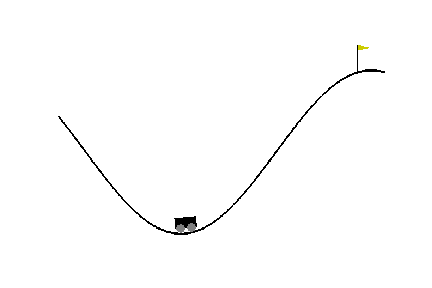
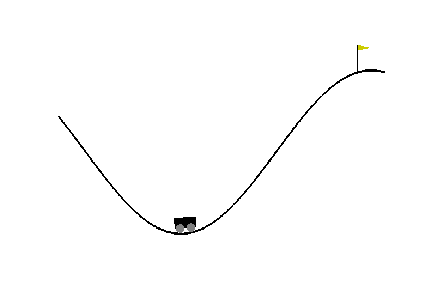
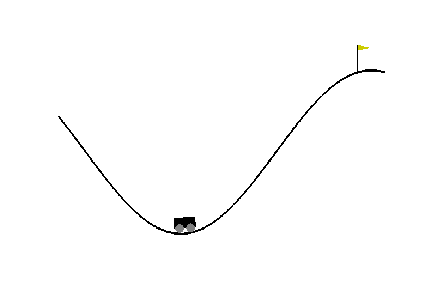
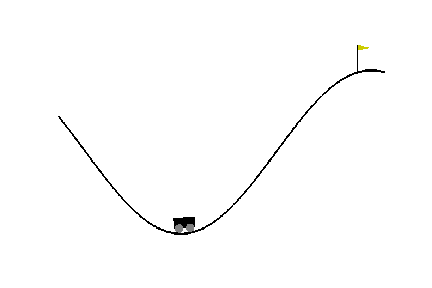
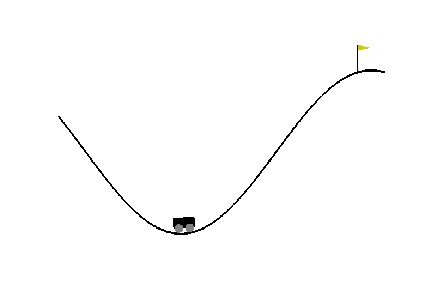
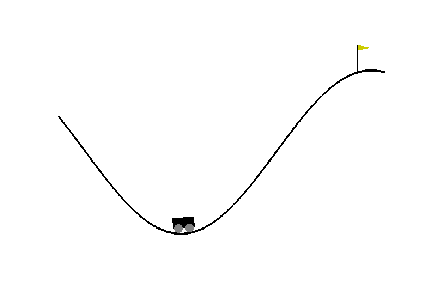
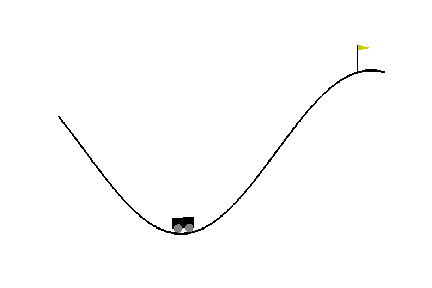
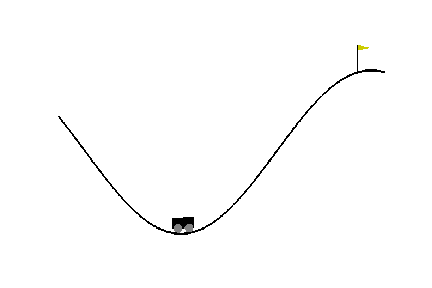
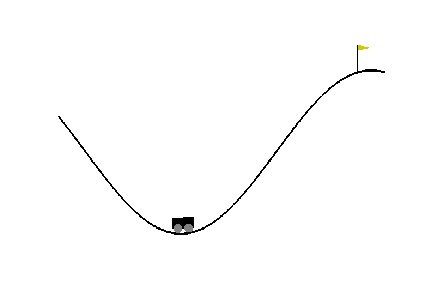
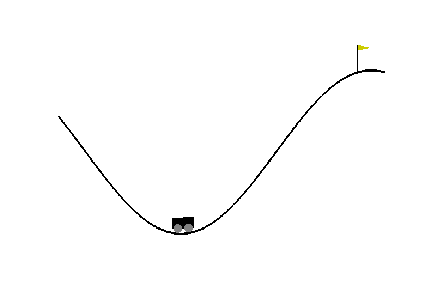
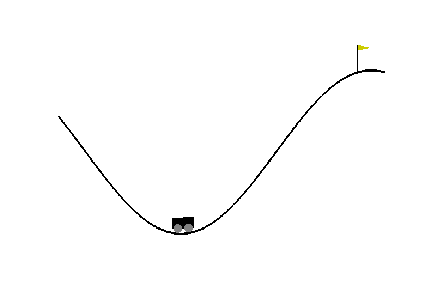
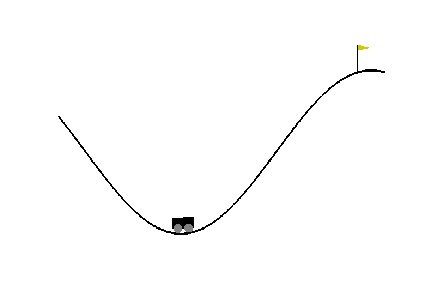
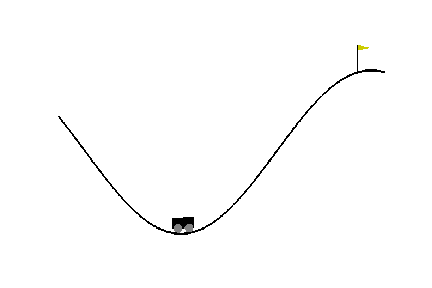
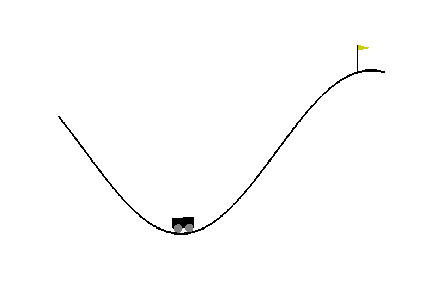
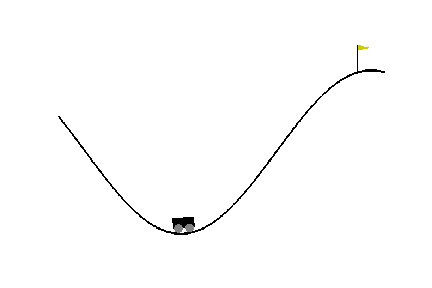
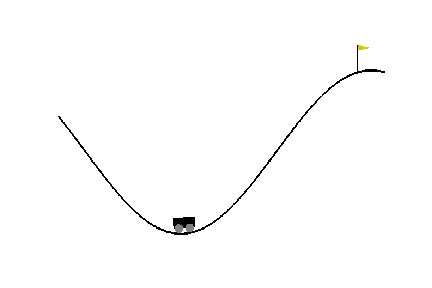
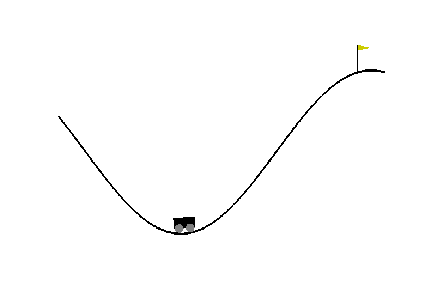
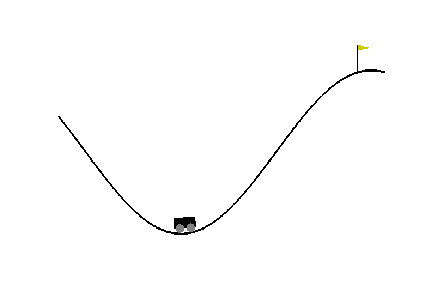
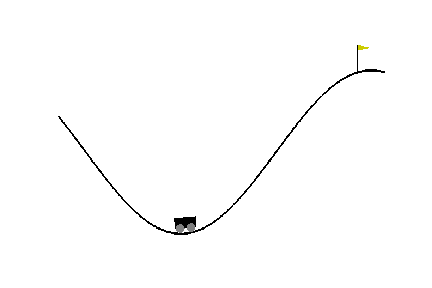
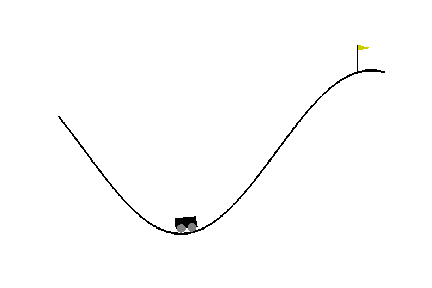
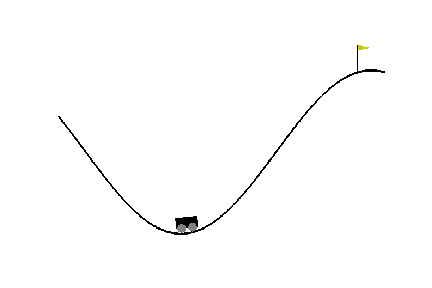
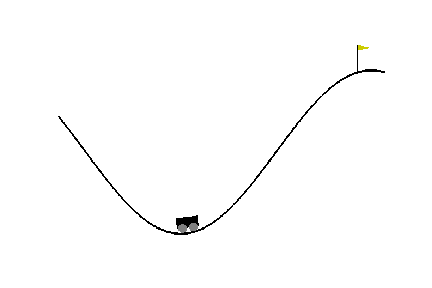
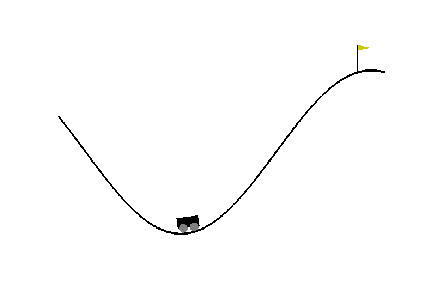
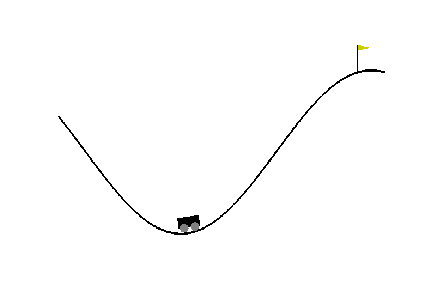
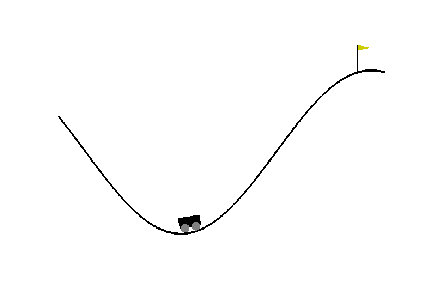
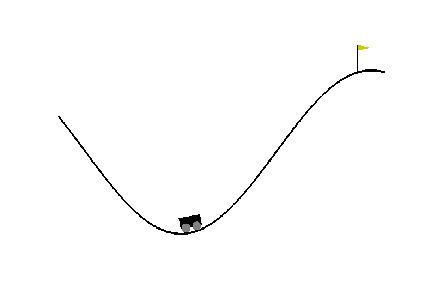
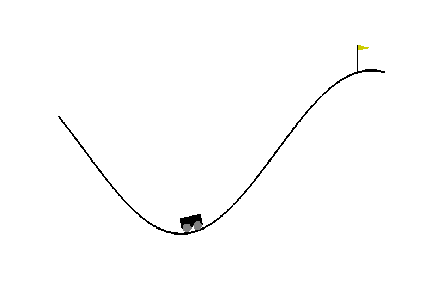
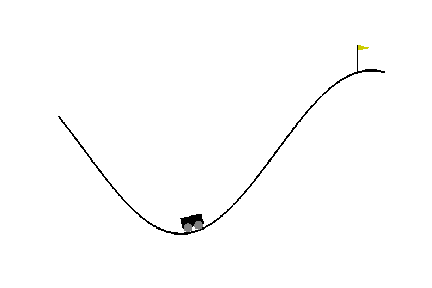
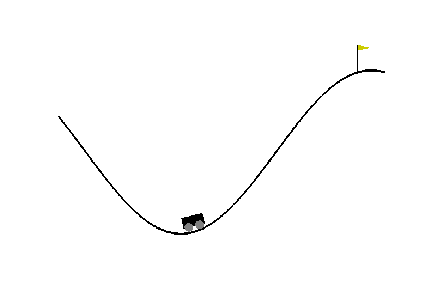
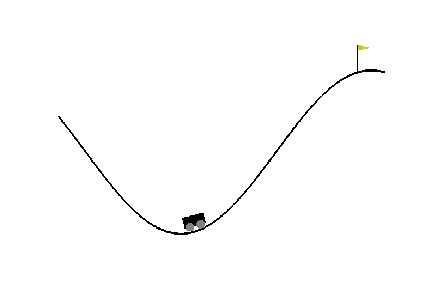
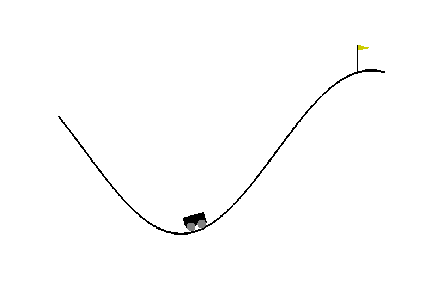
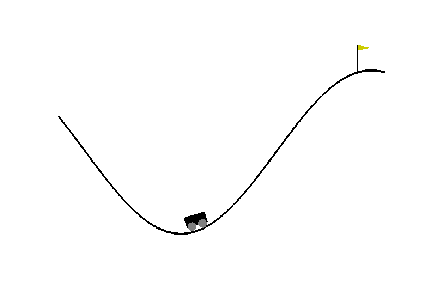
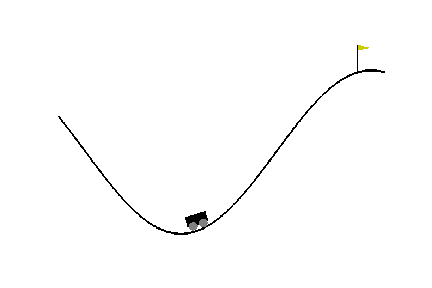
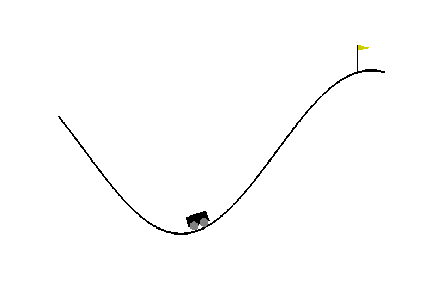
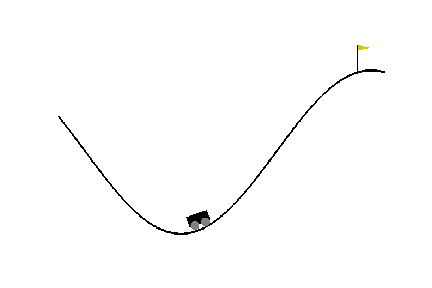
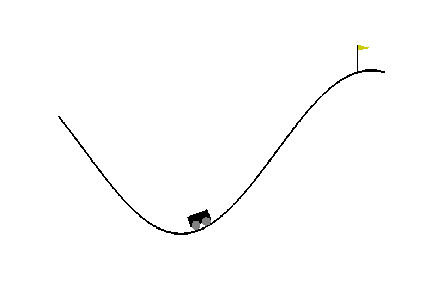
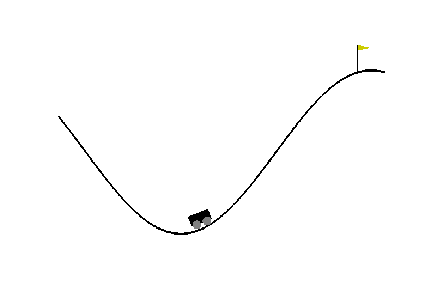
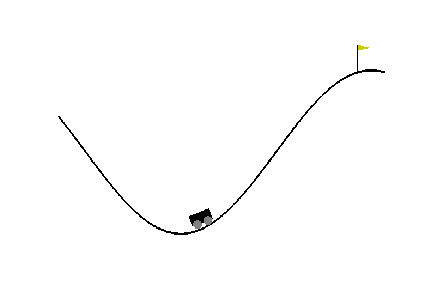
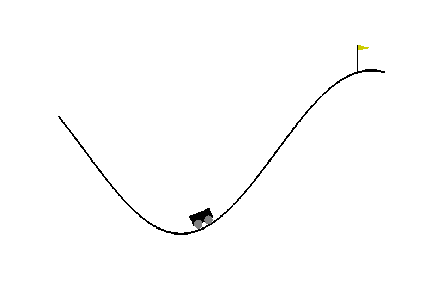
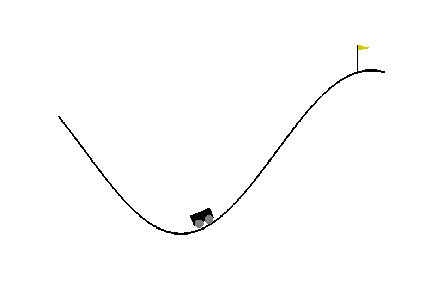
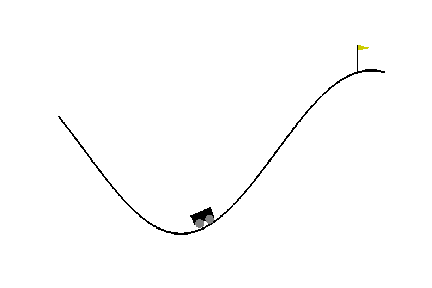
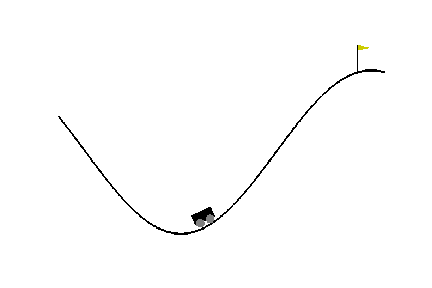
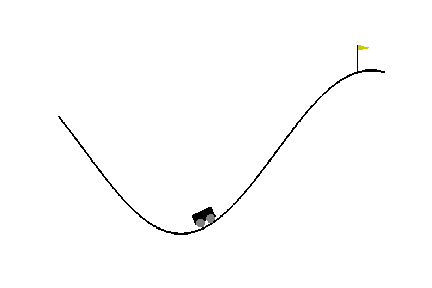
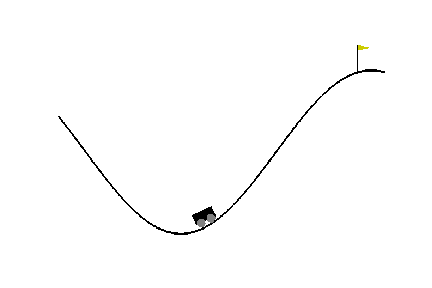
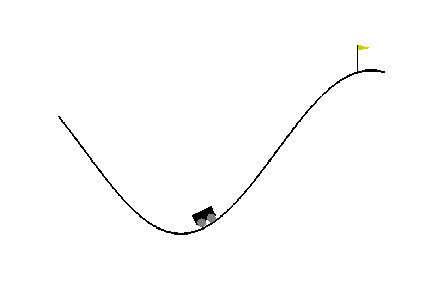
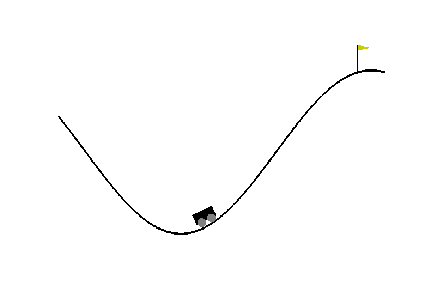
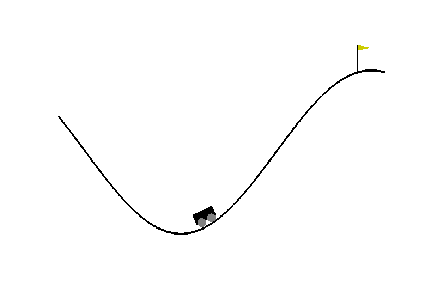
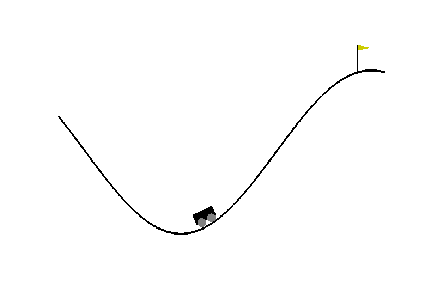
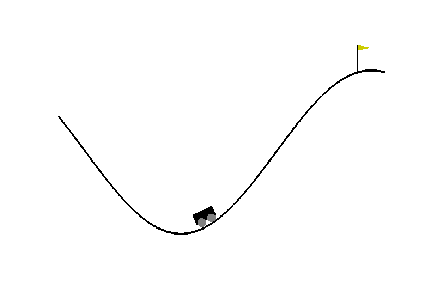
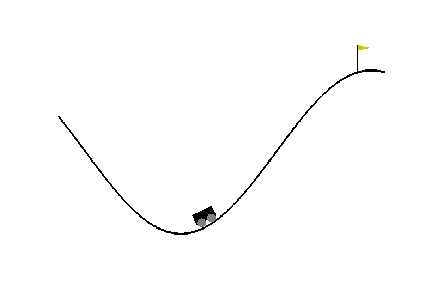
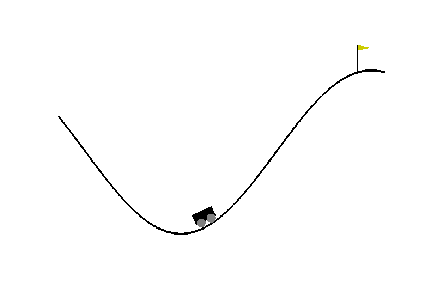
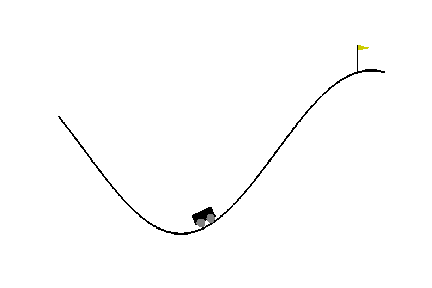
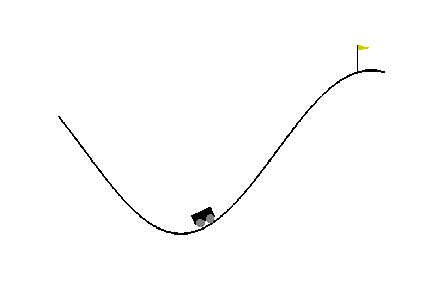
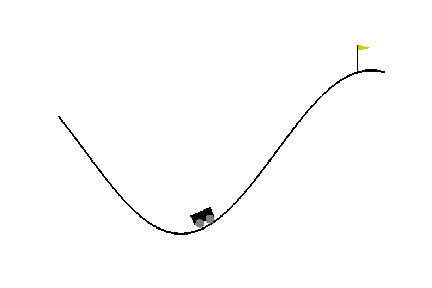
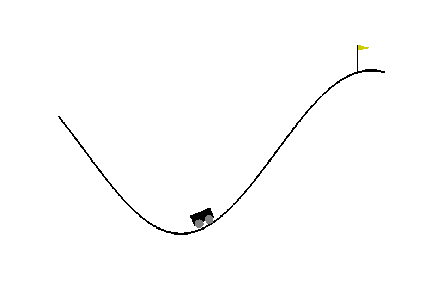
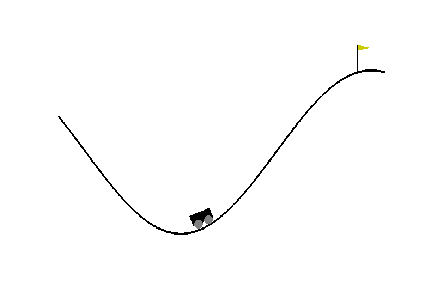
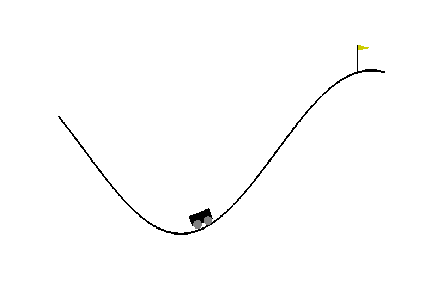
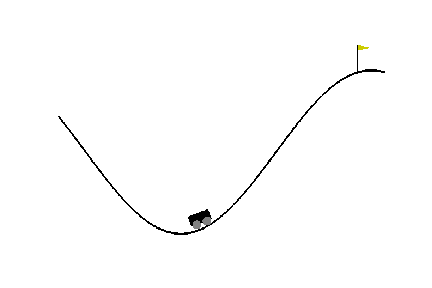
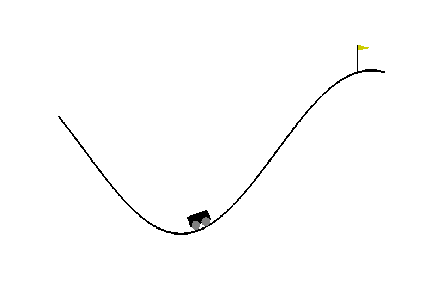
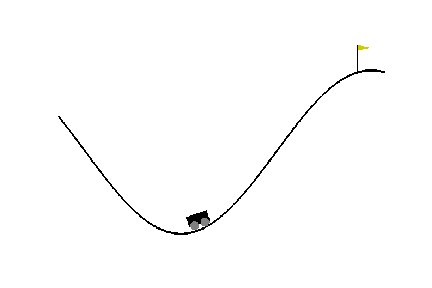
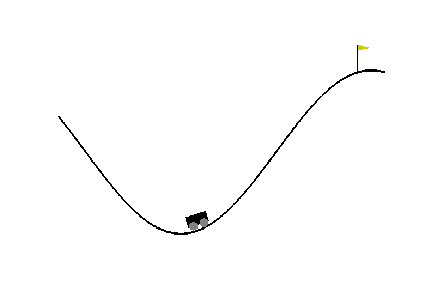
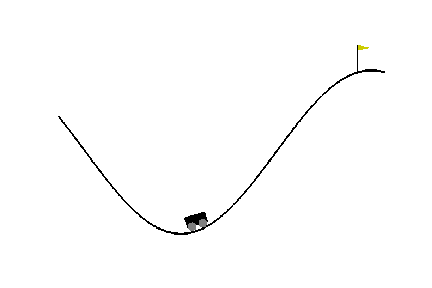
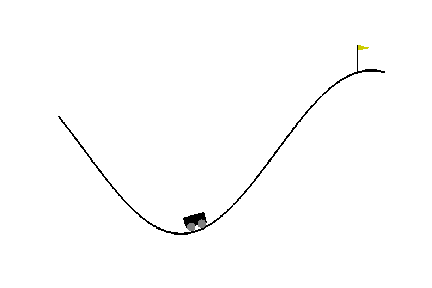
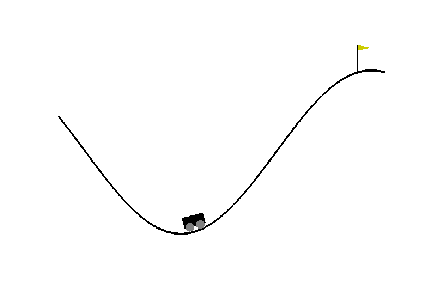
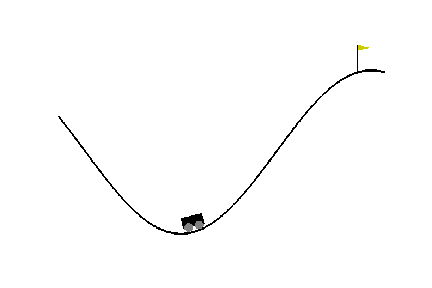
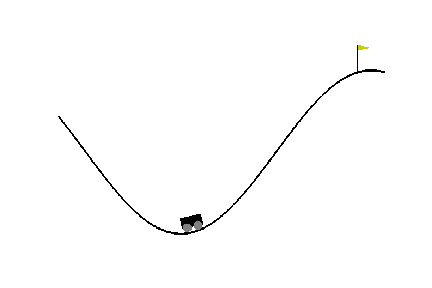
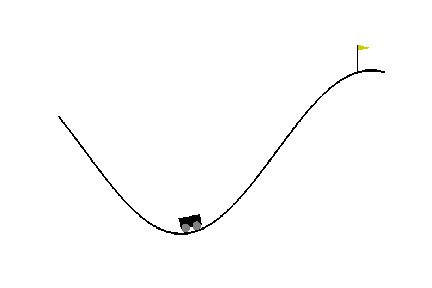
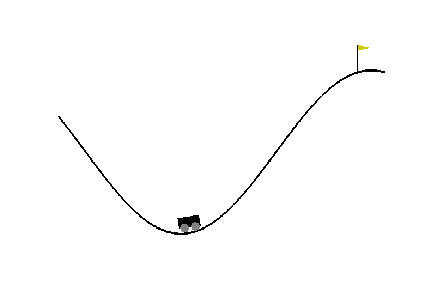
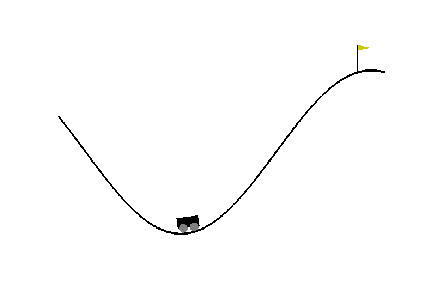
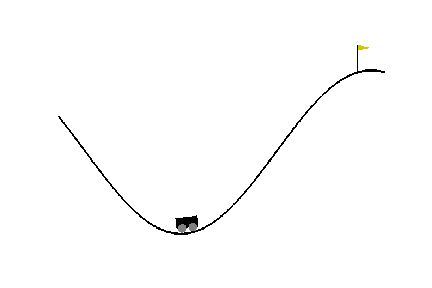
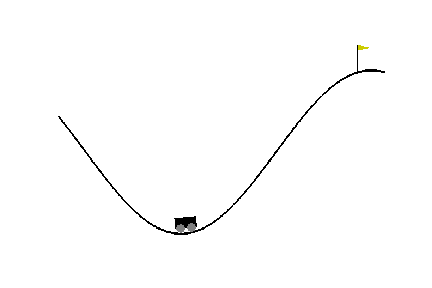
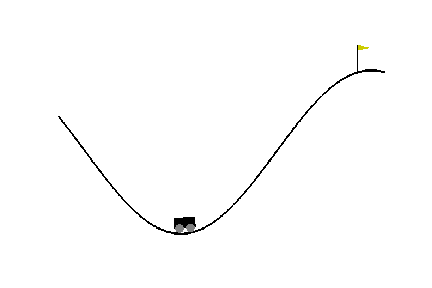
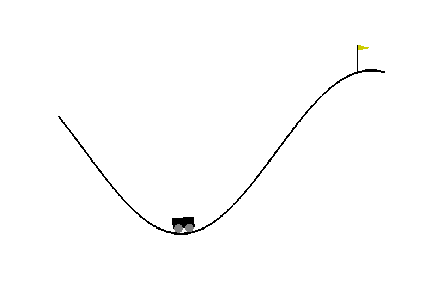
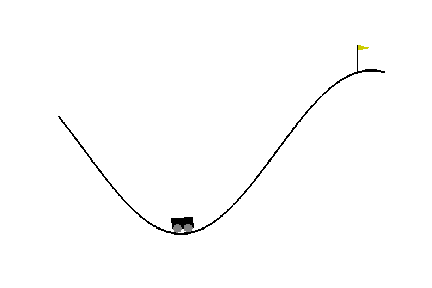
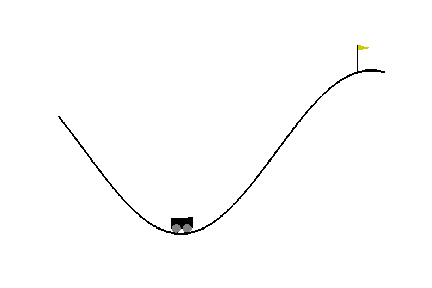
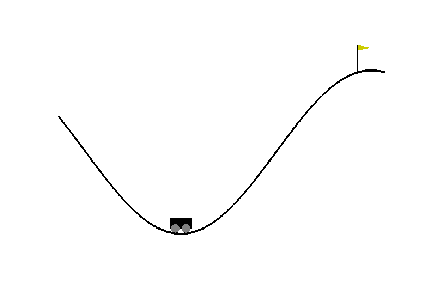
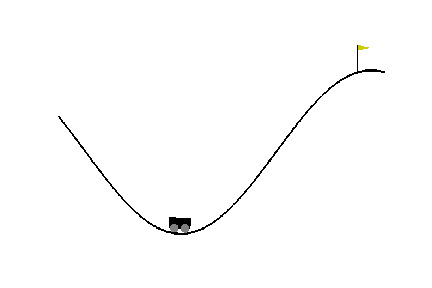
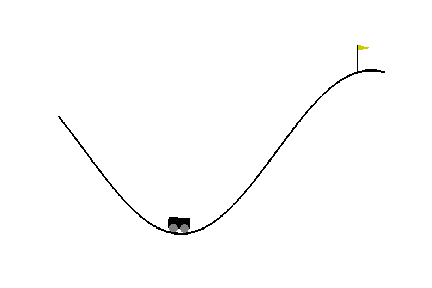
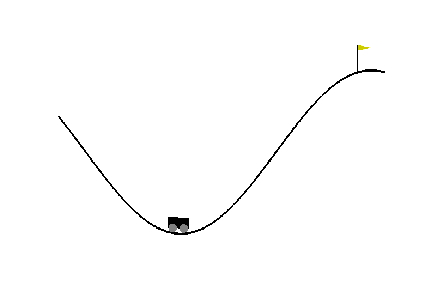
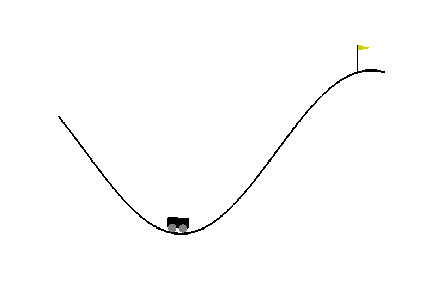
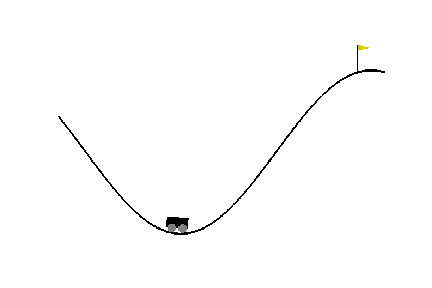
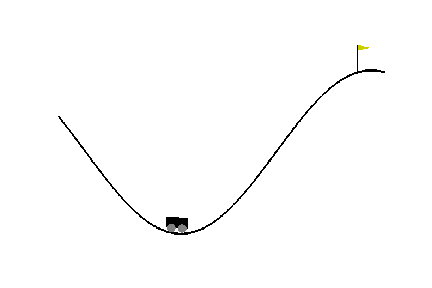
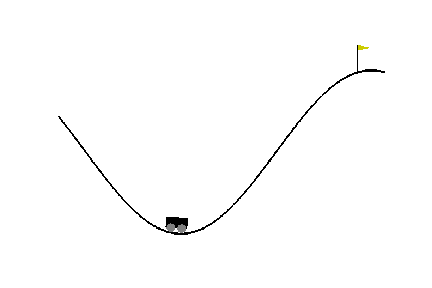
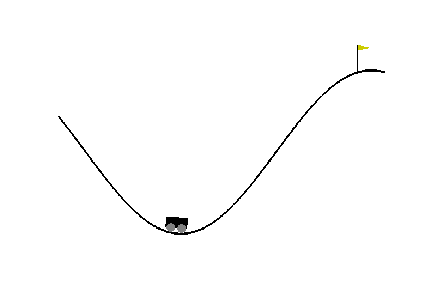
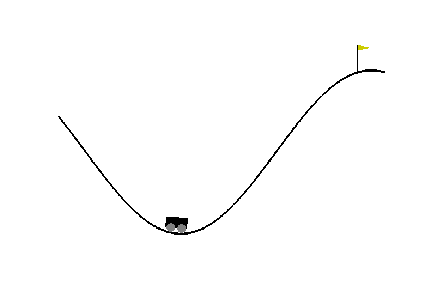
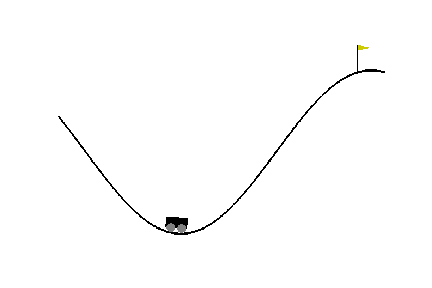
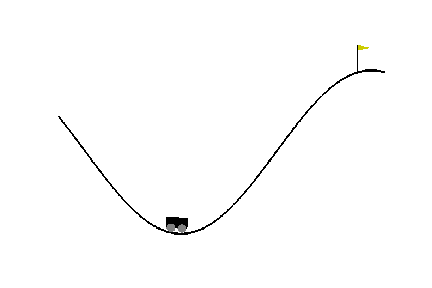
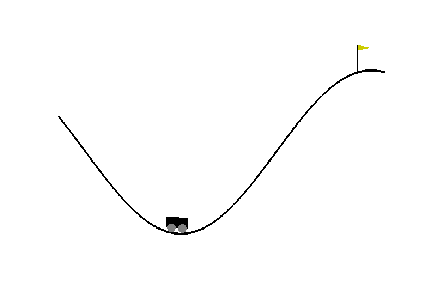
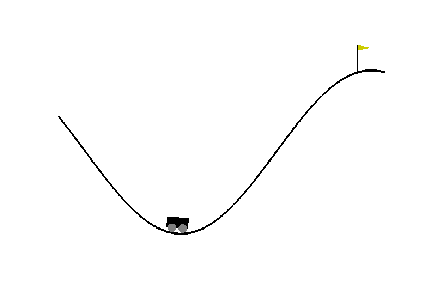
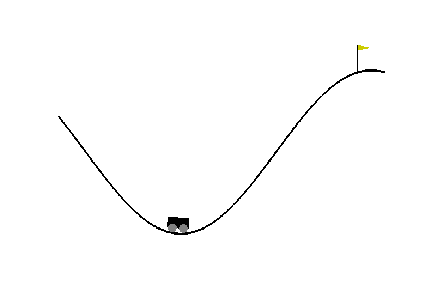
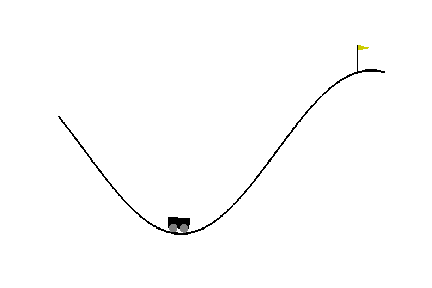
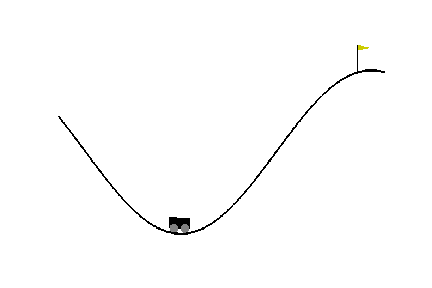
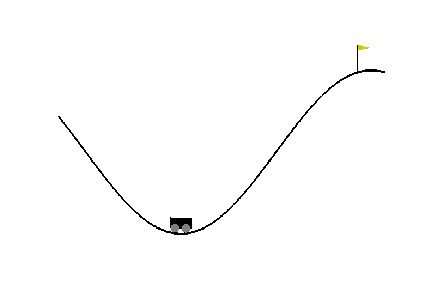
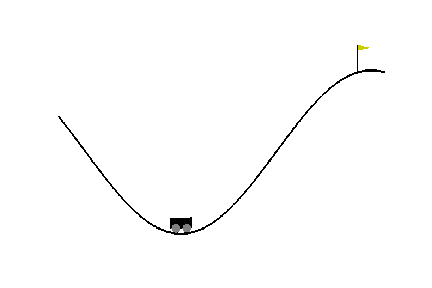
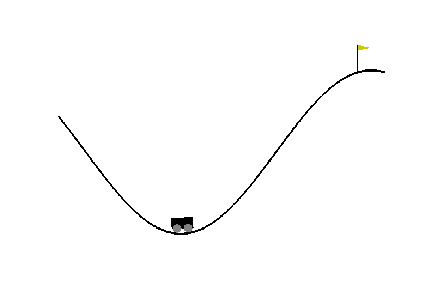
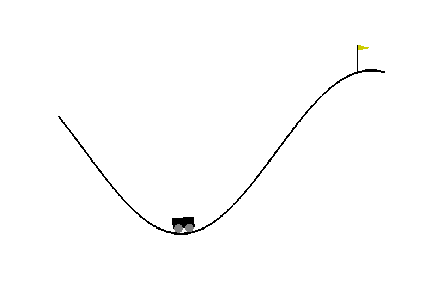
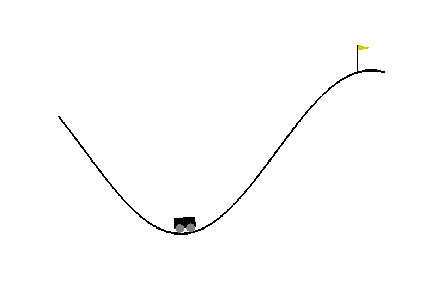
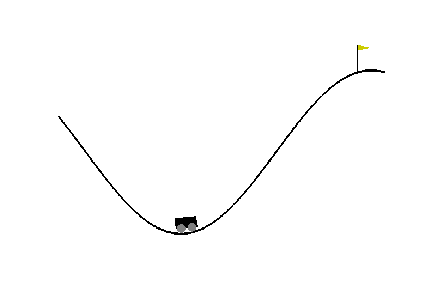
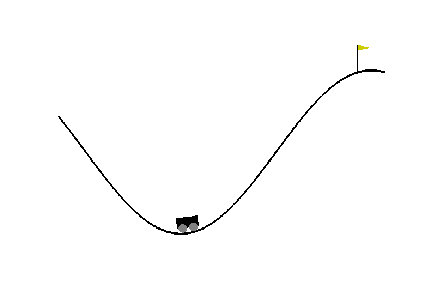
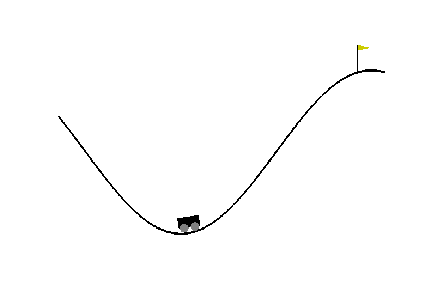
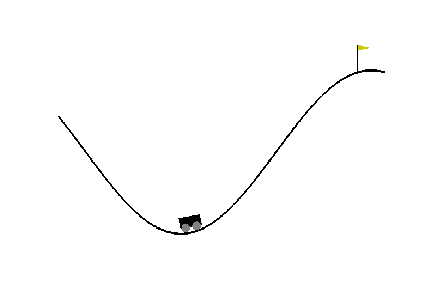
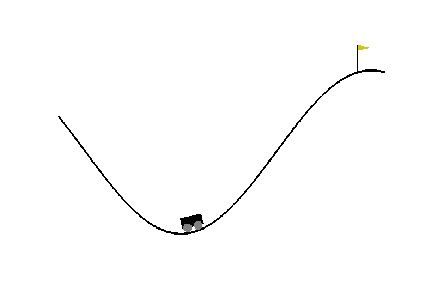
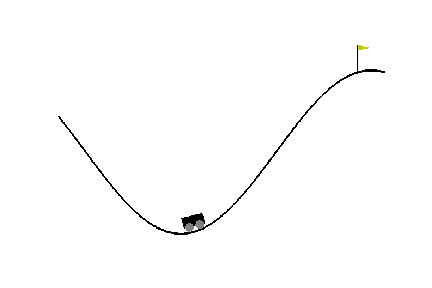
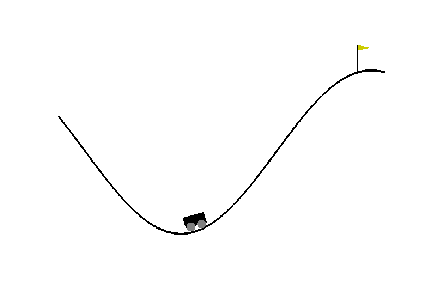
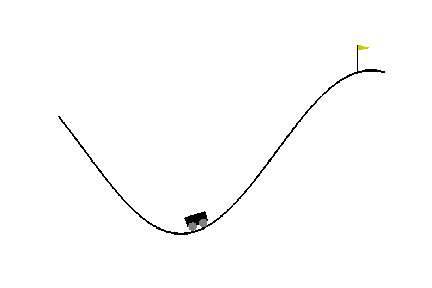
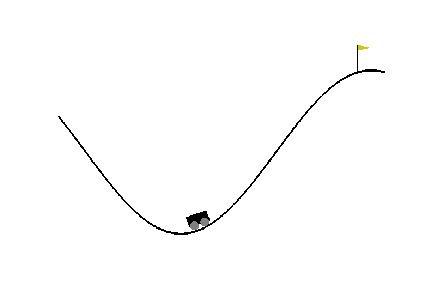
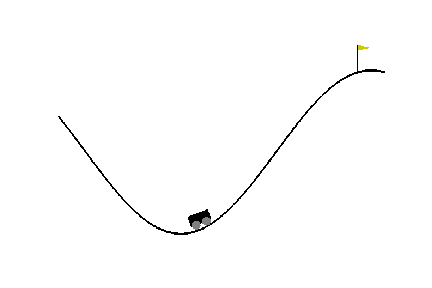
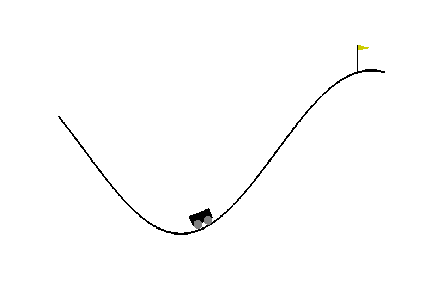
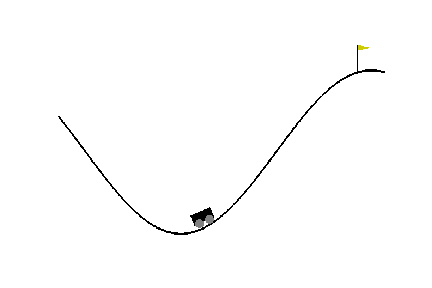
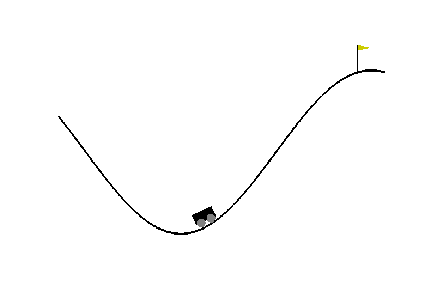
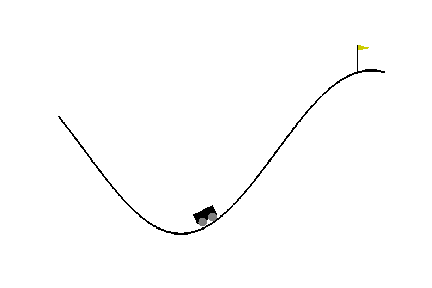
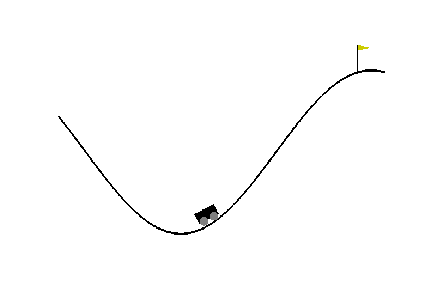
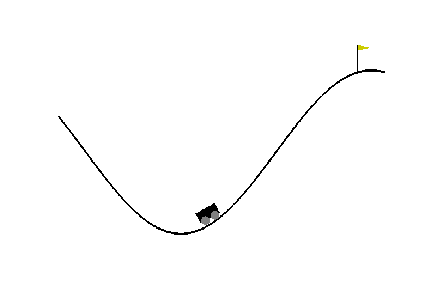
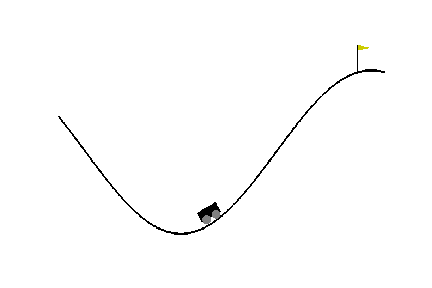
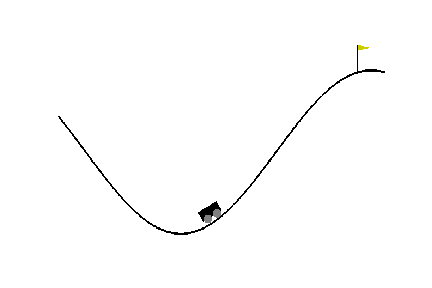
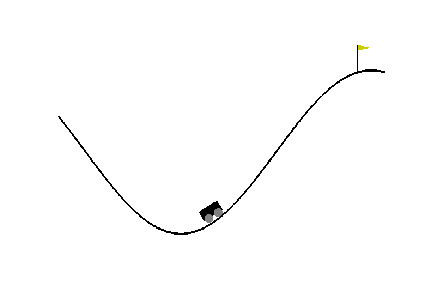
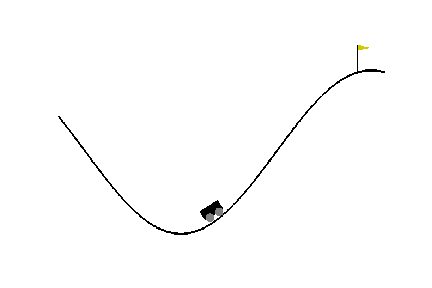
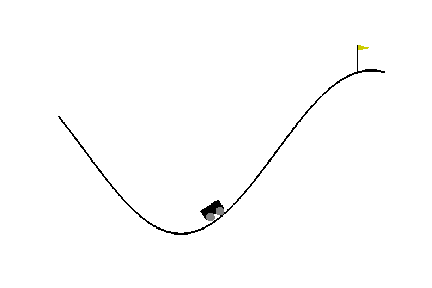
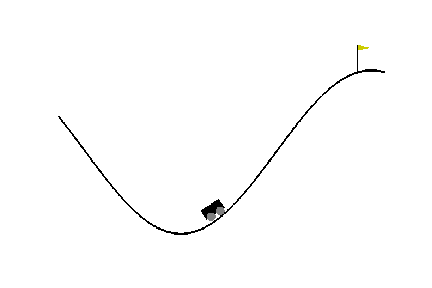
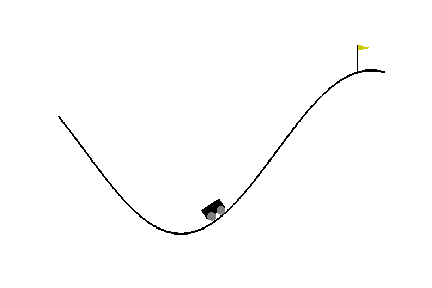
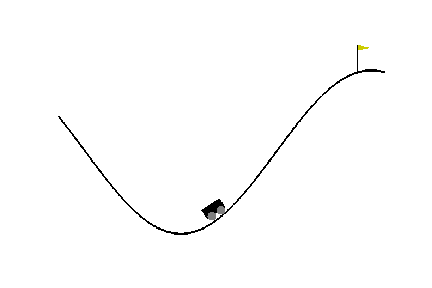
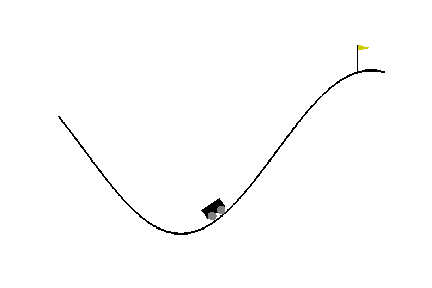
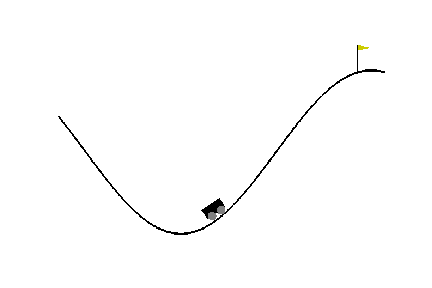
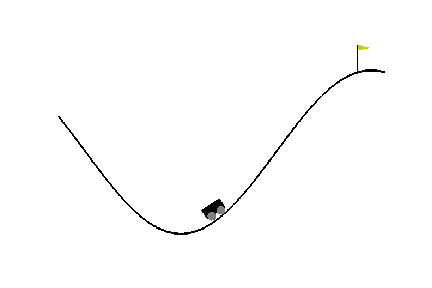
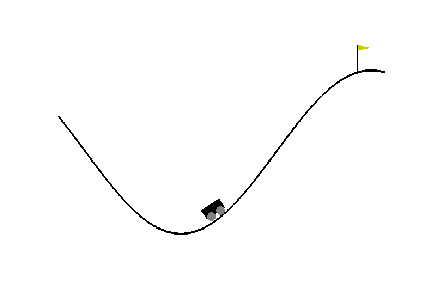
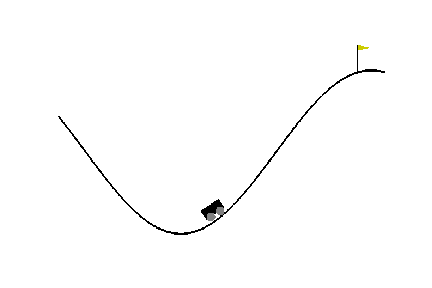
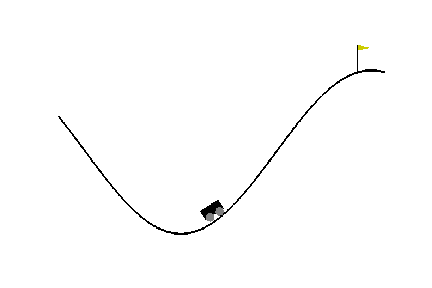
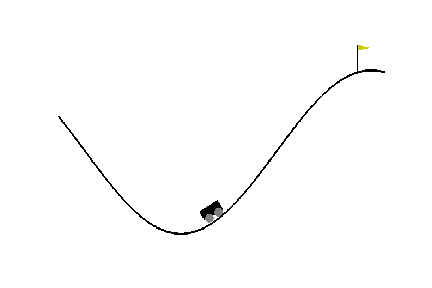
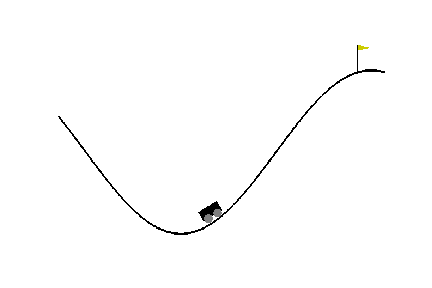
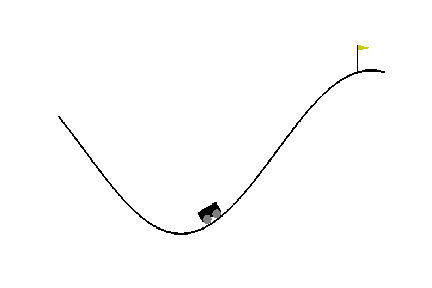
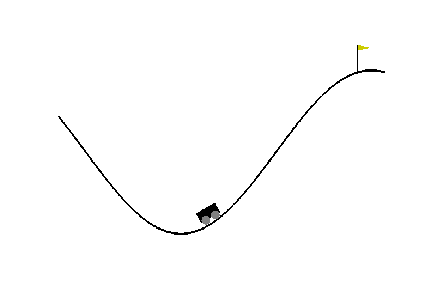
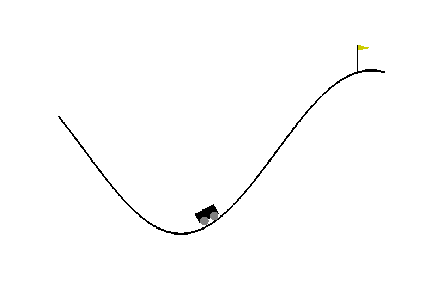
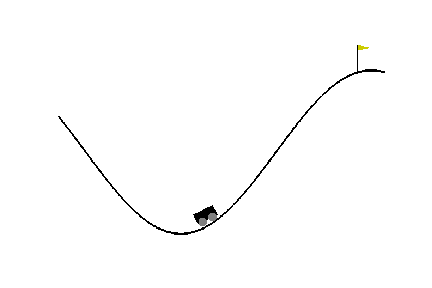
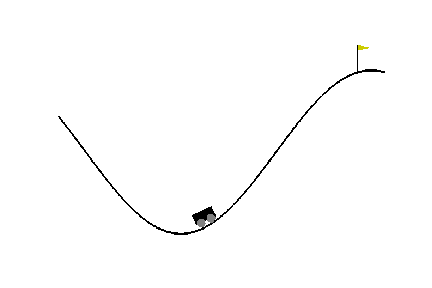
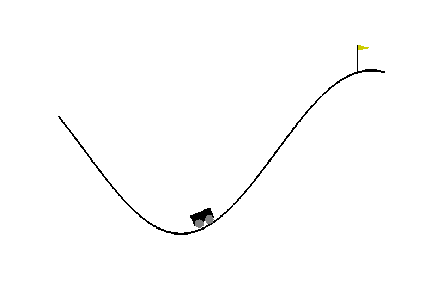
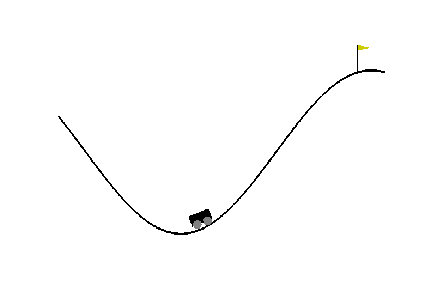
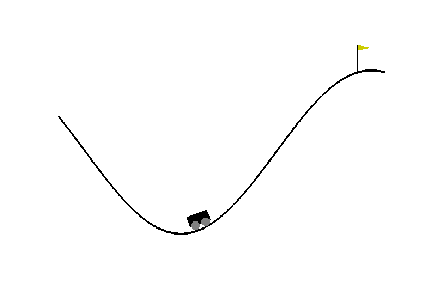
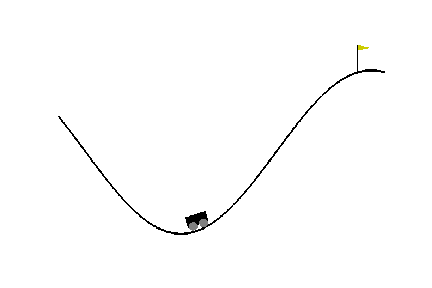
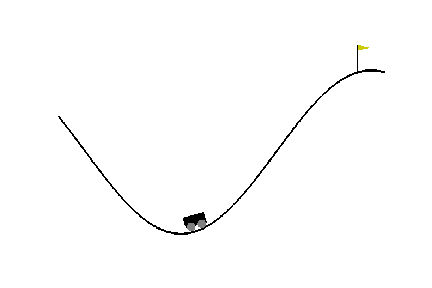
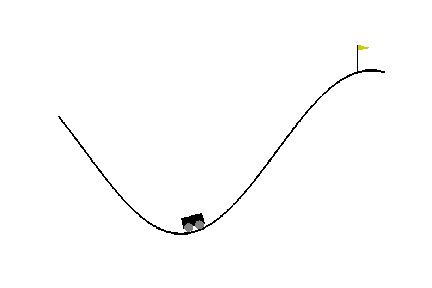
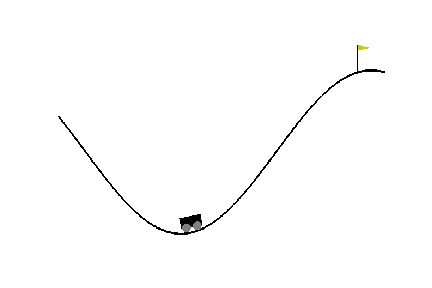
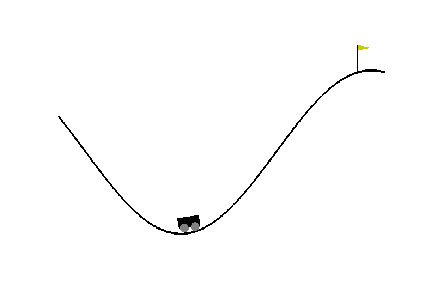
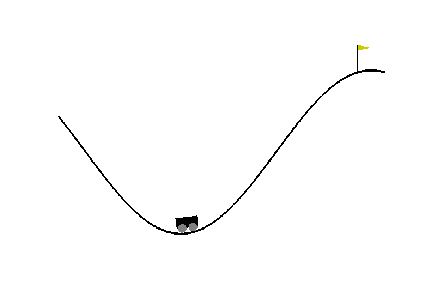
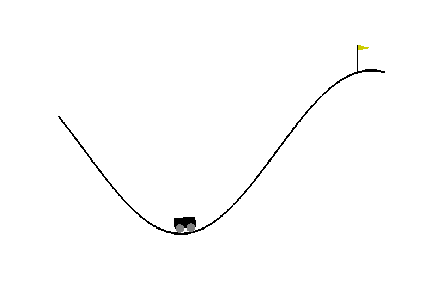
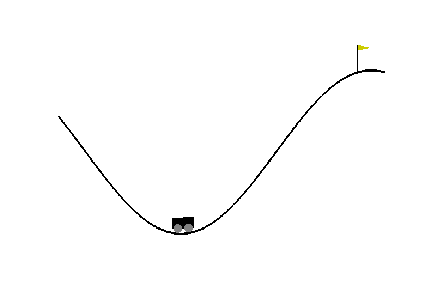
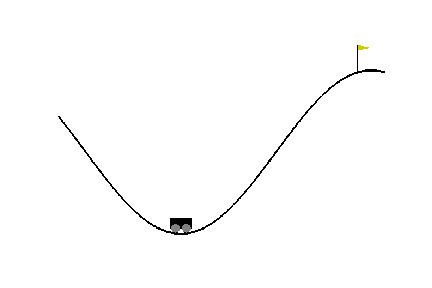
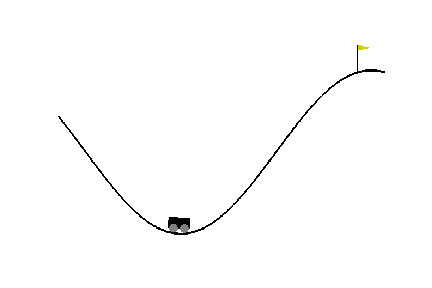
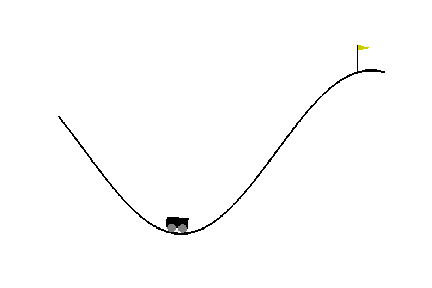
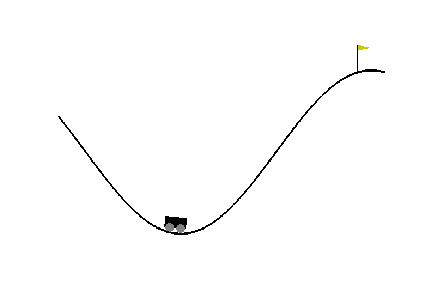
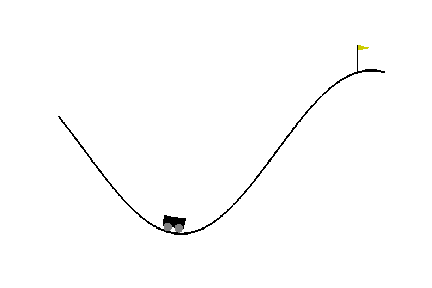
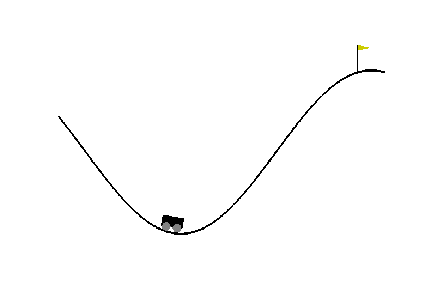
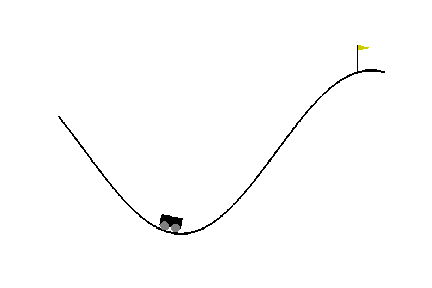
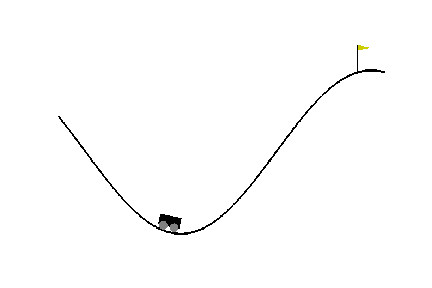
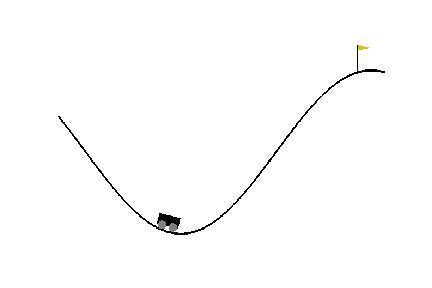
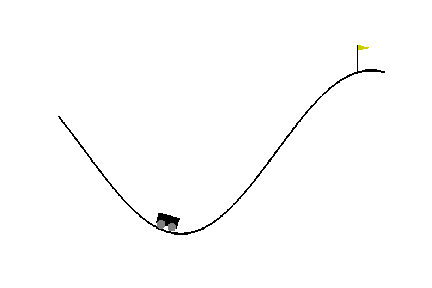
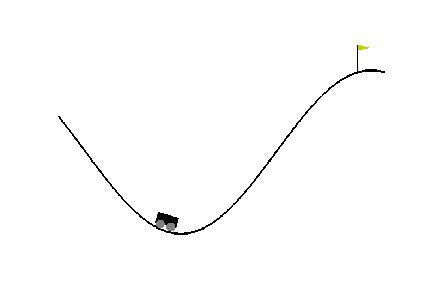
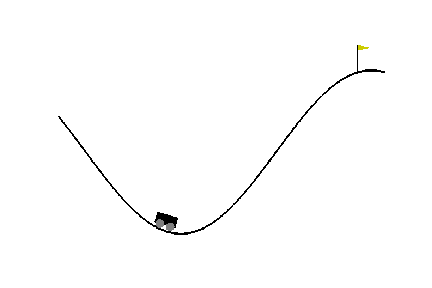
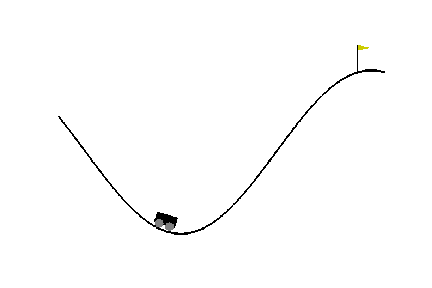
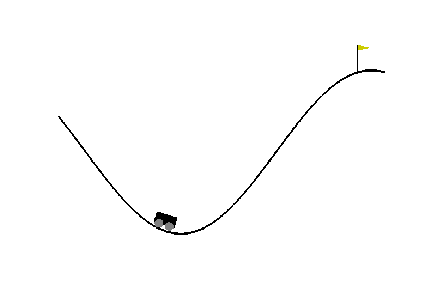
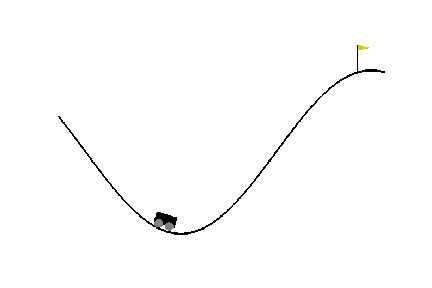
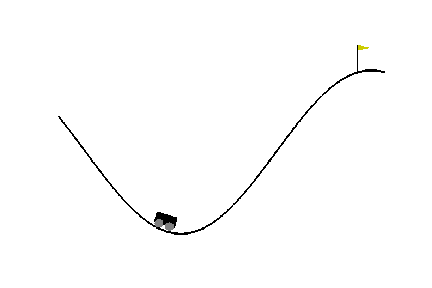
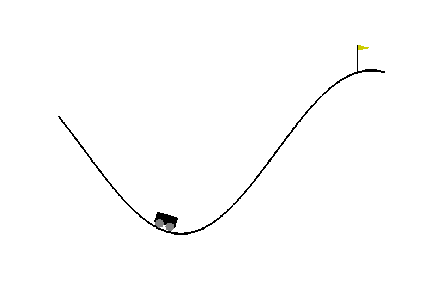
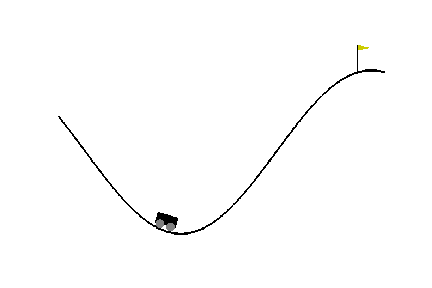
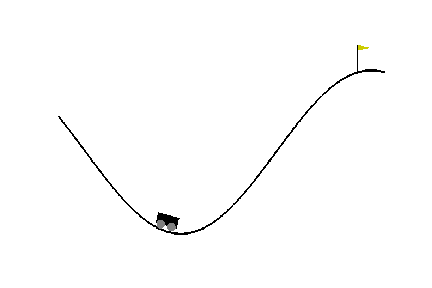
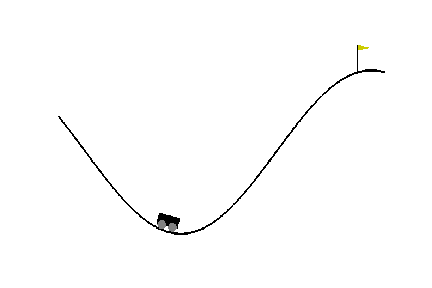
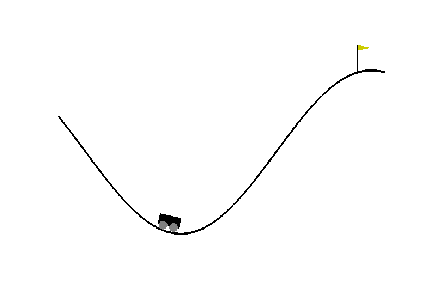
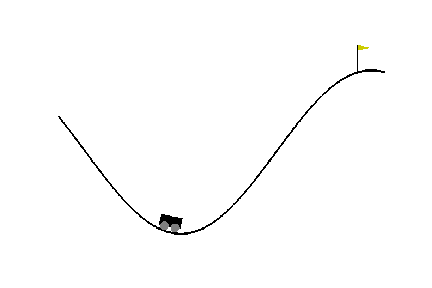
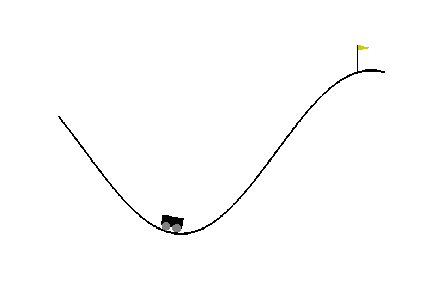
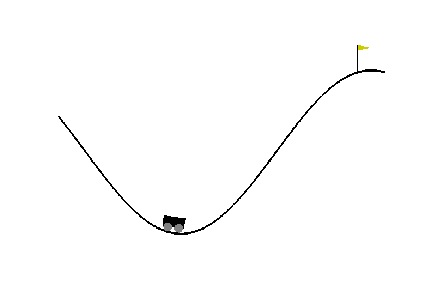
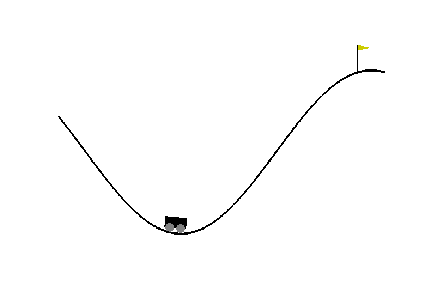
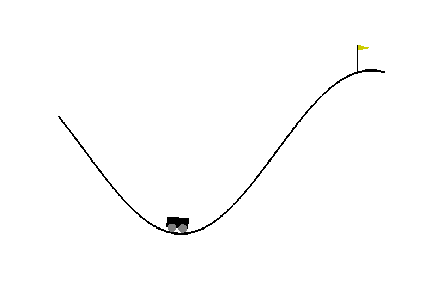
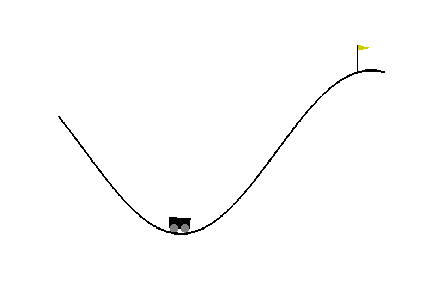
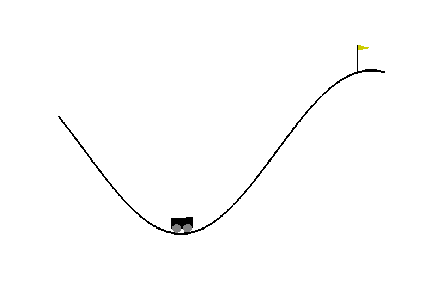
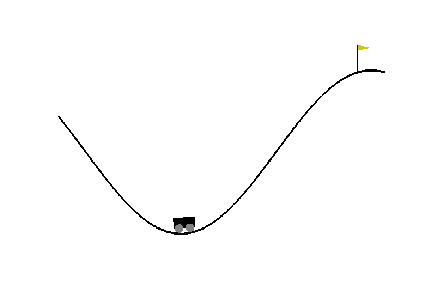
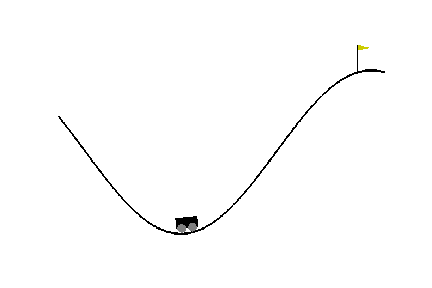
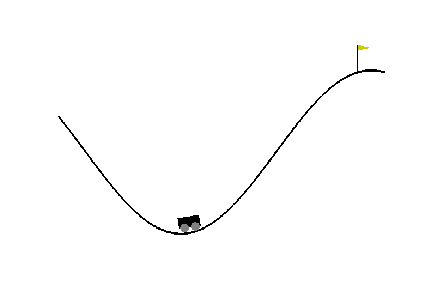
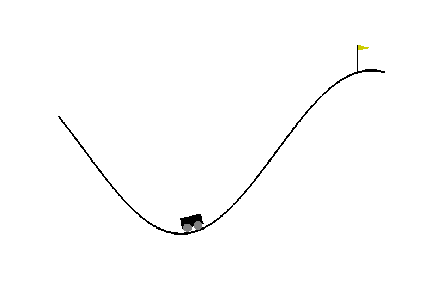
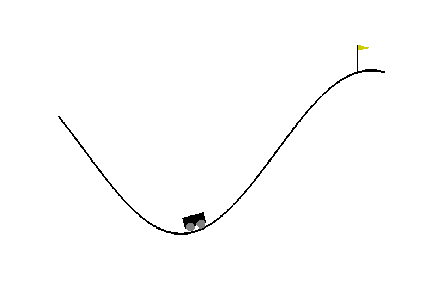
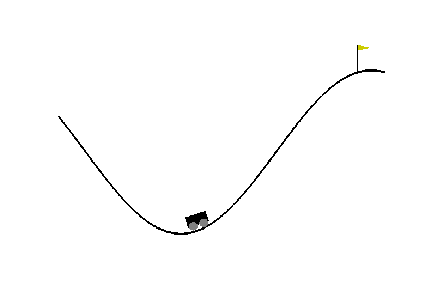
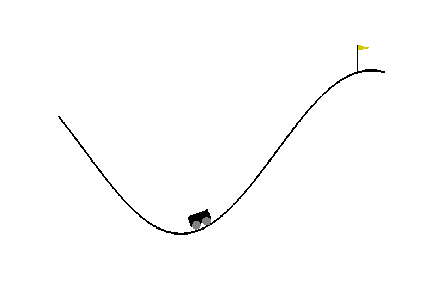
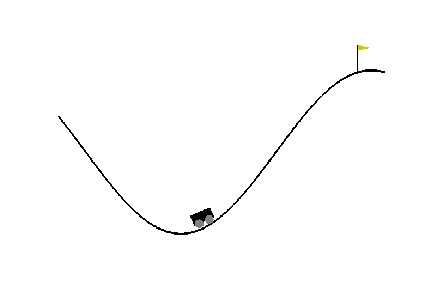
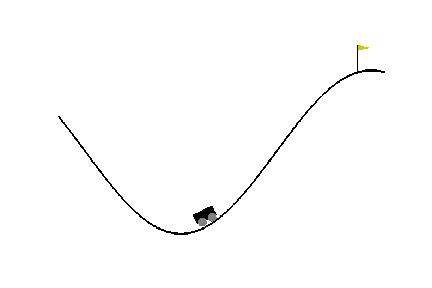
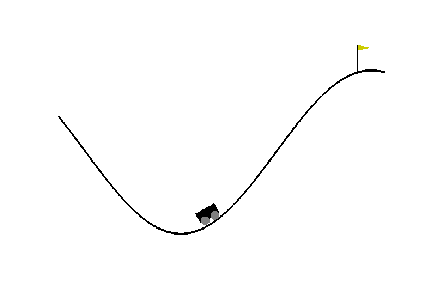
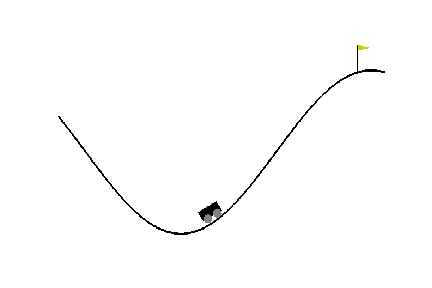
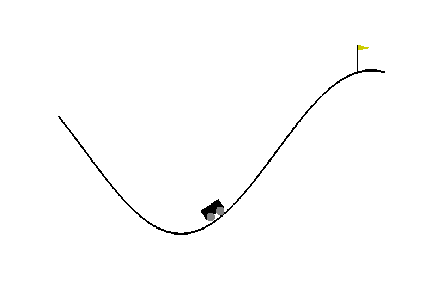
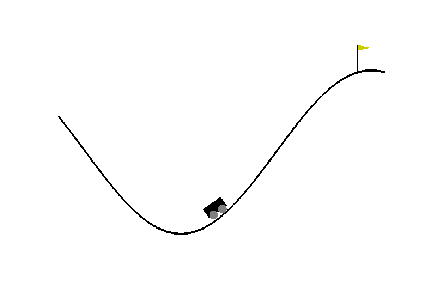
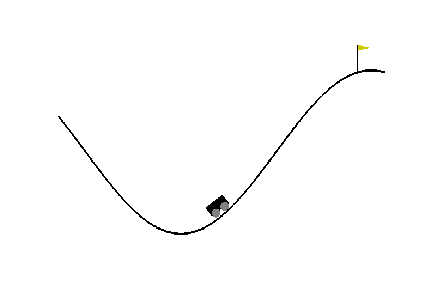
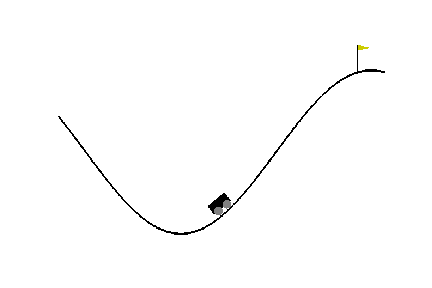
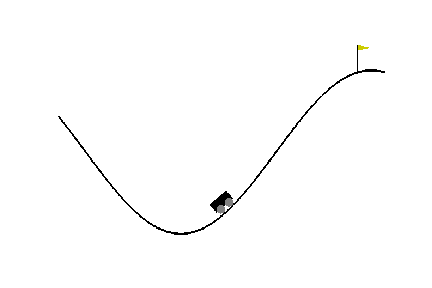
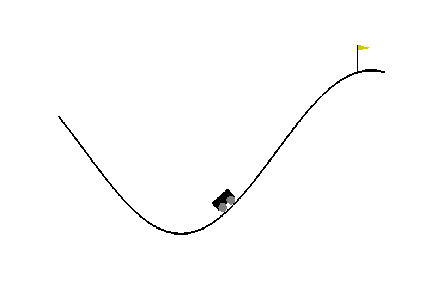
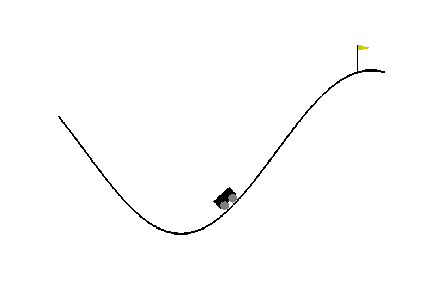
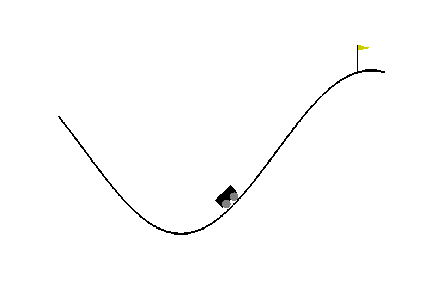
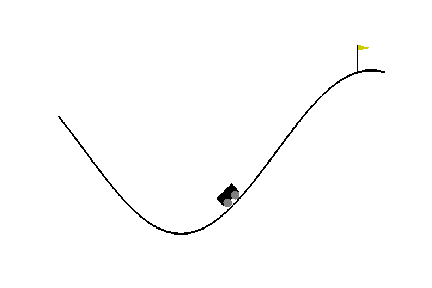
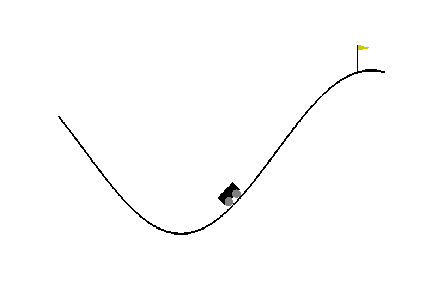
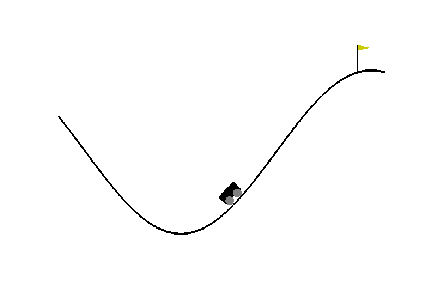
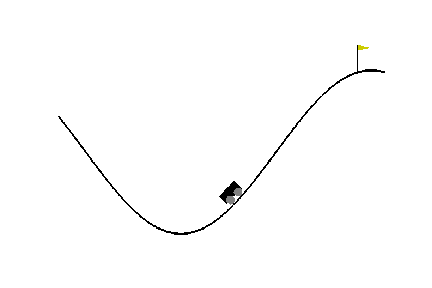
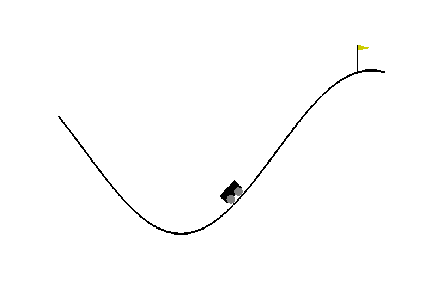
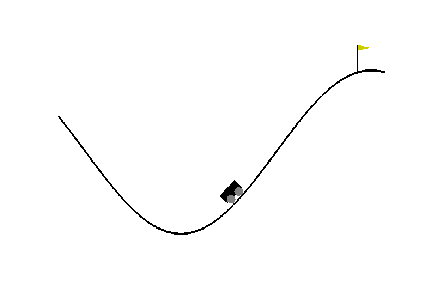
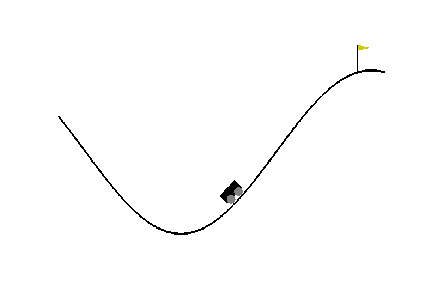
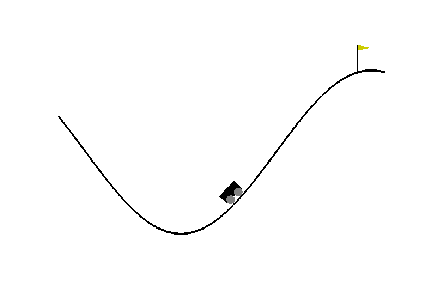
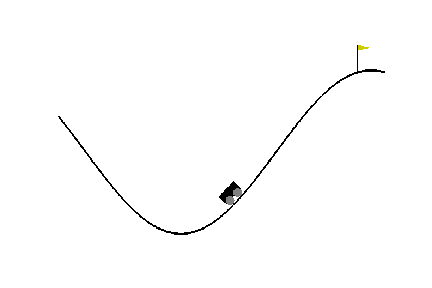
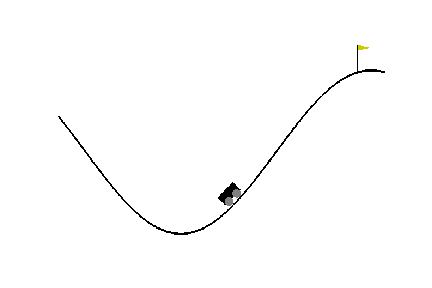
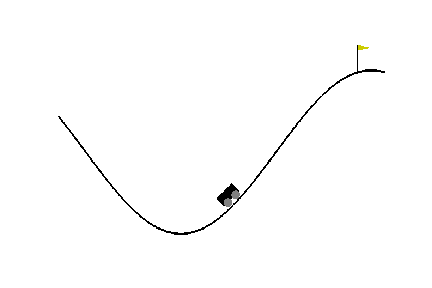
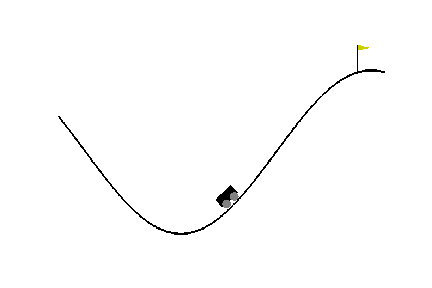
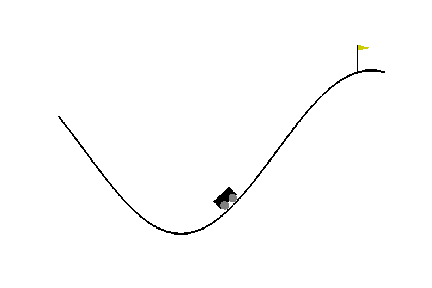
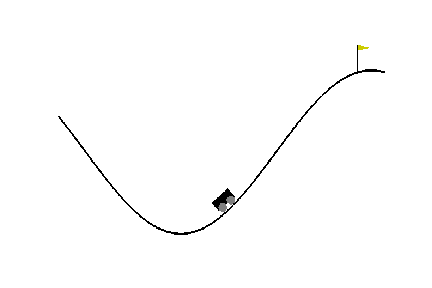
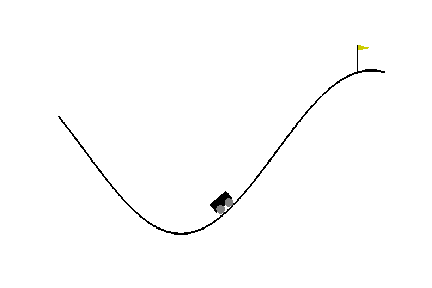
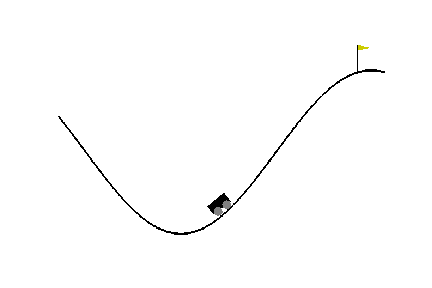
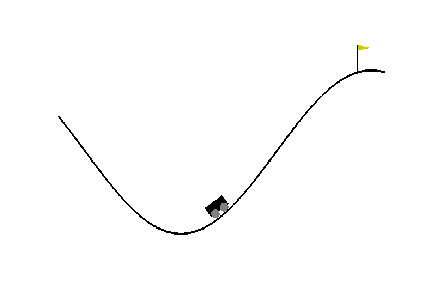
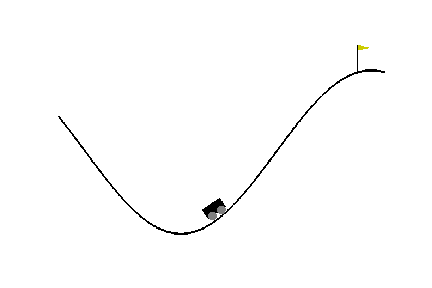
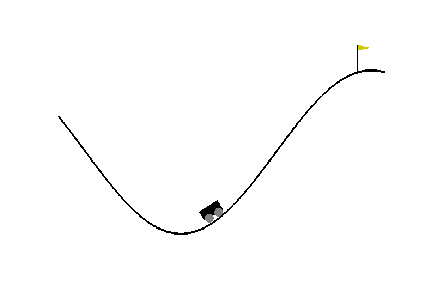
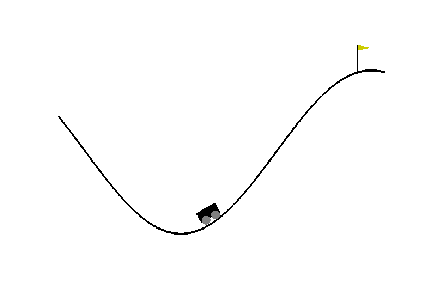
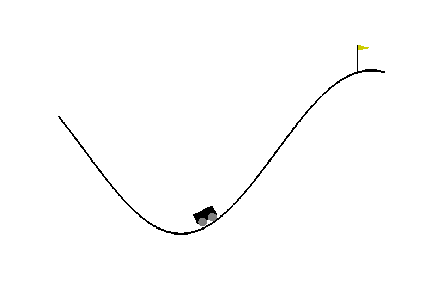
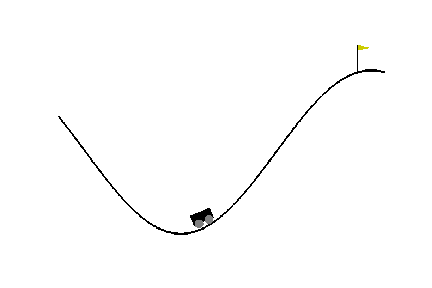
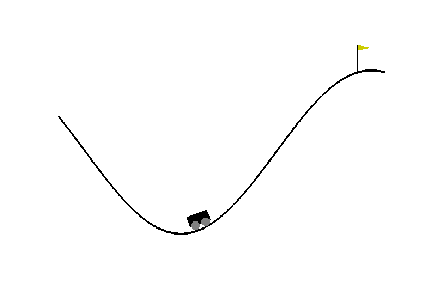
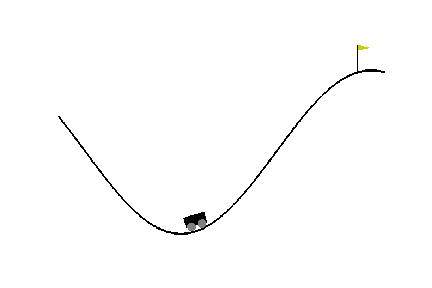
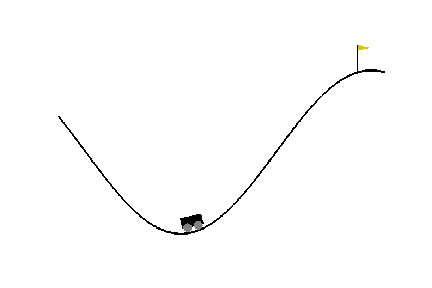
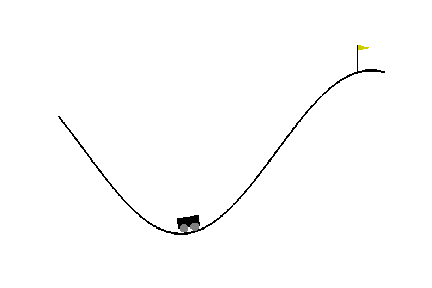
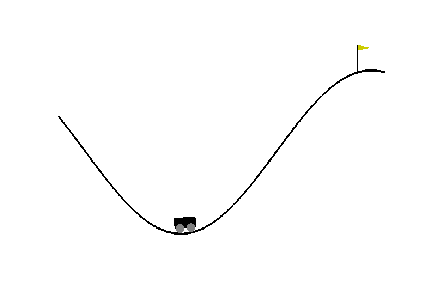
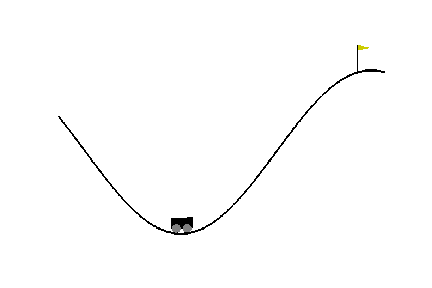
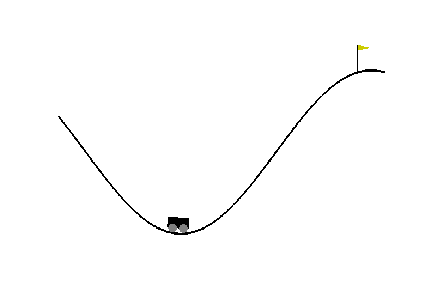
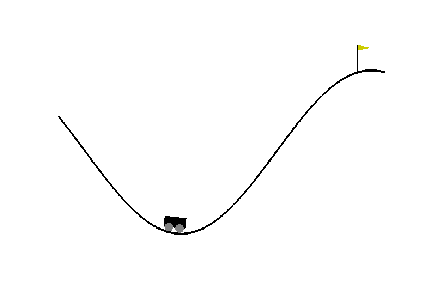
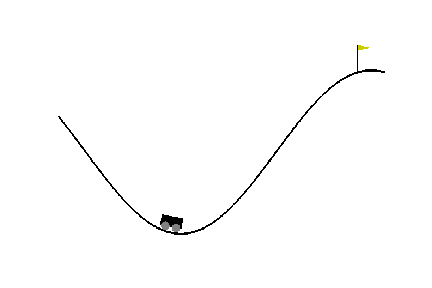
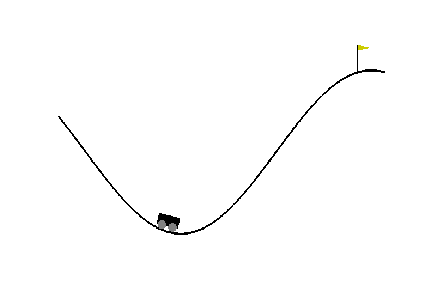
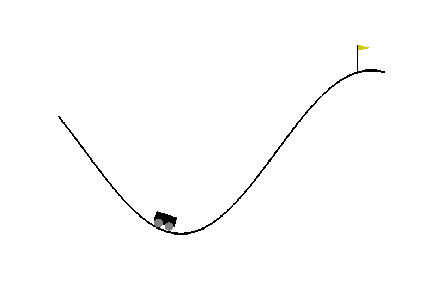
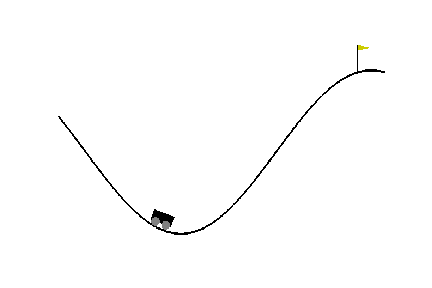
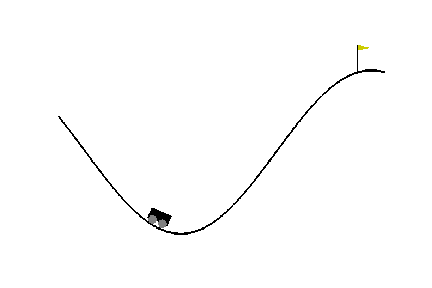
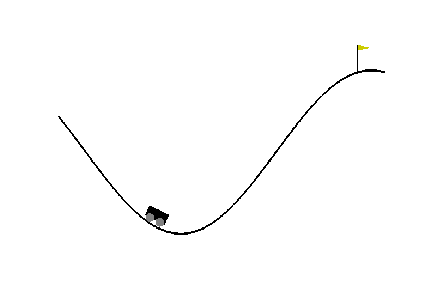
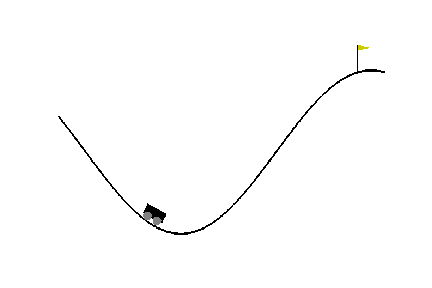
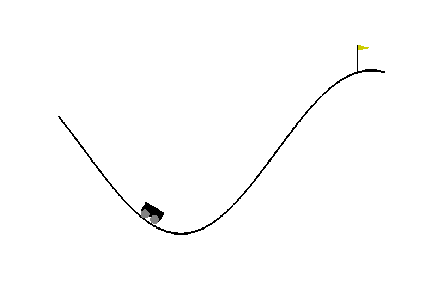
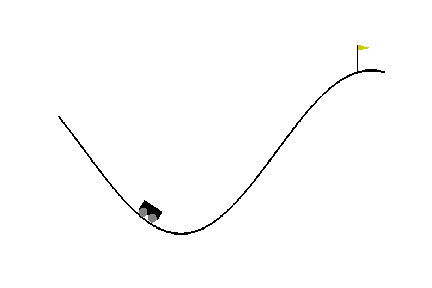
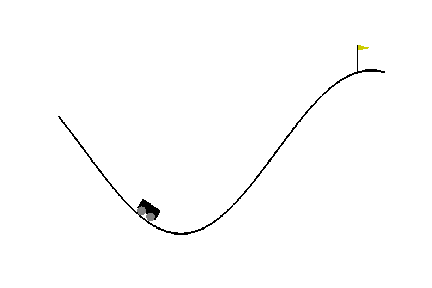
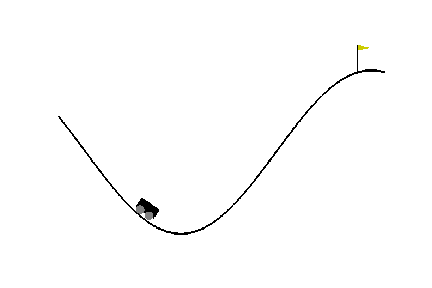
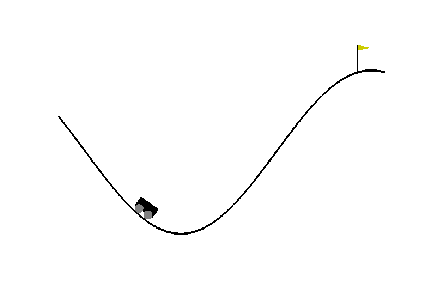
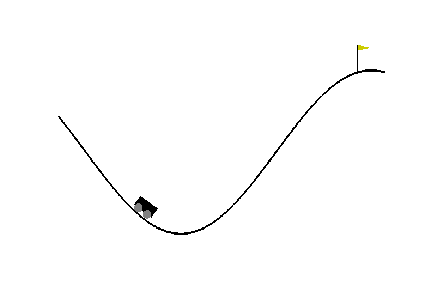
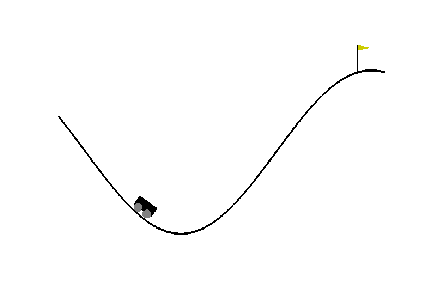
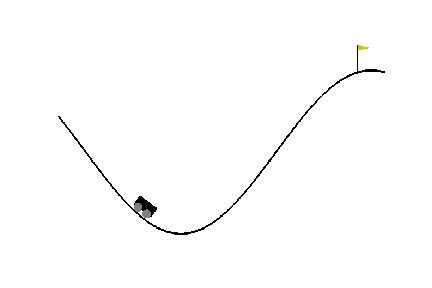
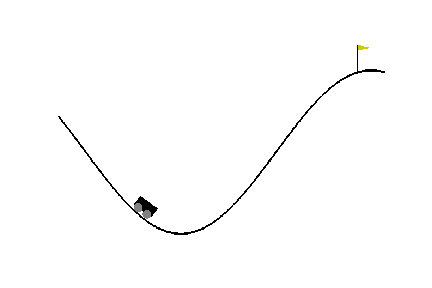
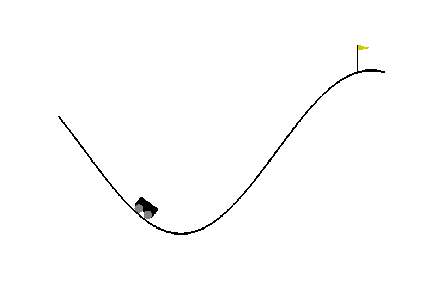
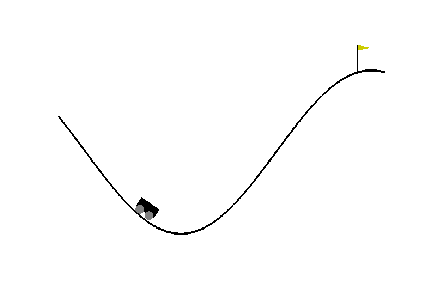
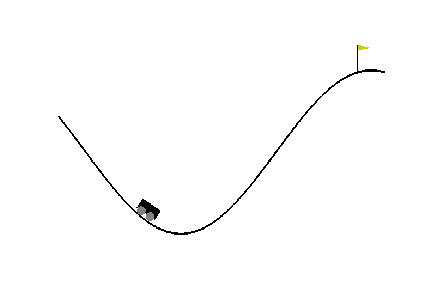
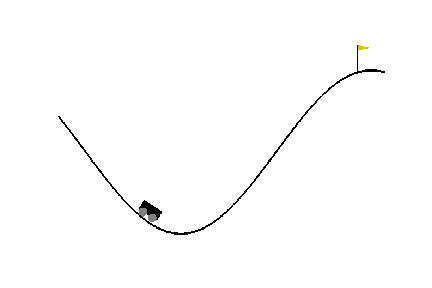
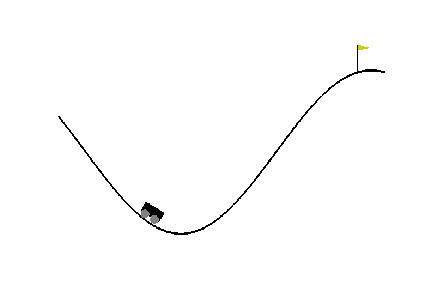
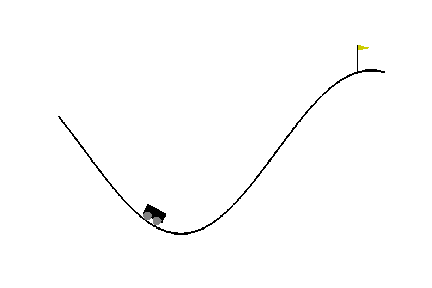
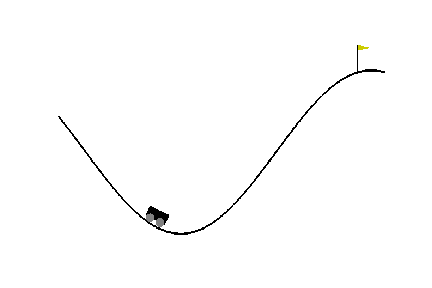
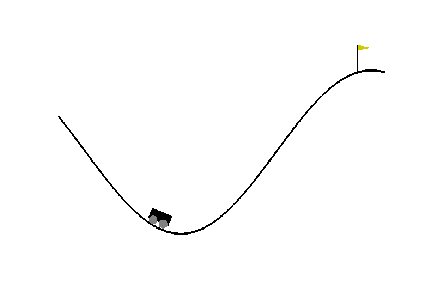
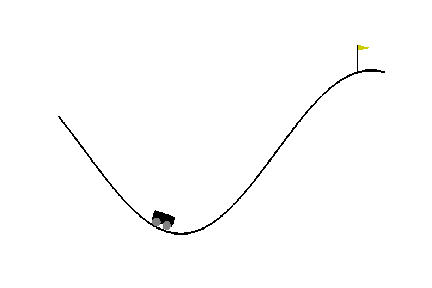
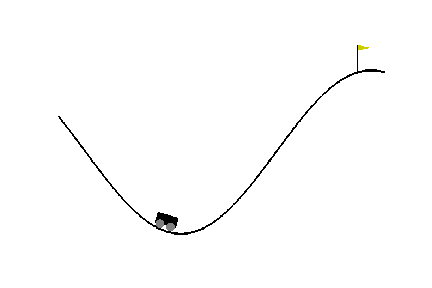
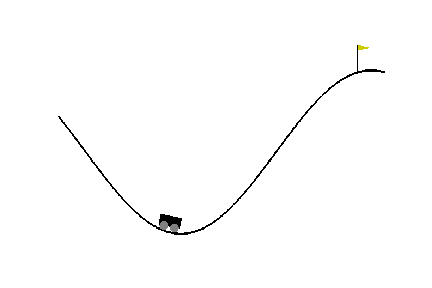
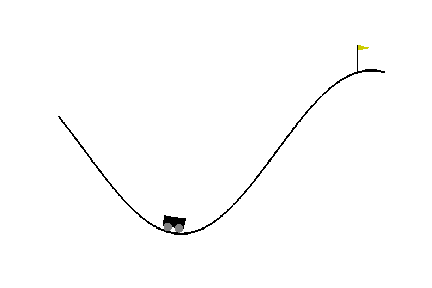
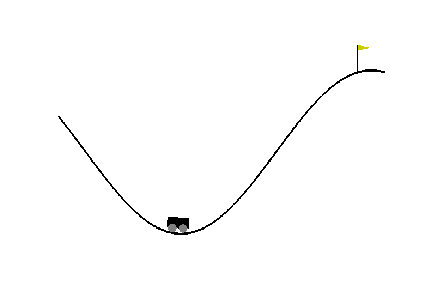
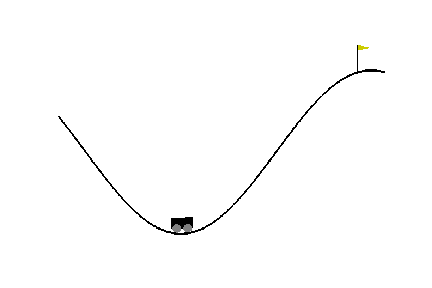
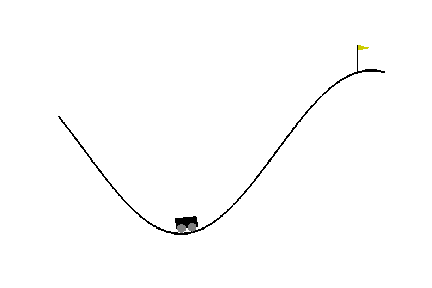
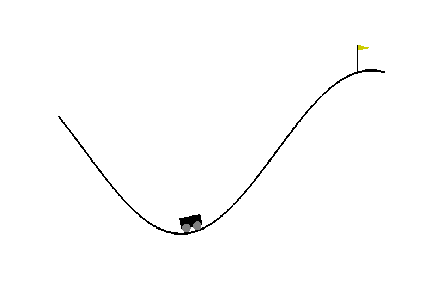
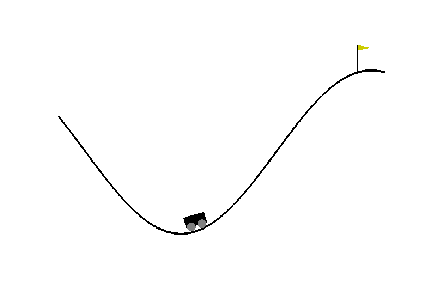
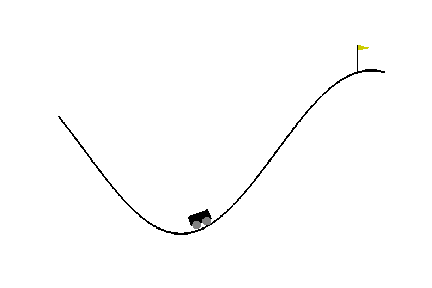
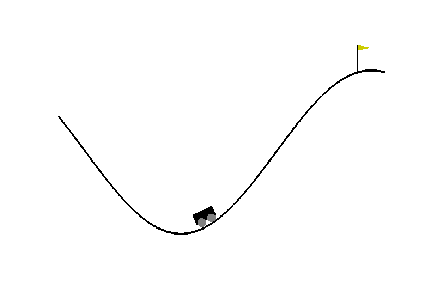
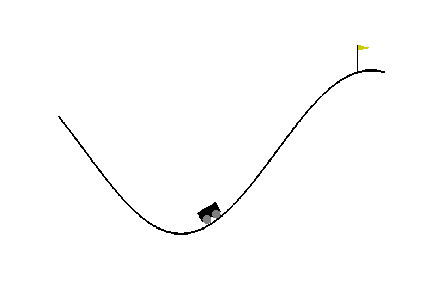
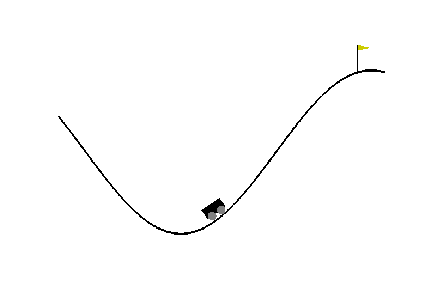
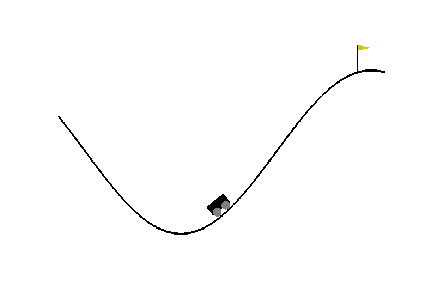
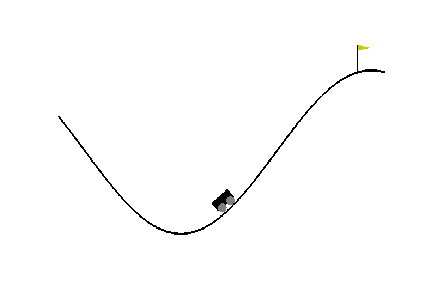
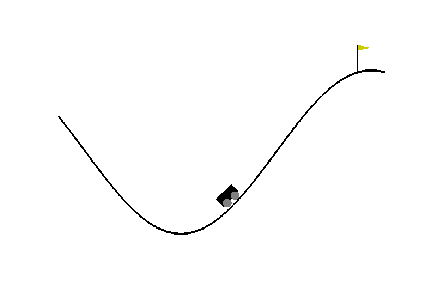
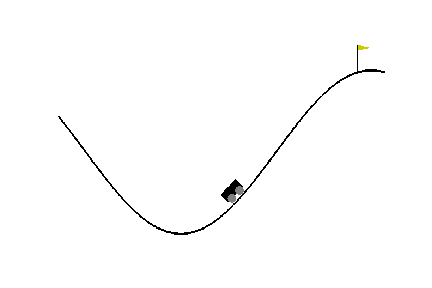
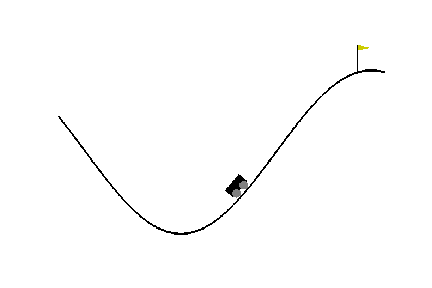
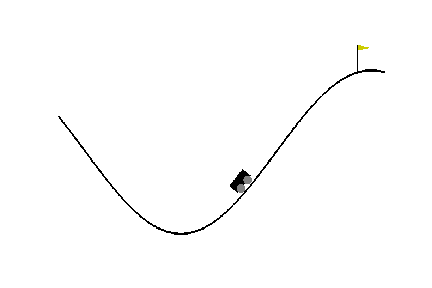
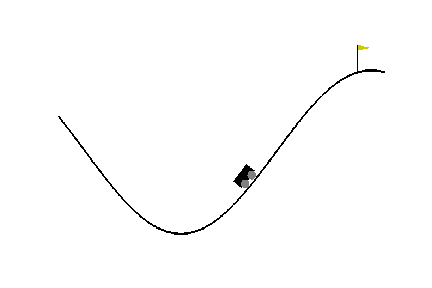
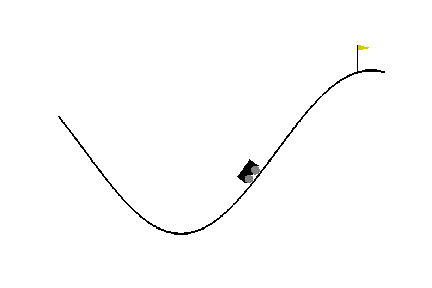
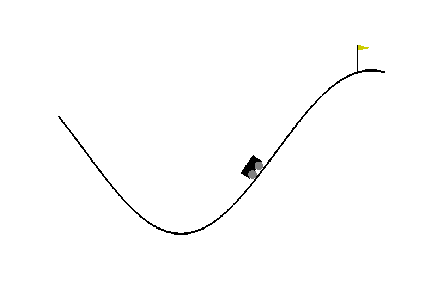
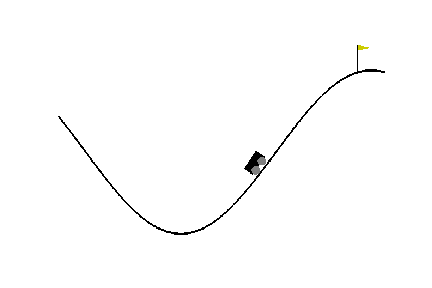
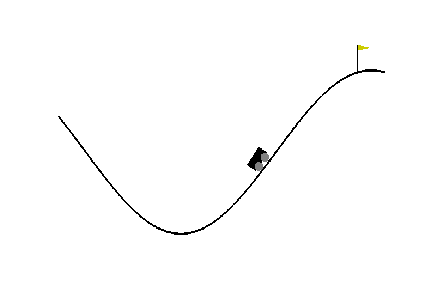
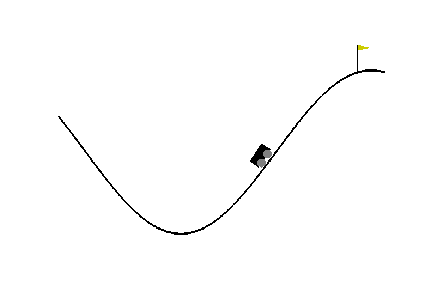
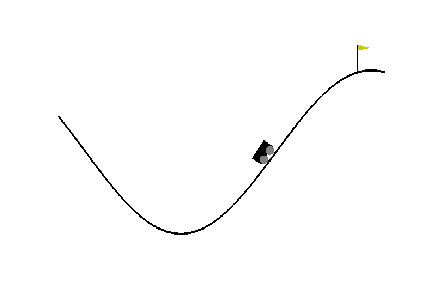
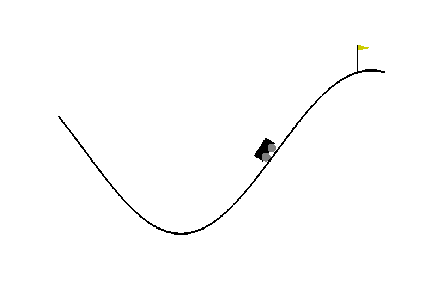
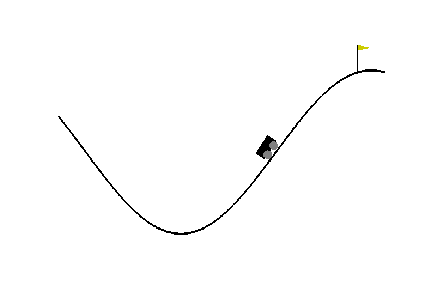
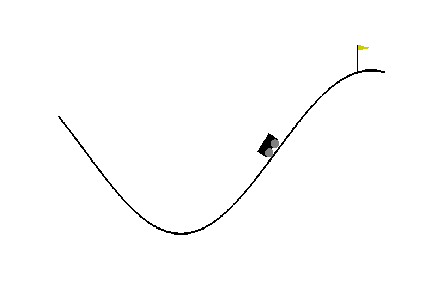
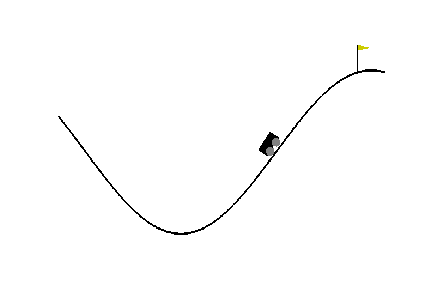
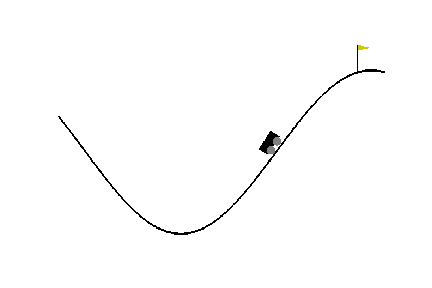
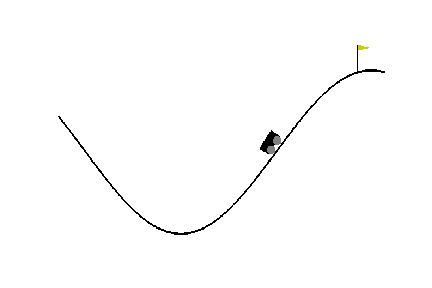
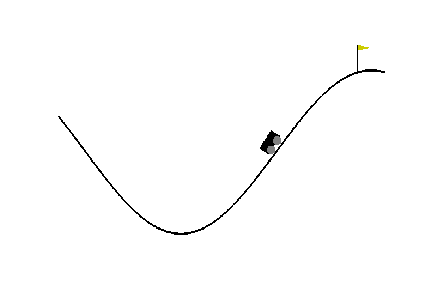
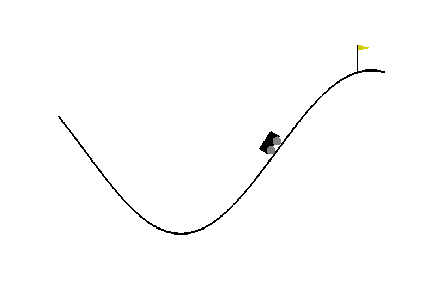
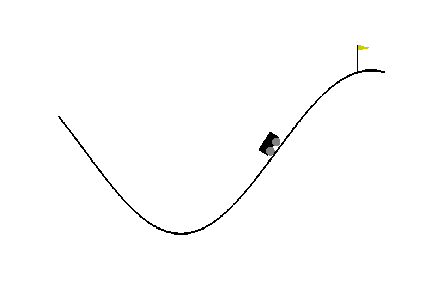
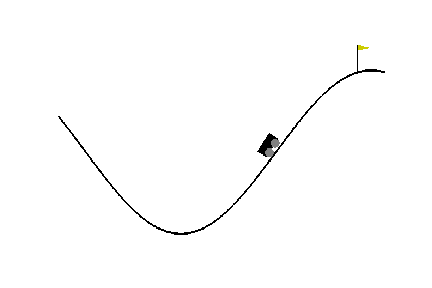
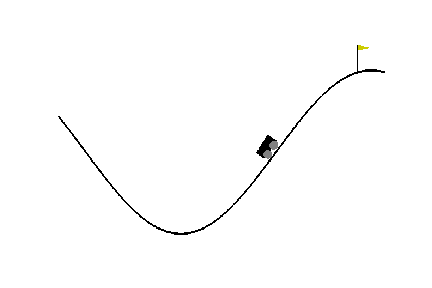
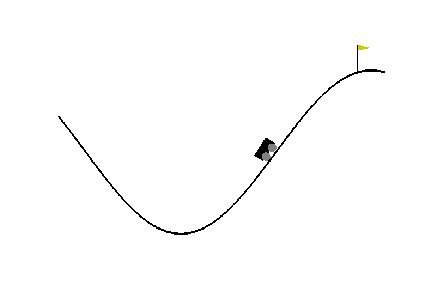
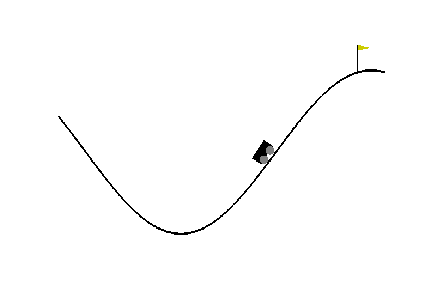
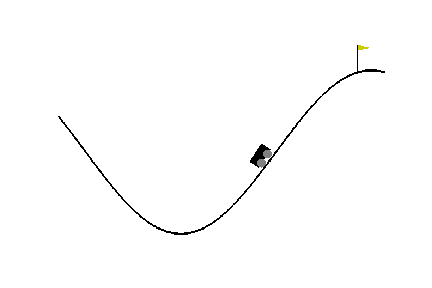
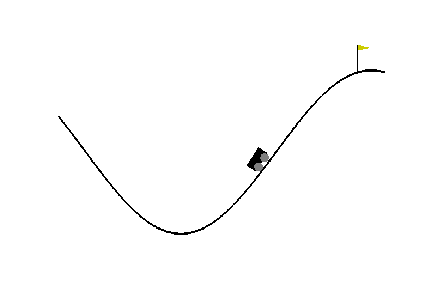
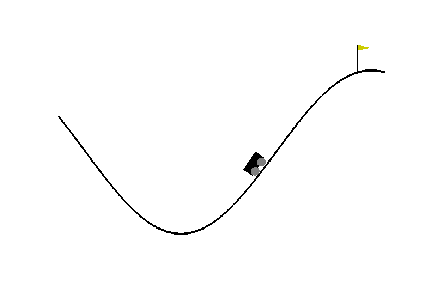
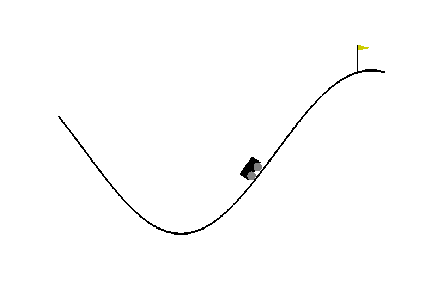
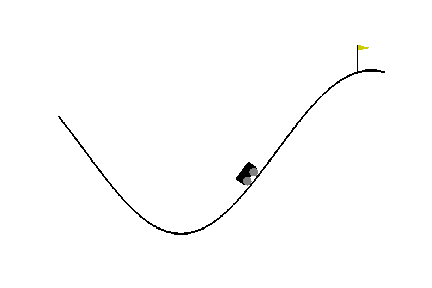
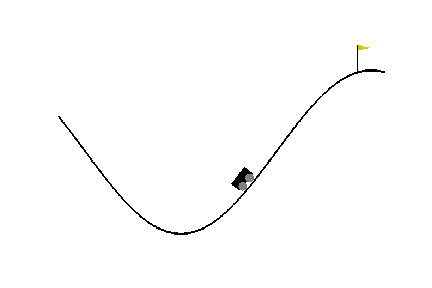
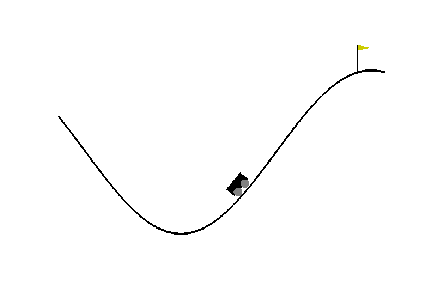
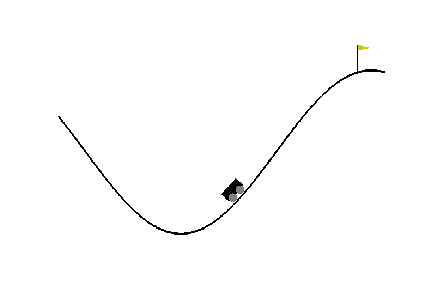
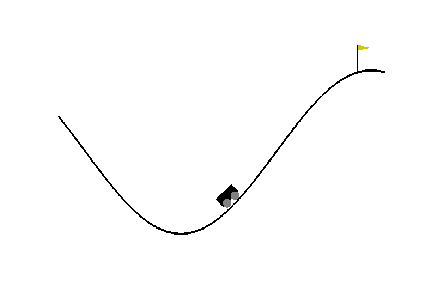
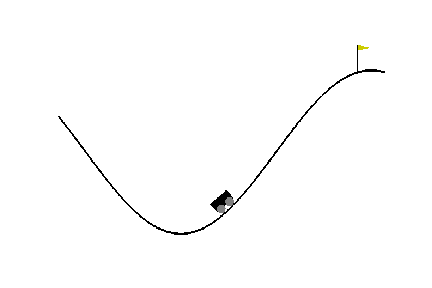
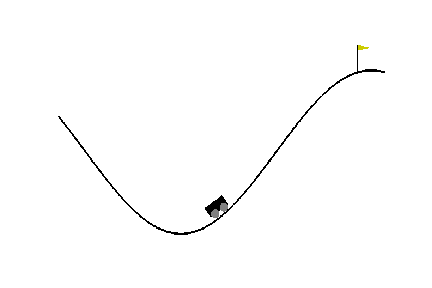
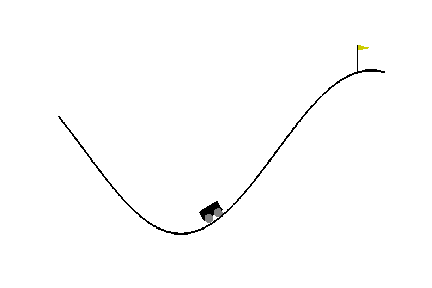
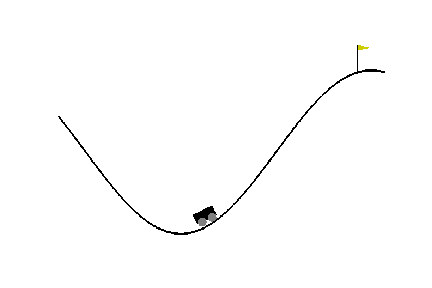
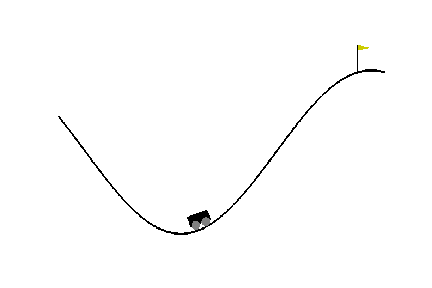
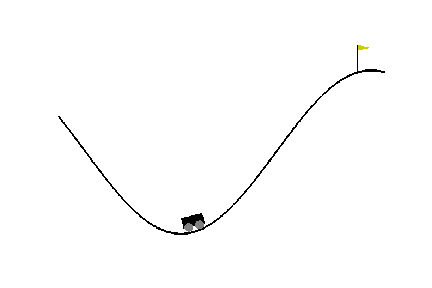
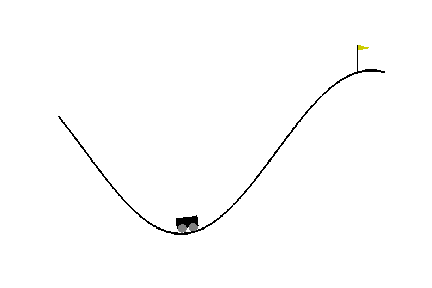
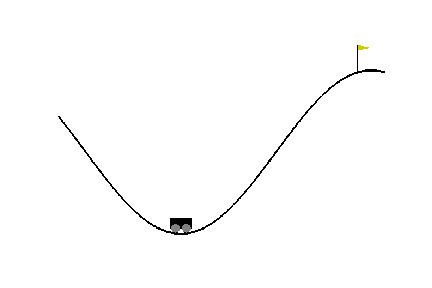
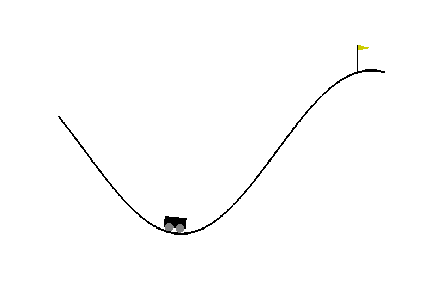
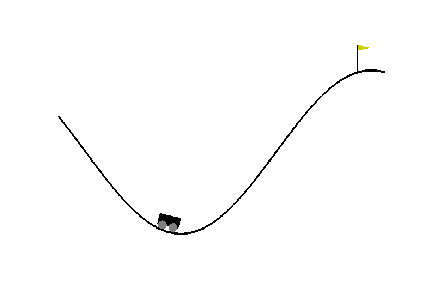
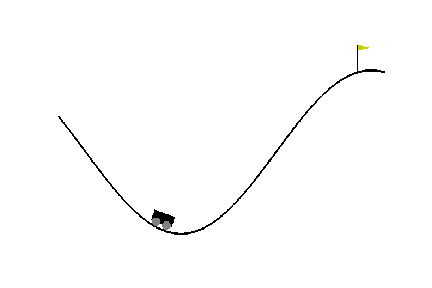
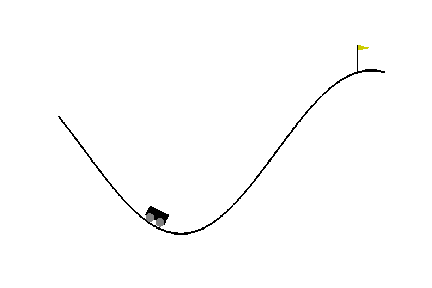
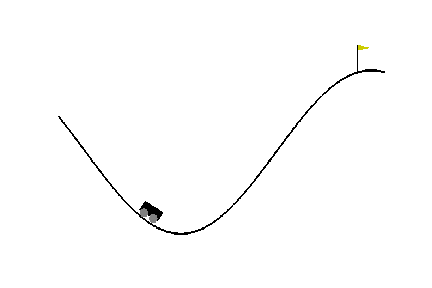
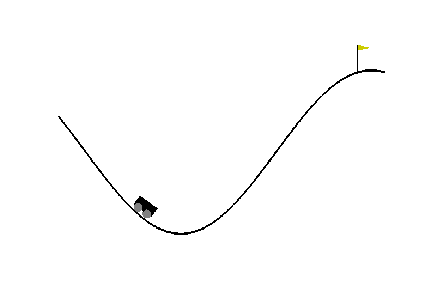
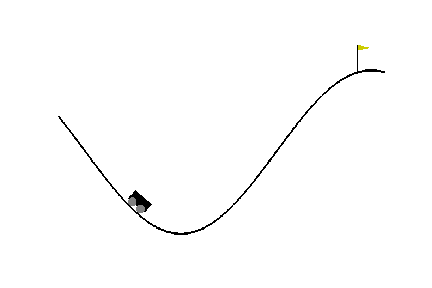
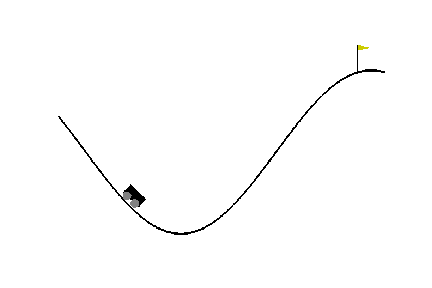
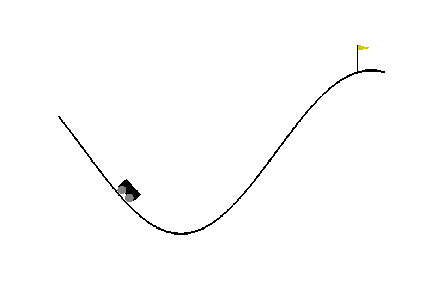
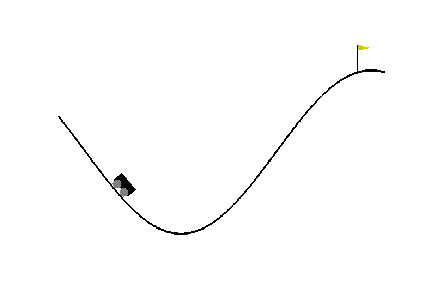
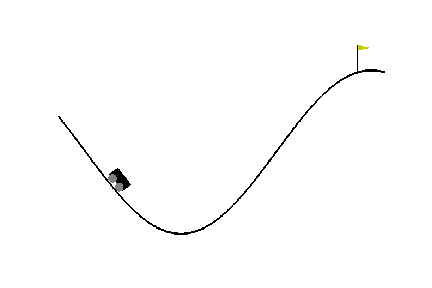
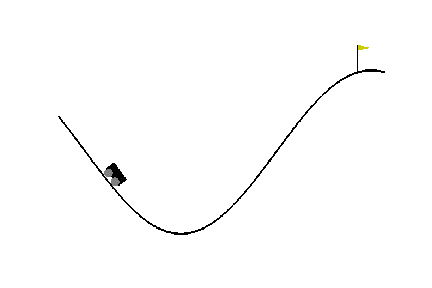
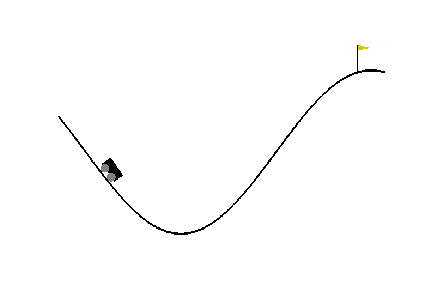
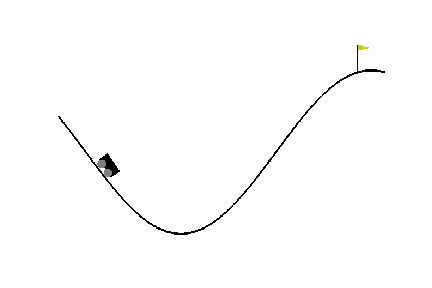
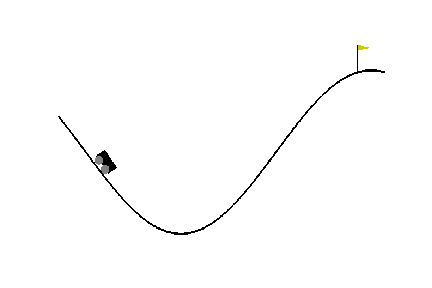
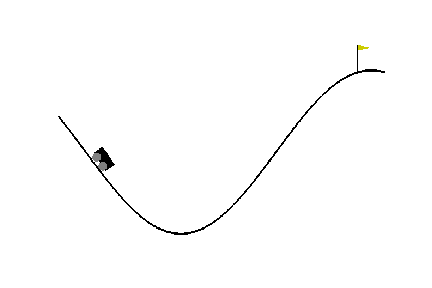
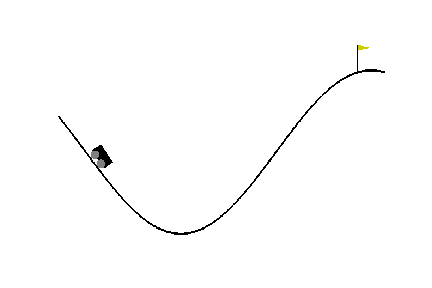
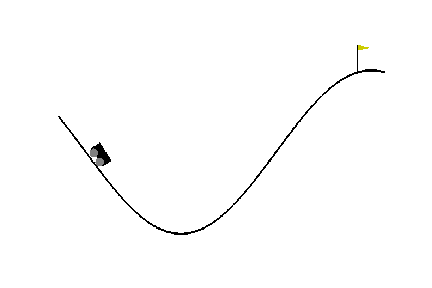
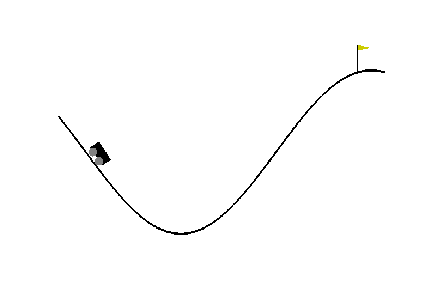
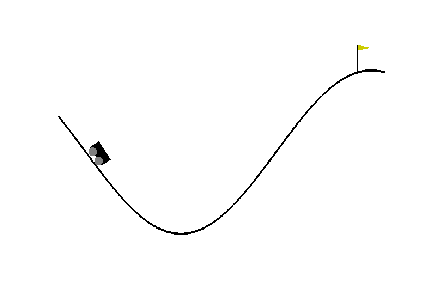
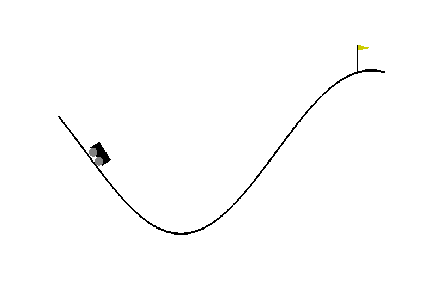
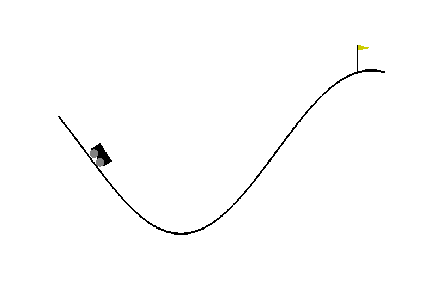
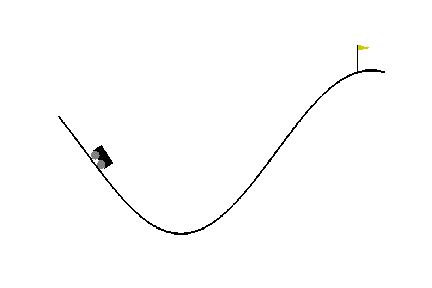
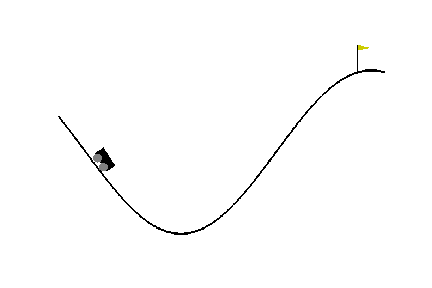
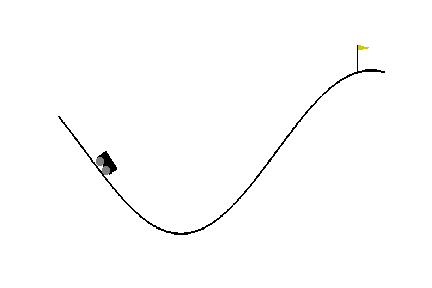
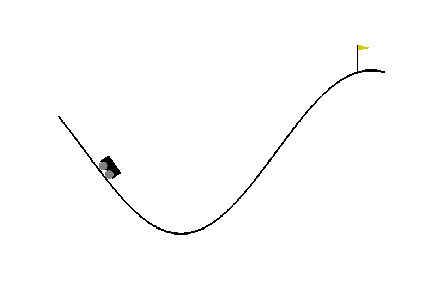
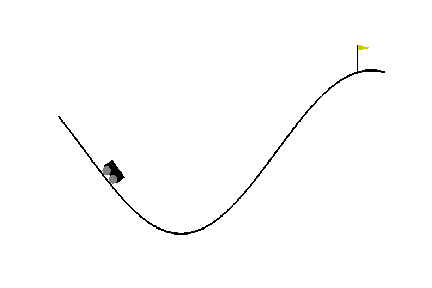
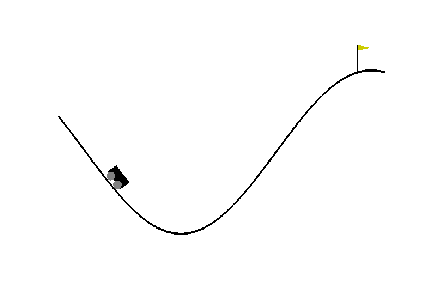
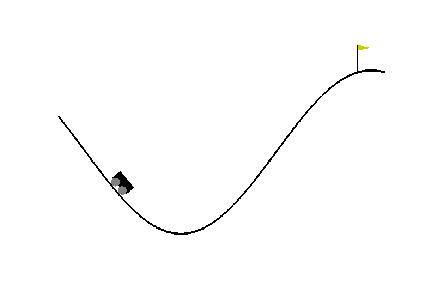
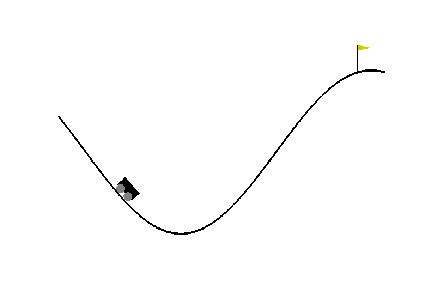
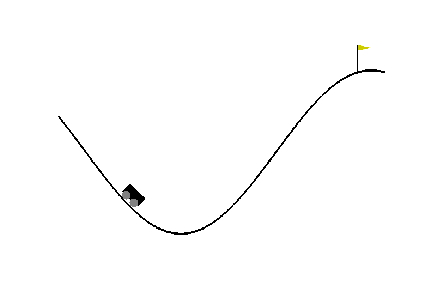
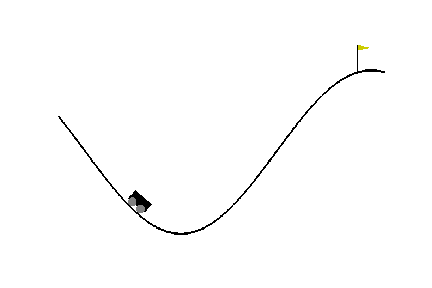
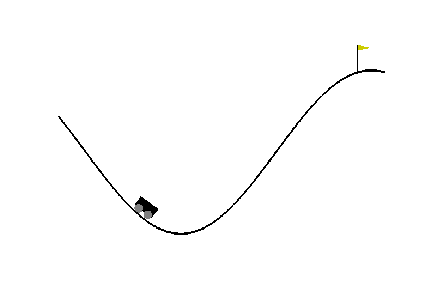
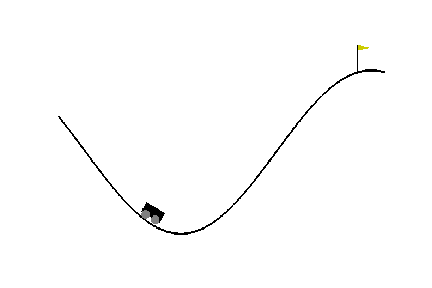
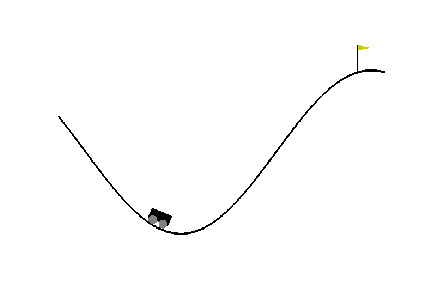
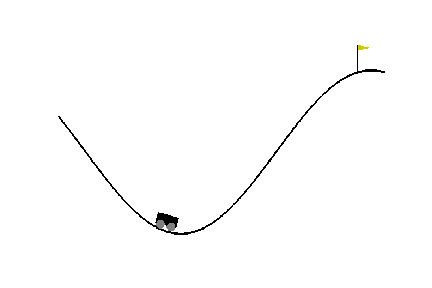
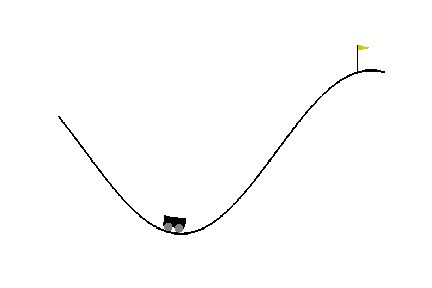
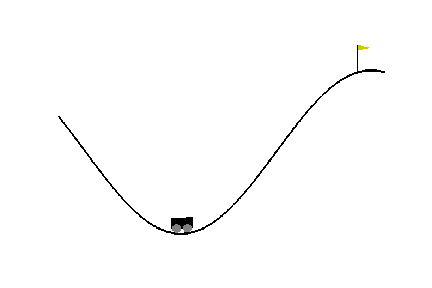
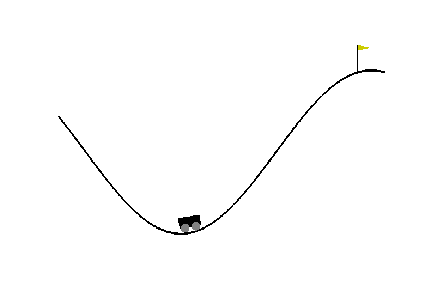
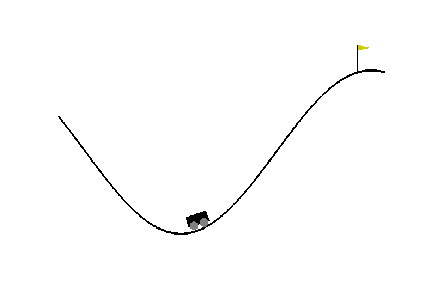
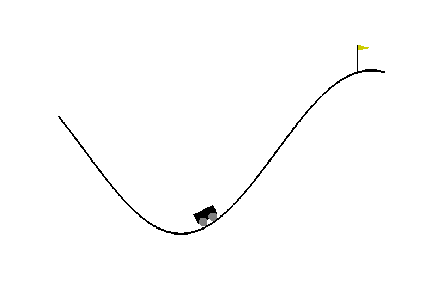
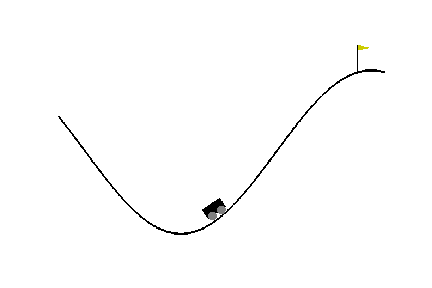
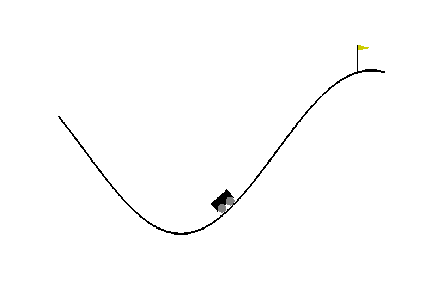
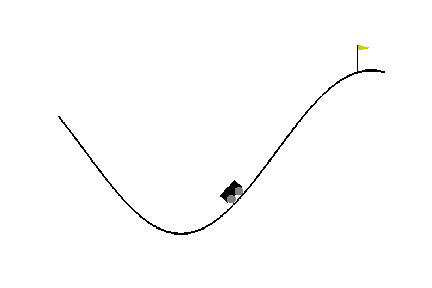
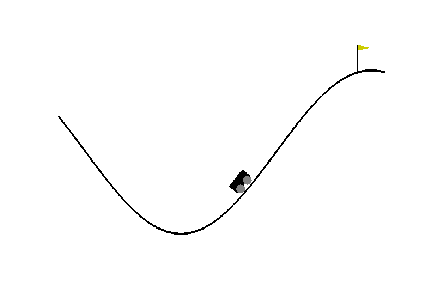
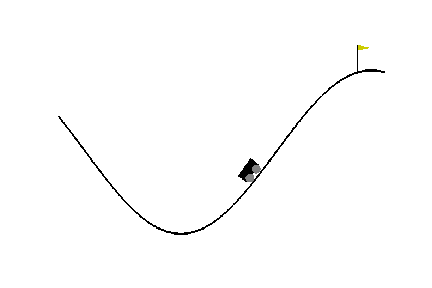
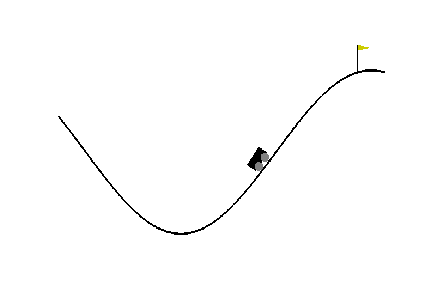
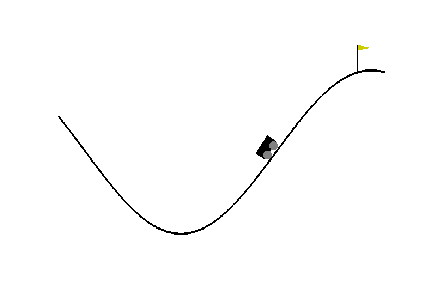
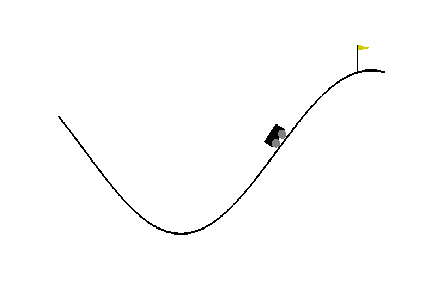
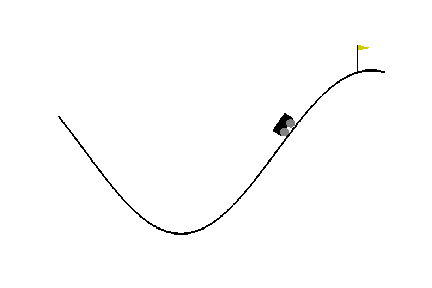
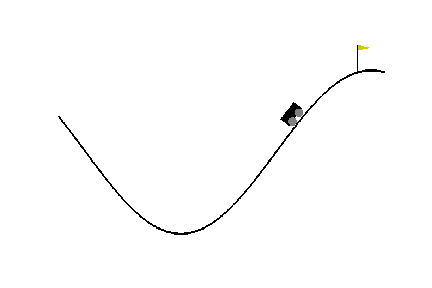
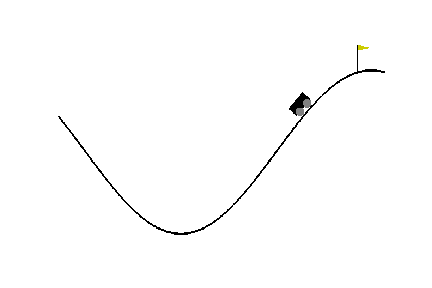
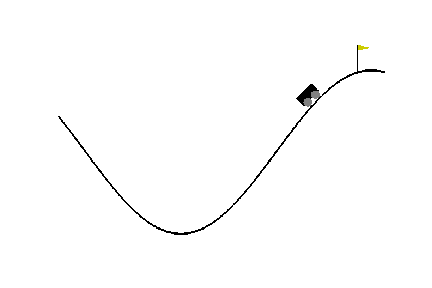
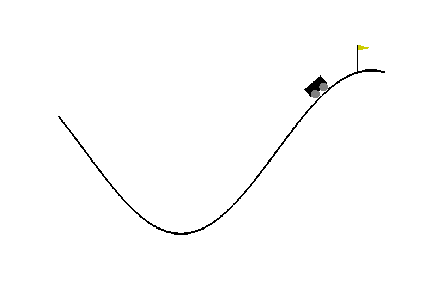
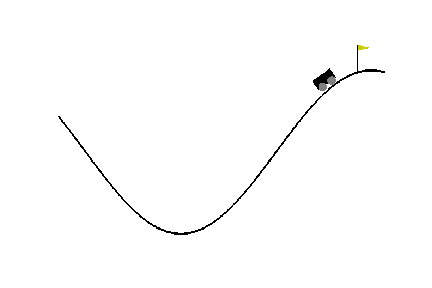
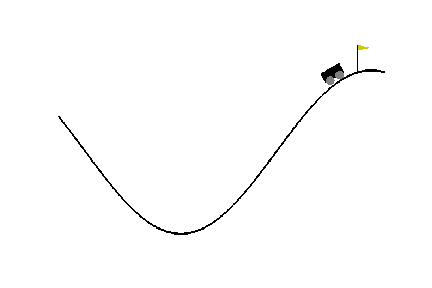
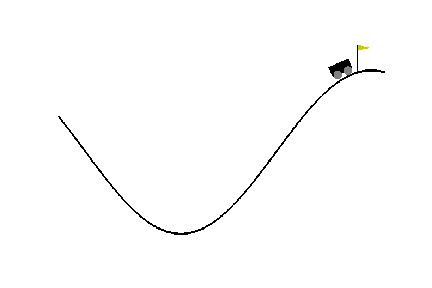
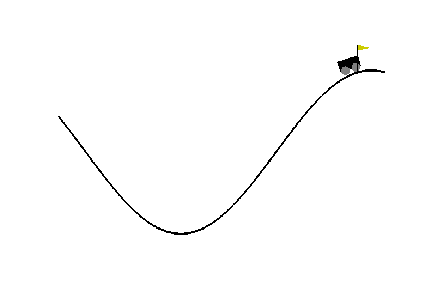

In [20]:
env = gym.make(envname)
obs = env.reset()
obs = np.reshape(obs,[1,-1])
total_reward = 0
frames = []
for t in range(10000):
    # Render into buffer. 
    frames.append(env.render(mode = 'rgb_array'))
    nz_obs = (obs - demo_obs_mean)/demo_obs_std
    action = 
    obs, reward, done, info = env.step(action)
    obs = np.reshape(obs,[1,-1])
    total_reward += reward
    if done:
        break
env.close()
print('Total Reward : %.2f'%total_reward)
display_frames_as_gif(frames)

# Another Problem : Pendulum-v0

### Load data from pickle file

In [4]:
envname="Pendulum-v0"

# Load demonstrations
demo_file = open('./'+envname+'_expert_demo.pkl', 'rb')
demonstrations = pickle.load(demo_file)
demonstrations = shuffle(demonstrations)

# Check expert's performance
exp_ret = np.mean([np.sum(d['rewards']) for d in demonstrations])
print('Expert\'s Average Cumulative Rewards {:.3f}'.format(exp_ret))

demo_observes = []
demo_actions = []
for demonstration in demonstrations:
    for obs in demonstration['observes']:
        demo_observes.append(obs)
    for act in demonstration['actions']:
        demo_actions.append(act)
demo_observes=np.asarray(demo_observes)
demo_actions=np.asarray(demo_actions)

demo_observes, demo_actions = shuffle(demo_observes, demo_actions)

demo_observes=demo_observes[:100,:]
demo_actions=demo_actions[:100,:]

obs_dim = demo_observes.shape[1]
act_dim = demo_actions.shape[1]

print("Observation data has shape {}".format(demo_observes.shape))
print("Action data has shape {}".format(demo_actions.shape))

Expert's Average Cumulative Rewards -79.331
Observation data has shape (100, 3)
Action data has shape (100, 1)


### Run Gaussian Process Regression

In [9]:
kernel = 
gp =

demo_obs_mean =
demo_obs_std =
nz_demo_observes =

gpr =

c:\users\user\appdata\local\programs\python\python35\lib\site-packages\sklearn\gaussian_process\gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([ 0.01193237, -0.01577268]), 'funcalls': 121, 'nit': 17, 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'warnflag': 2}
  " state: %s" % convergence_dict)
c:\users\user\appdata\local\programs\python\python35\lib\site-packages\sklearn\gaussian_process\gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([  3.2019043 , -23.63846163]), 'funcalls': 55, 'nit': 3, 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'warnflag': 2}
  " state: %s" % convergence_dict)
c:\users\user\appdata\local\programs\python\python35\lib\site-packages\sklearn\gaussian_process\gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([ 18.04785156, -28.16102706]), 'funcalls': 46, 'nit': 2, 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'warnflag': 2}
  " state: %s" % c

### Test GPR controller!

WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
Total Reward : -362.51



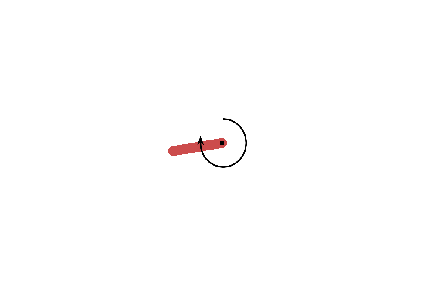
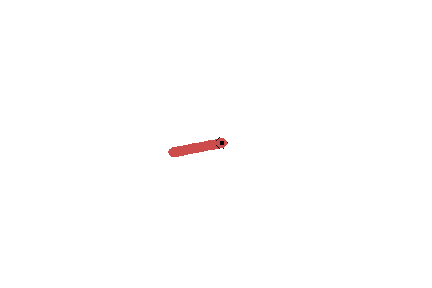
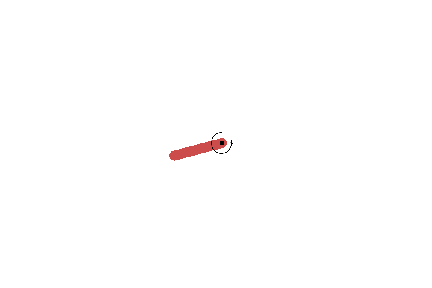
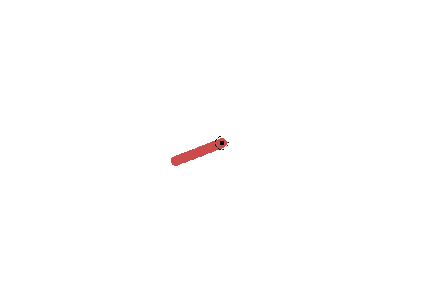
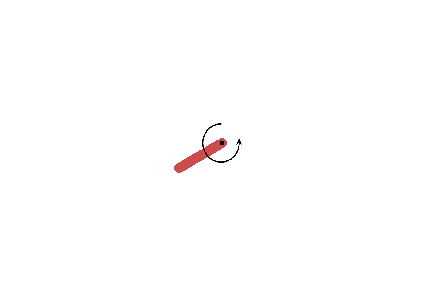
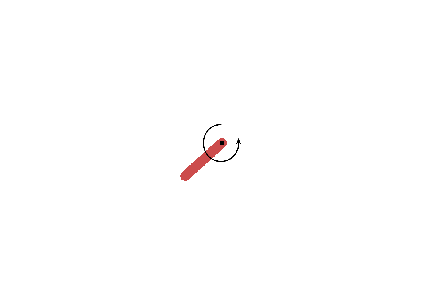
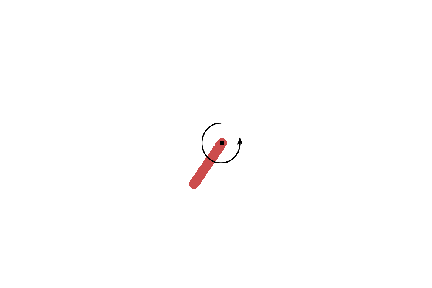
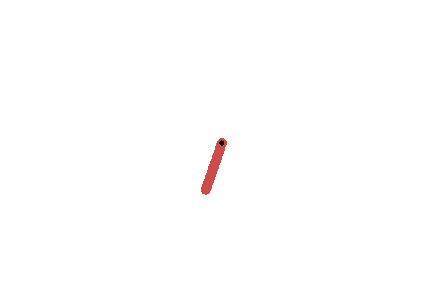
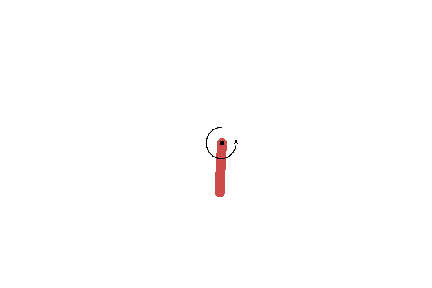
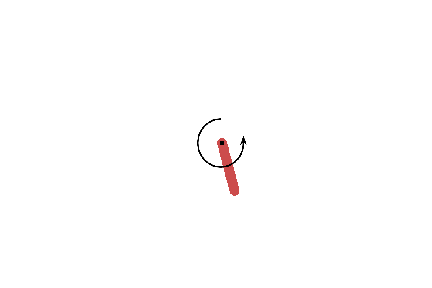
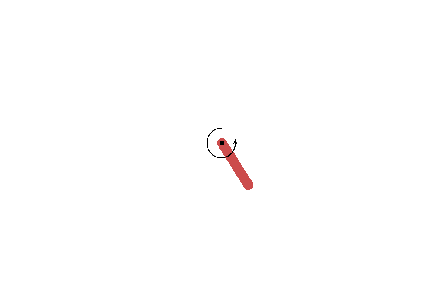
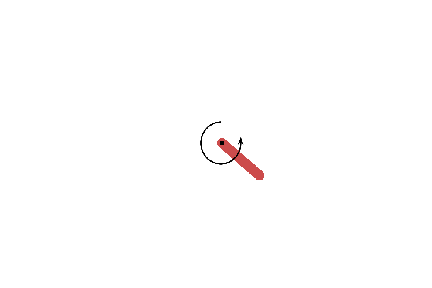
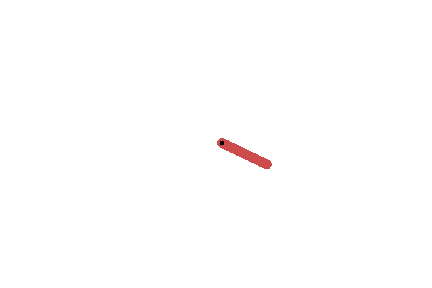
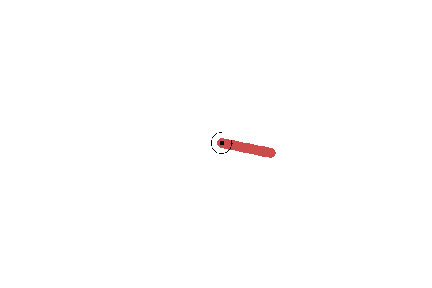
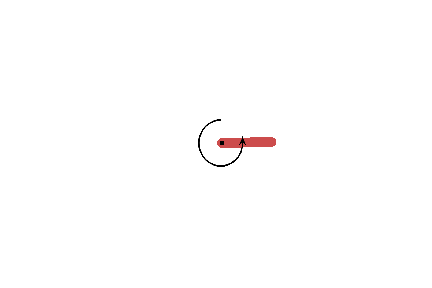
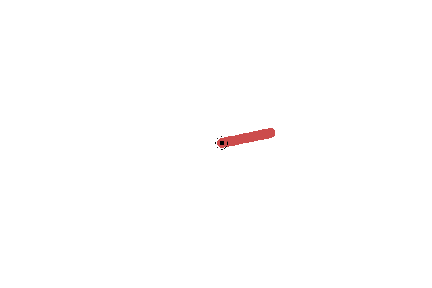
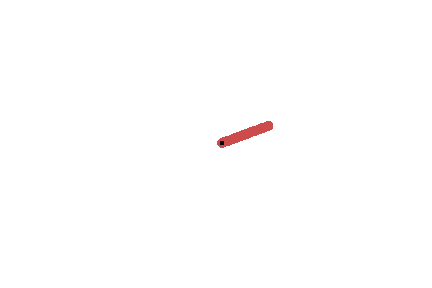
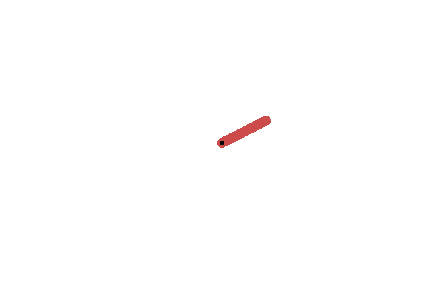
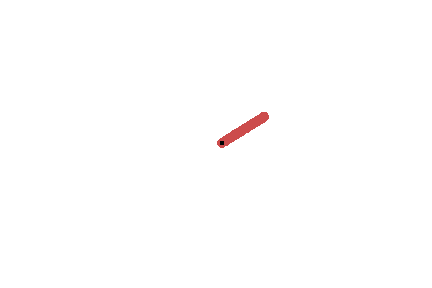
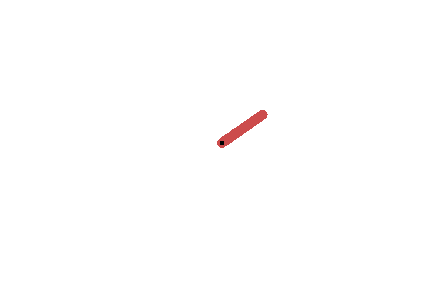
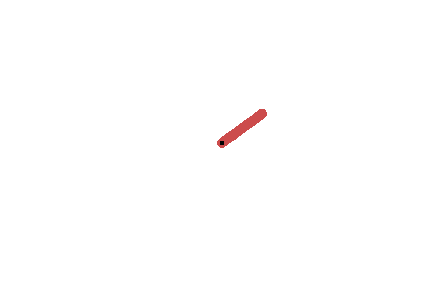
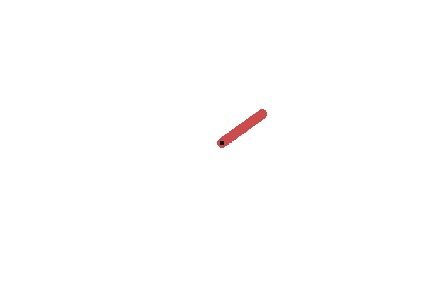
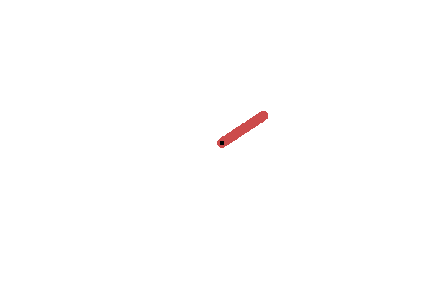
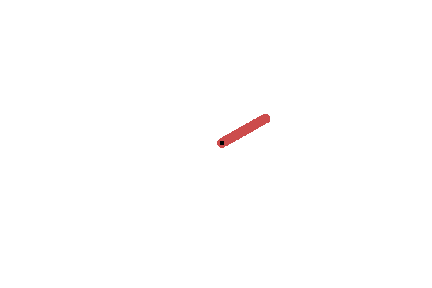
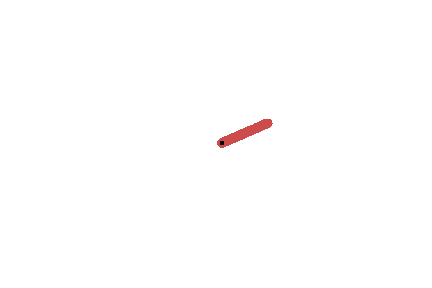
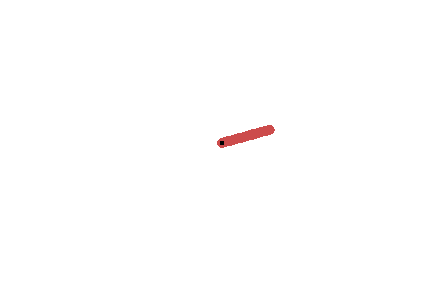
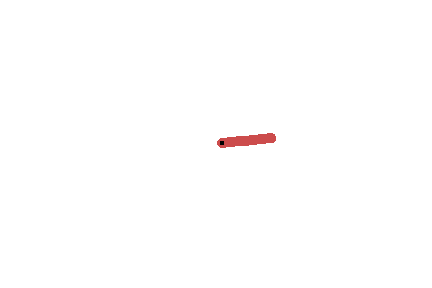
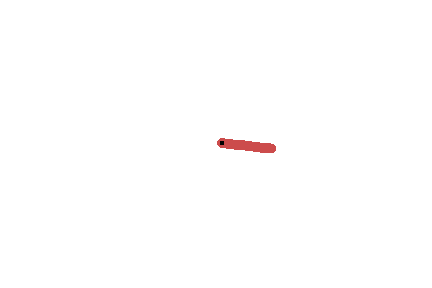
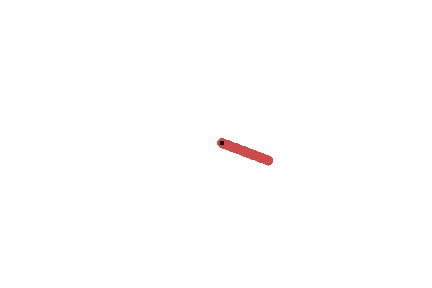
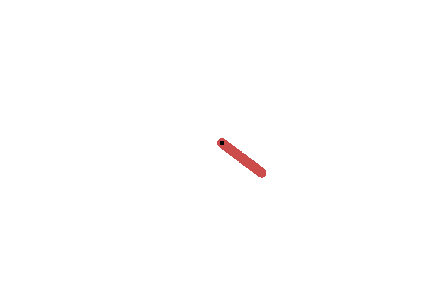
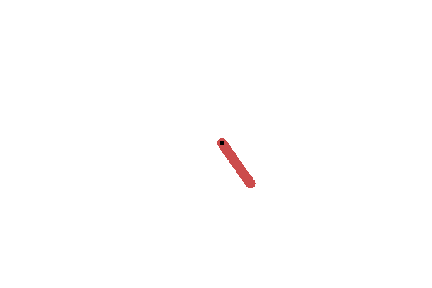
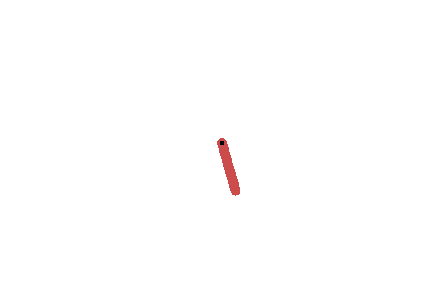
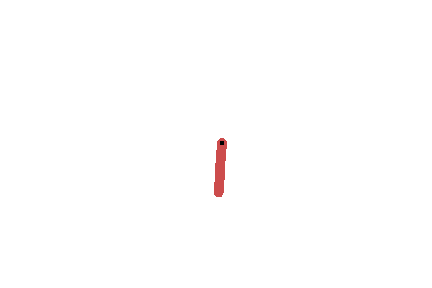
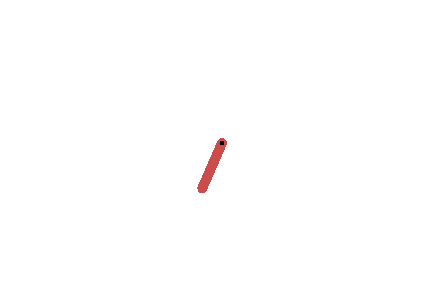
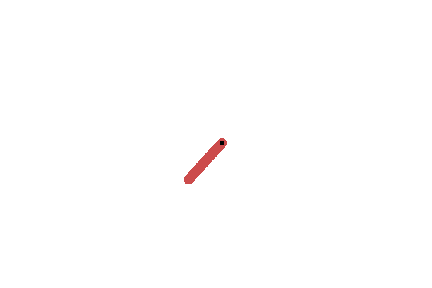
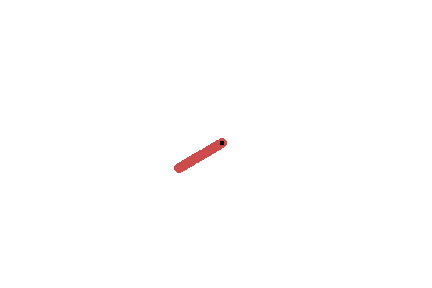
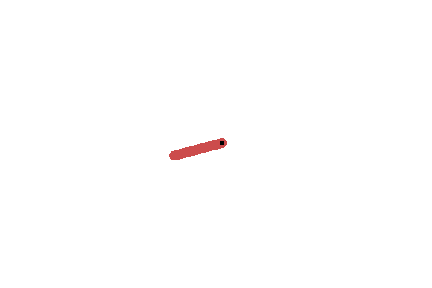
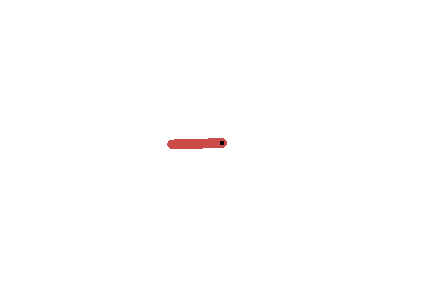
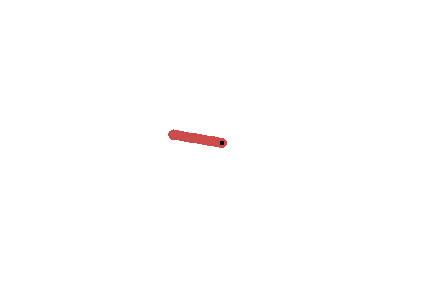
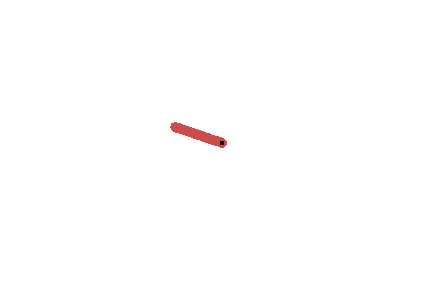
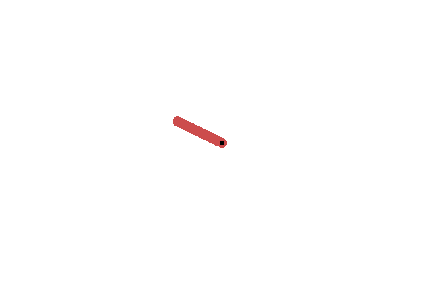
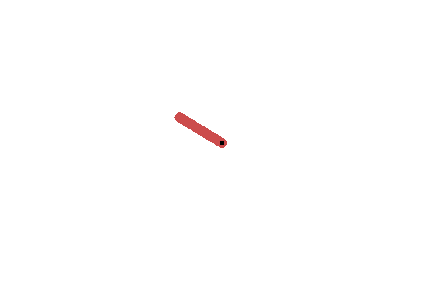
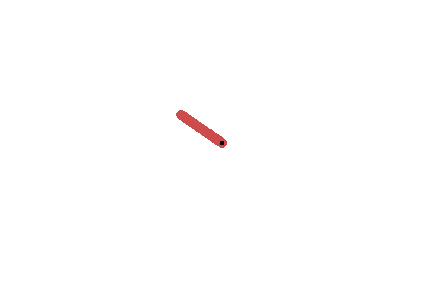
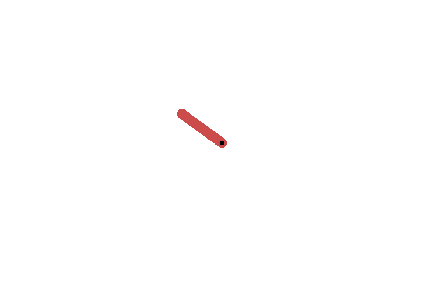
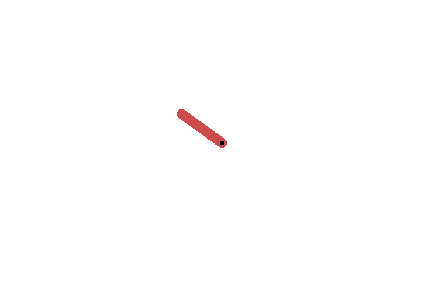
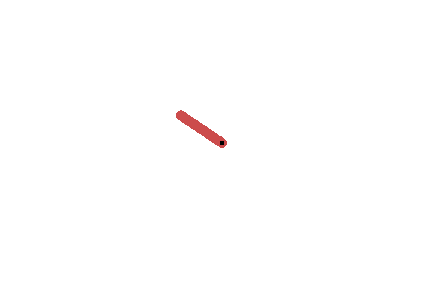
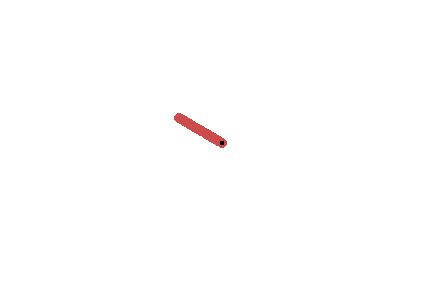
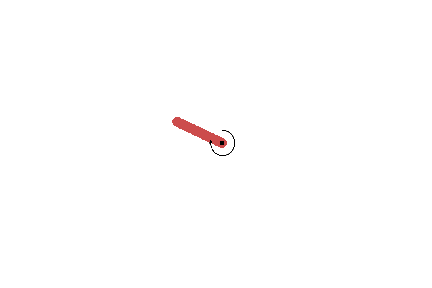
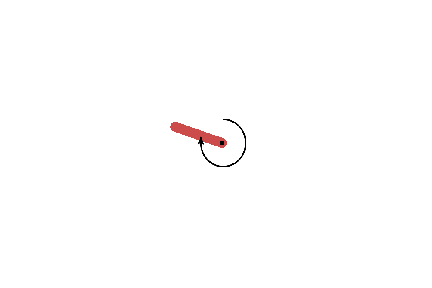
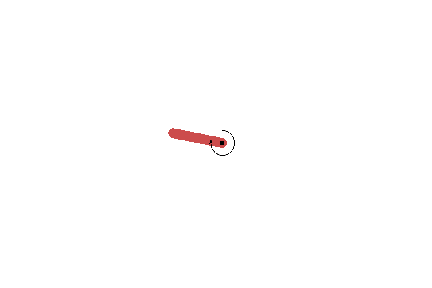
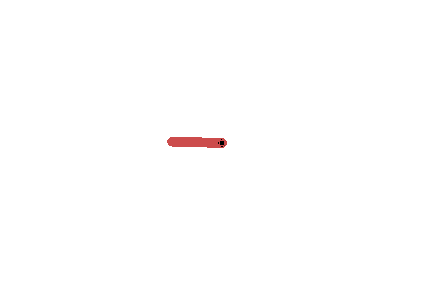
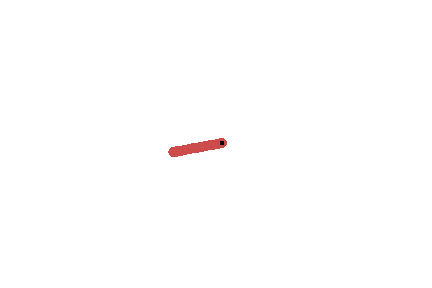
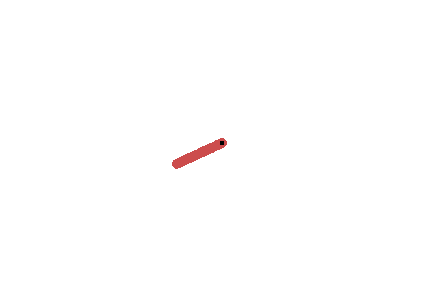
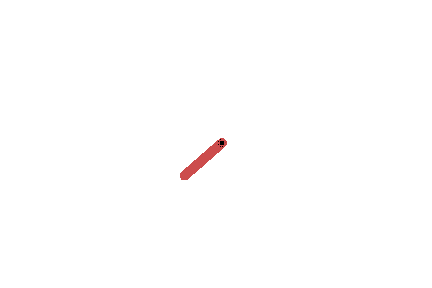
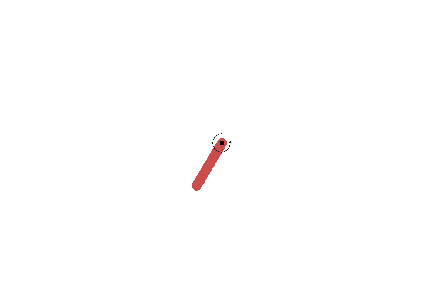
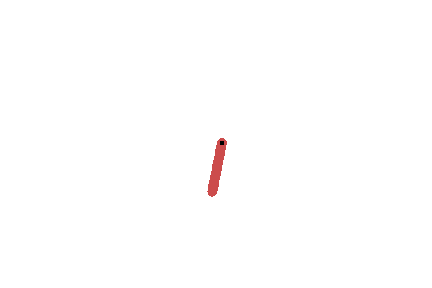
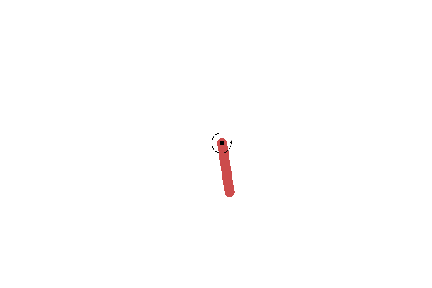
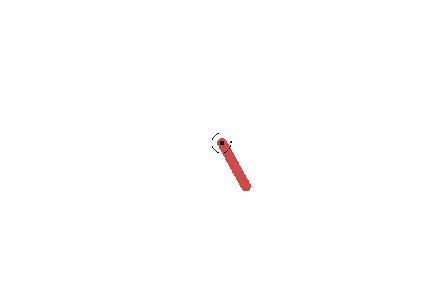
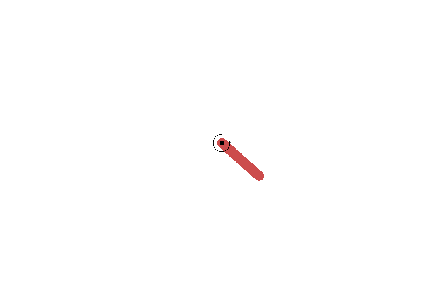
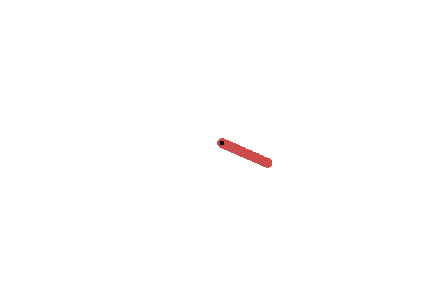
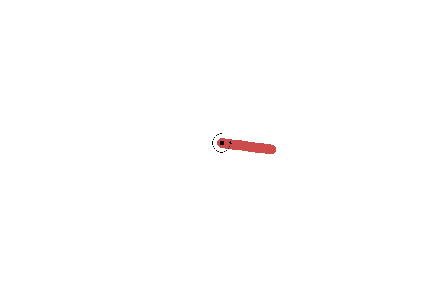
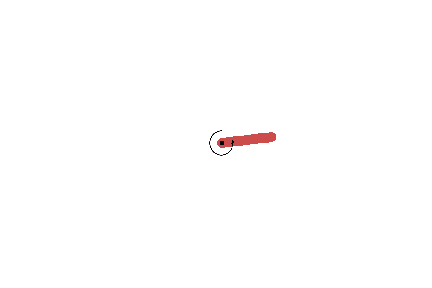
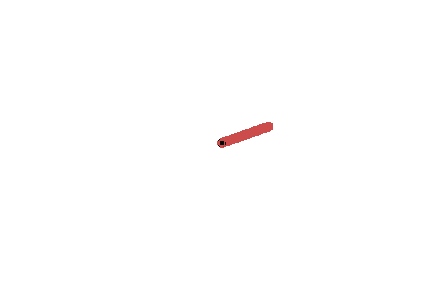
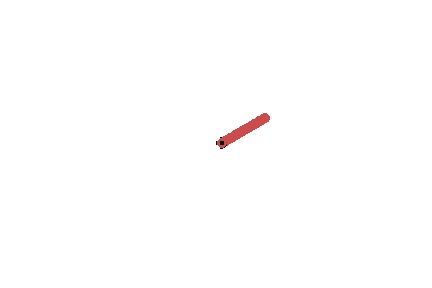
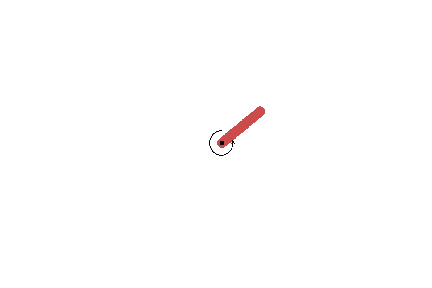
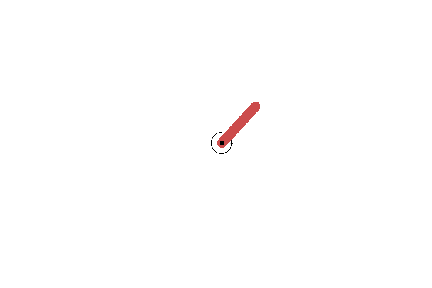
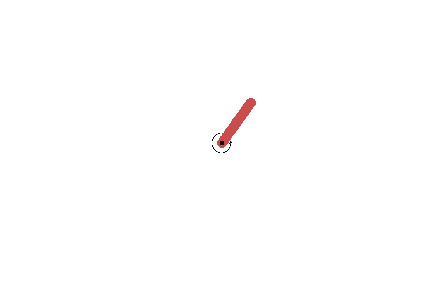
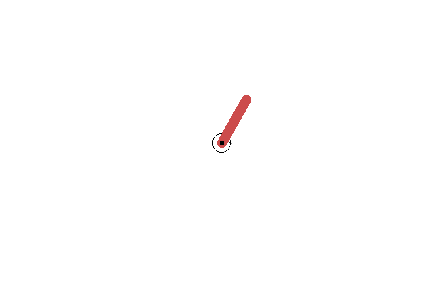
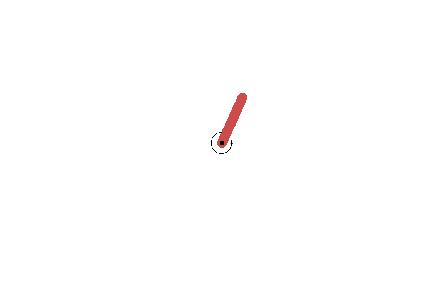
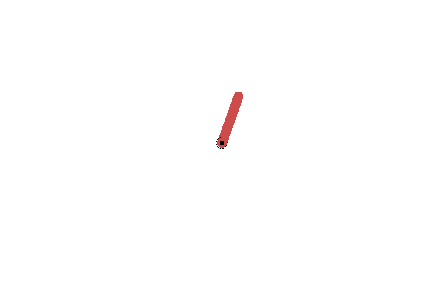
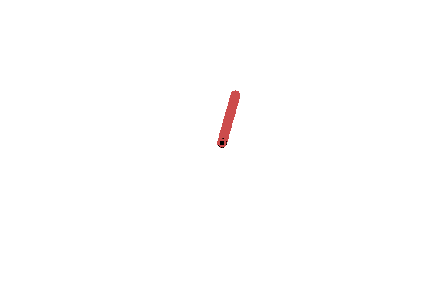
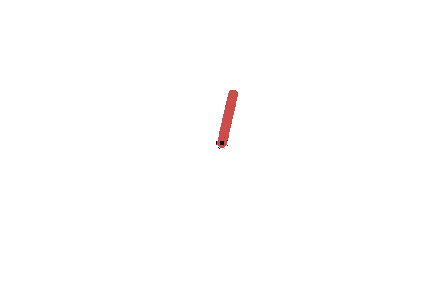
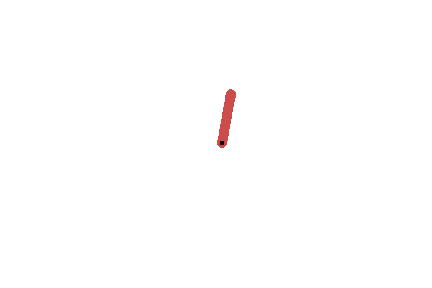
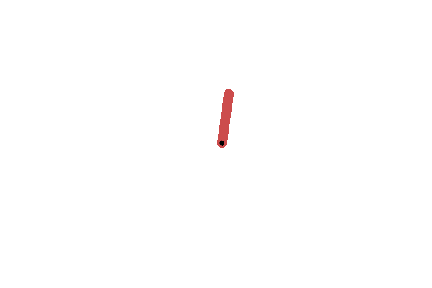
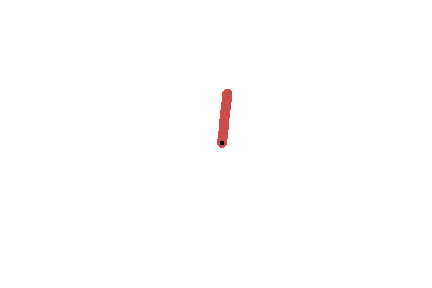
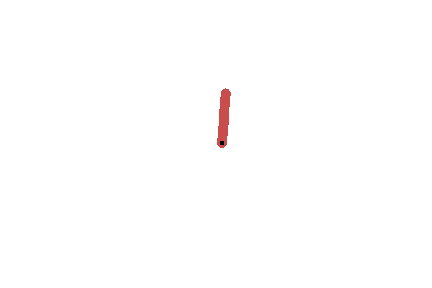
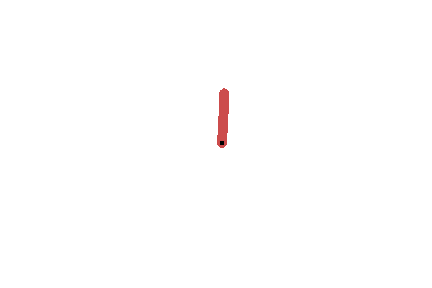
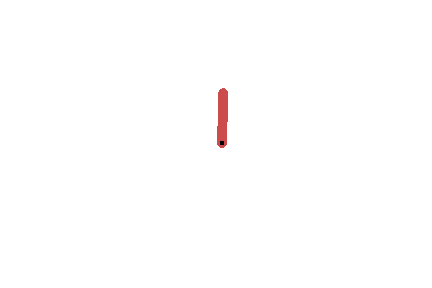
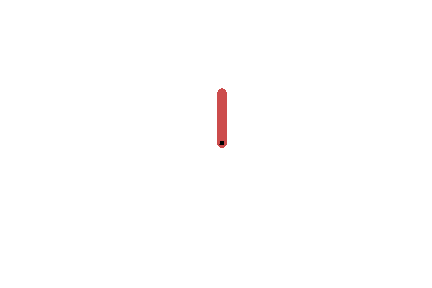
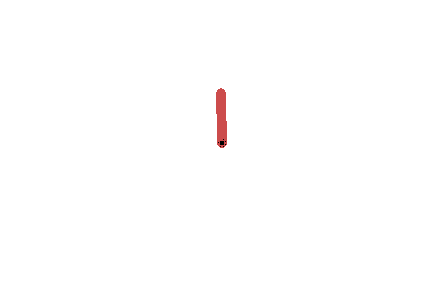
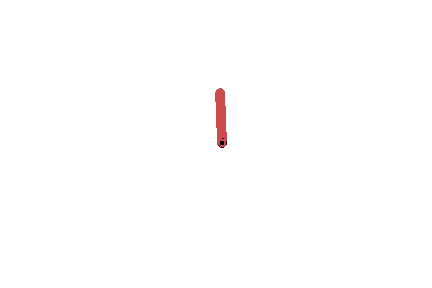
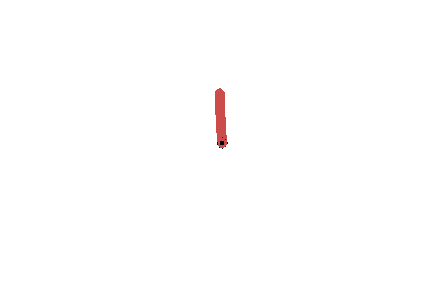
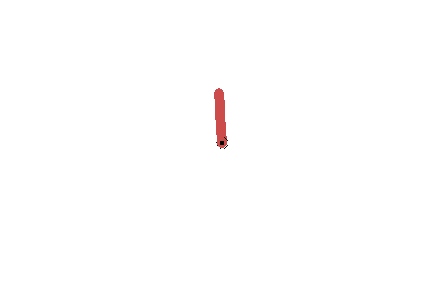
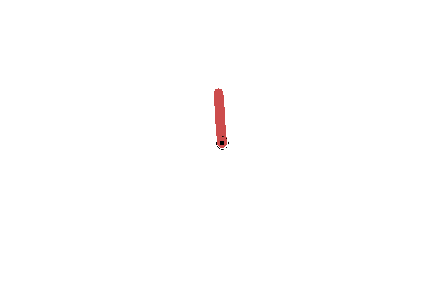
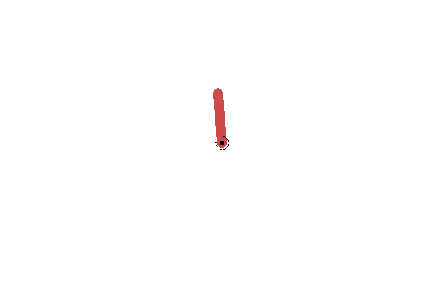
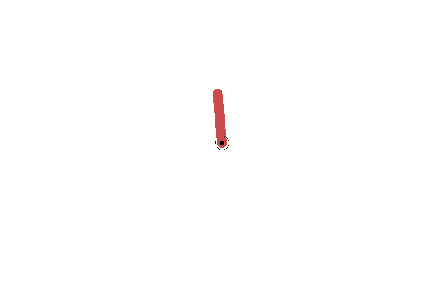
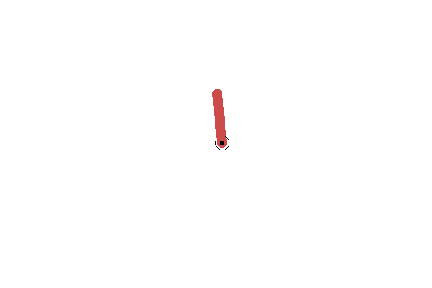
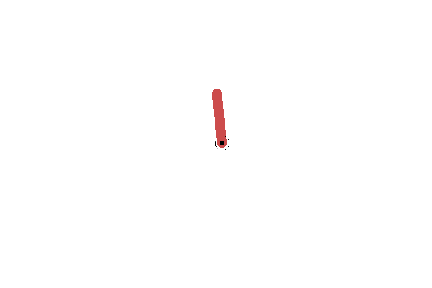
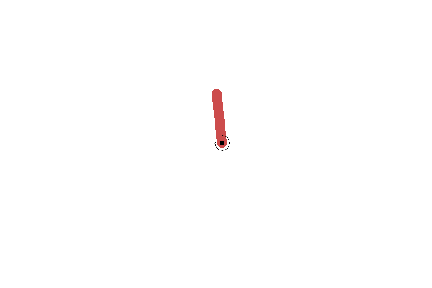
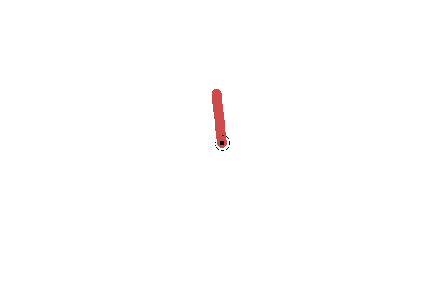
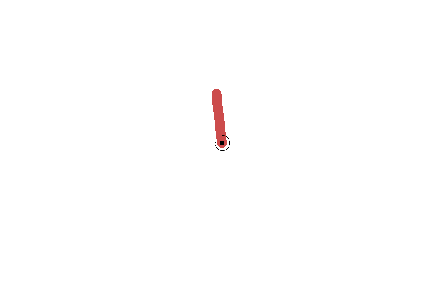
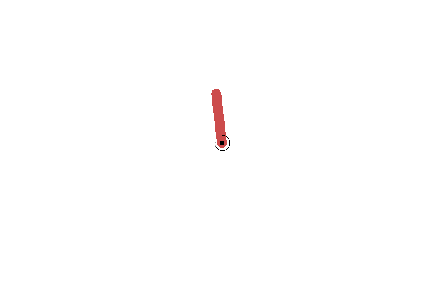
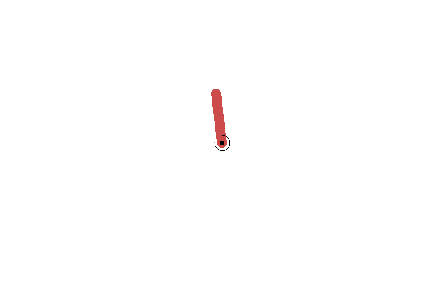
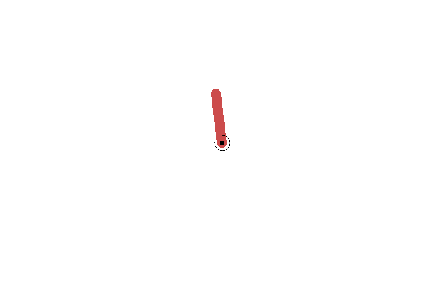
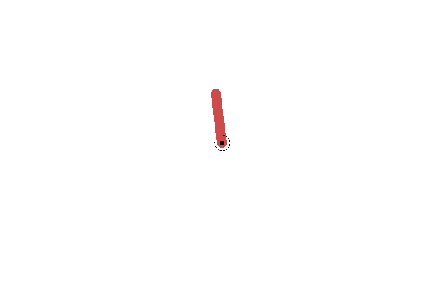
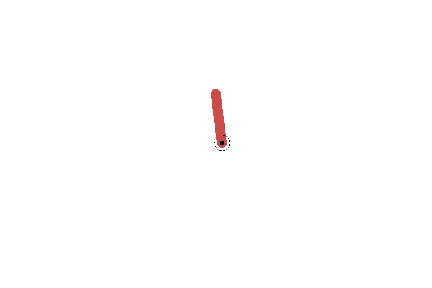
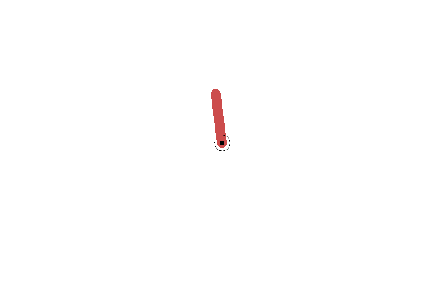
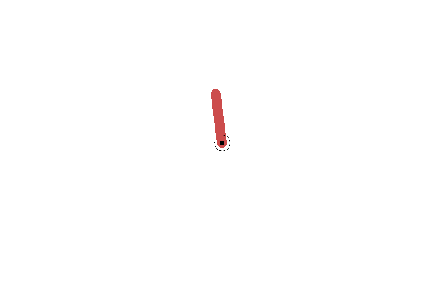
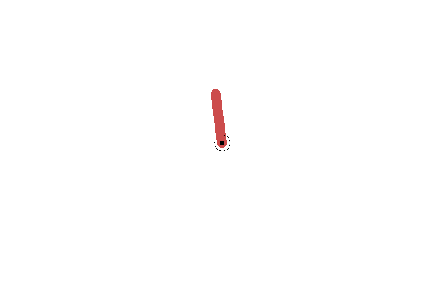
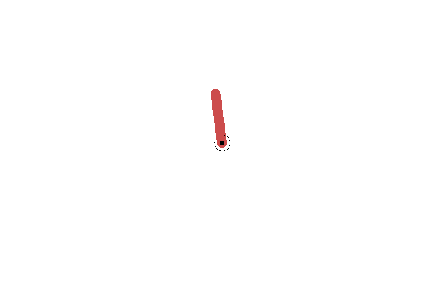
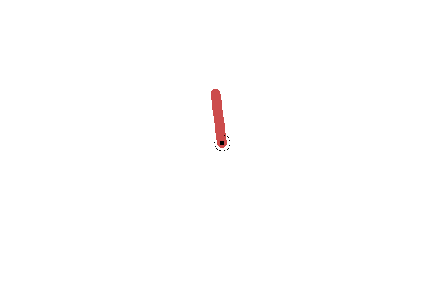
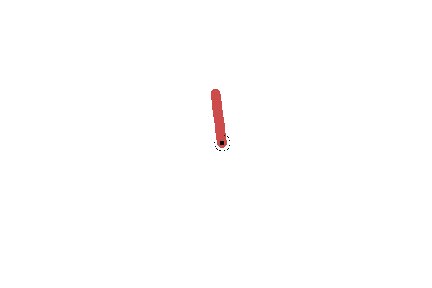
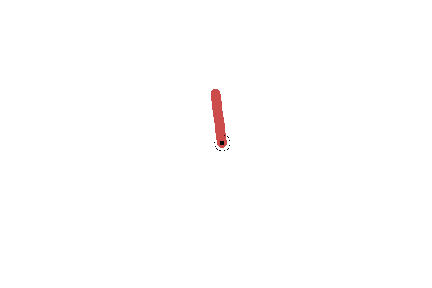
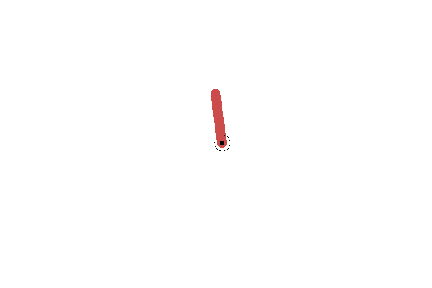
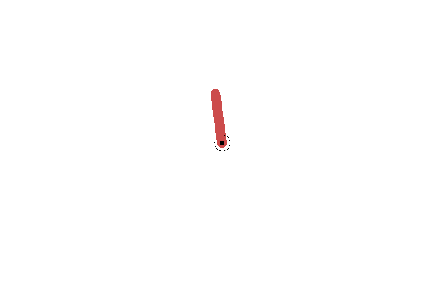
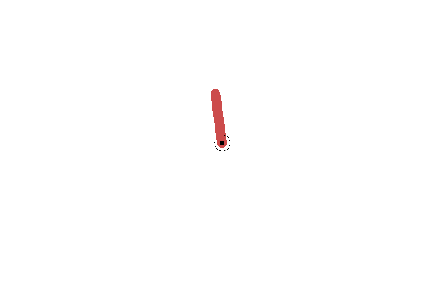
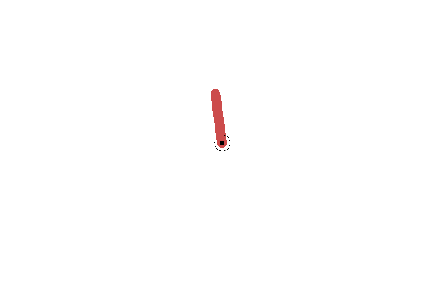
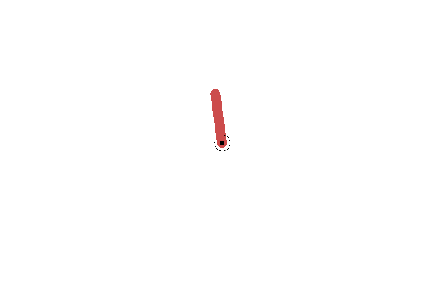
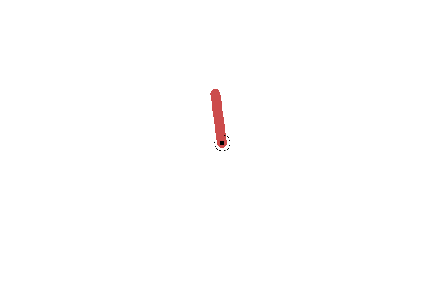
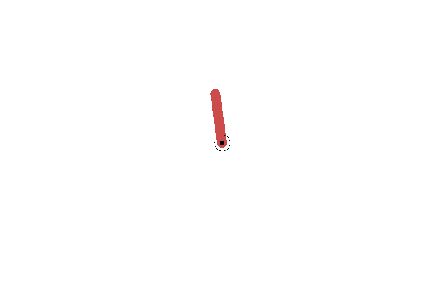
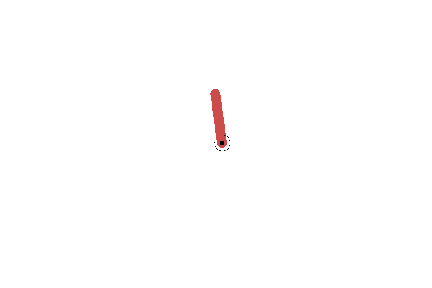
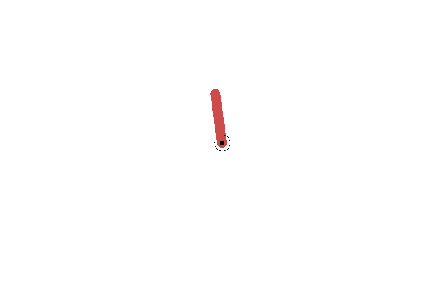
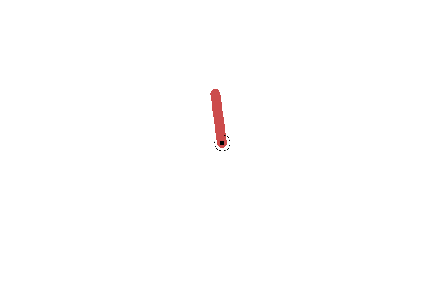
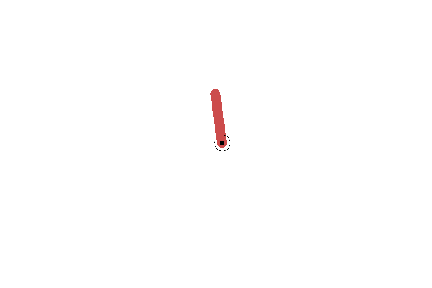
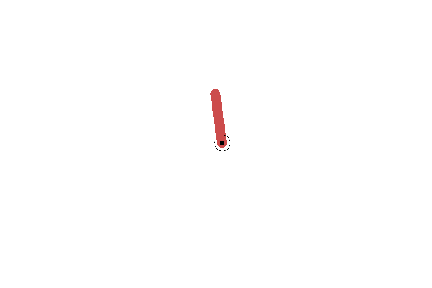
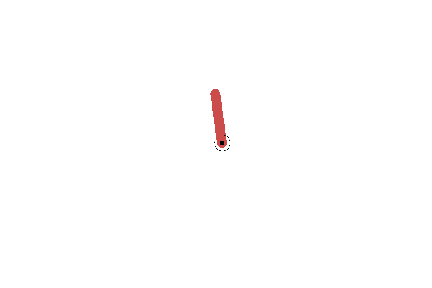
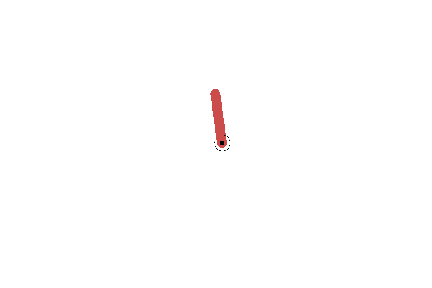
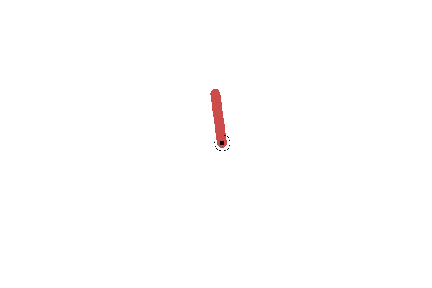
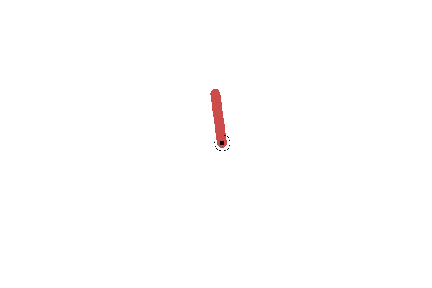
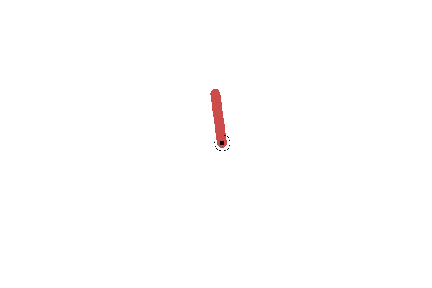
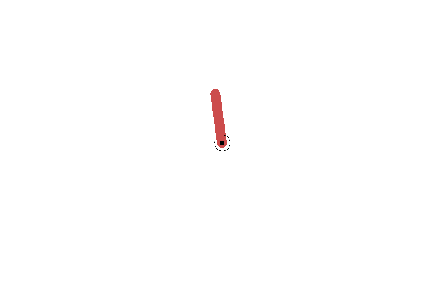
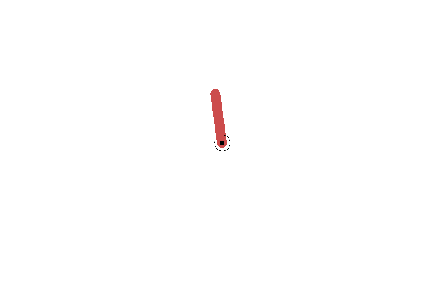
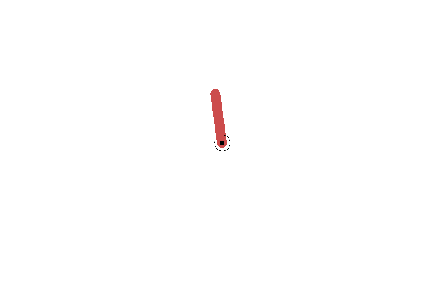
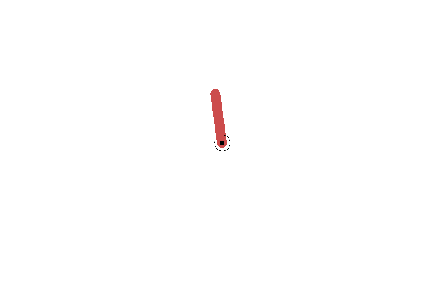
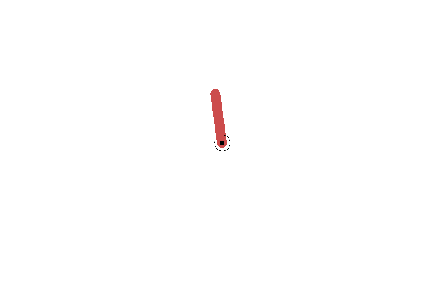
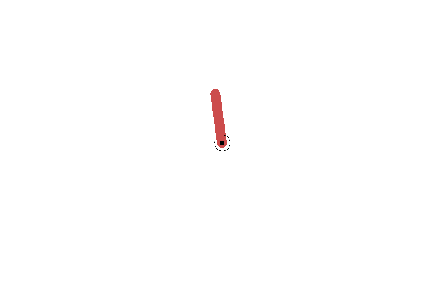
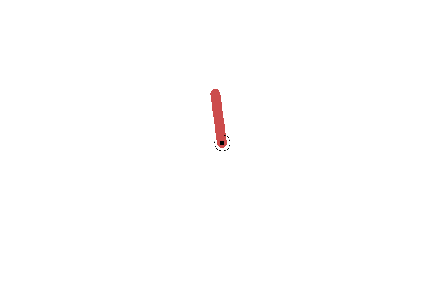
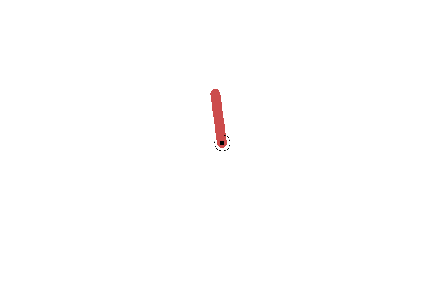
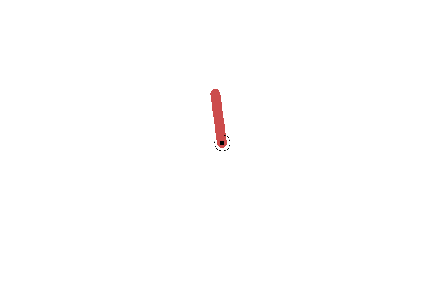
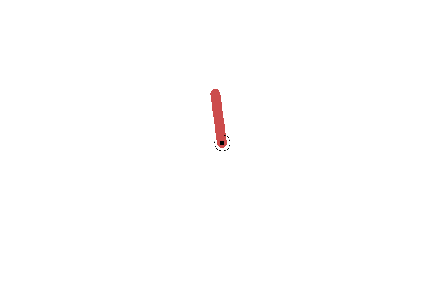
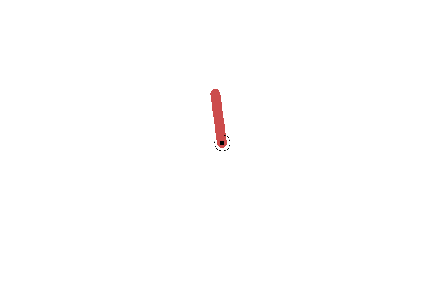
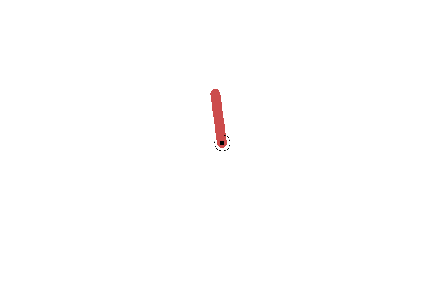
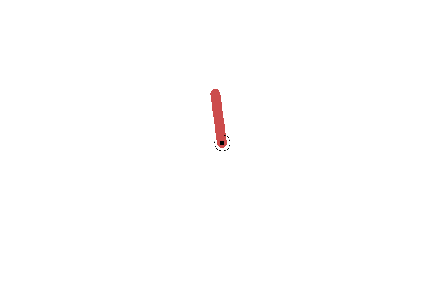
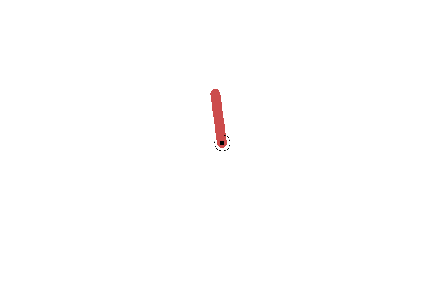
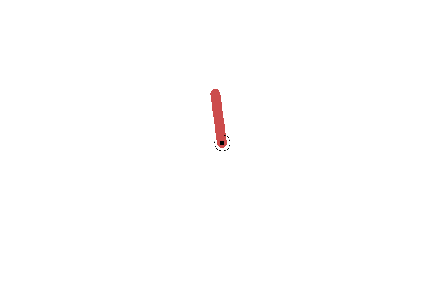
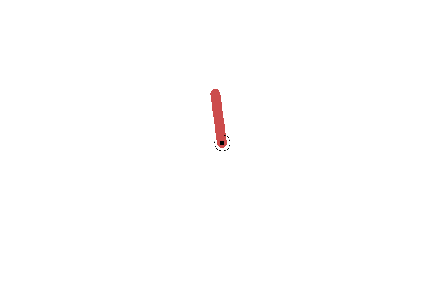
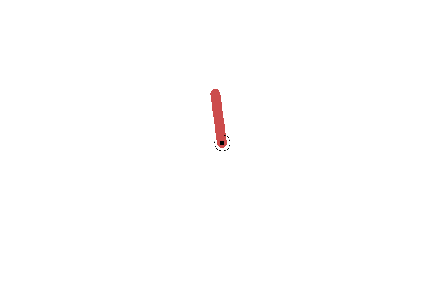
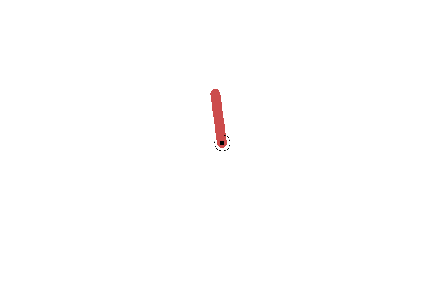
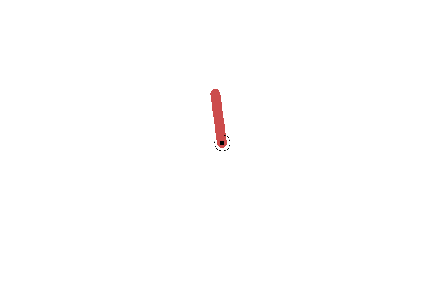
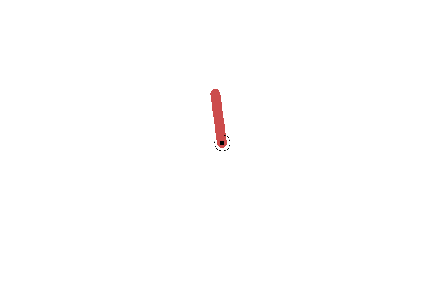
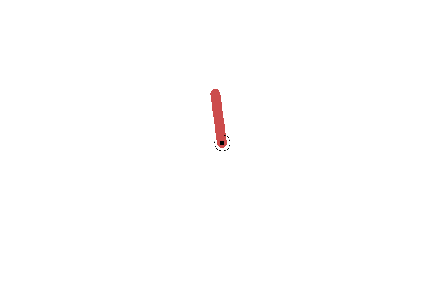
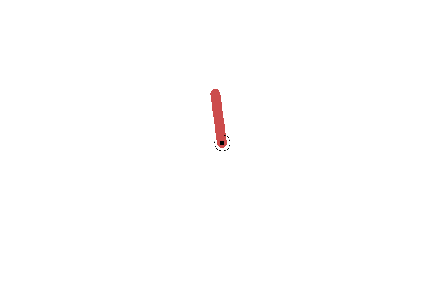
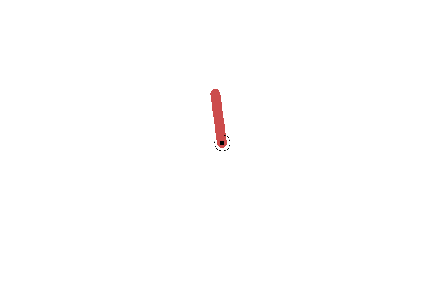
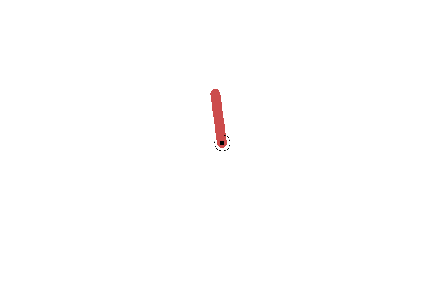
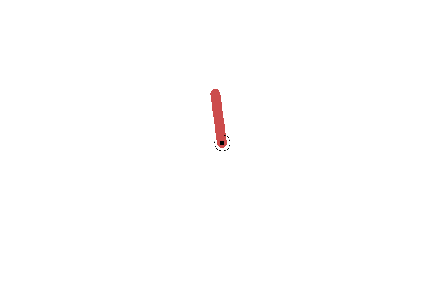
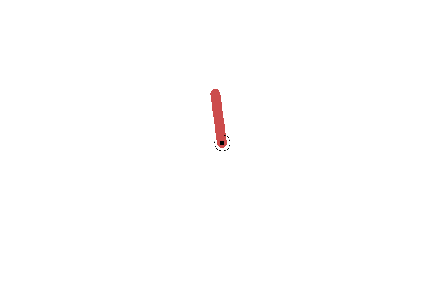
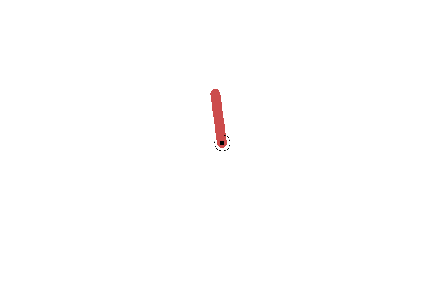
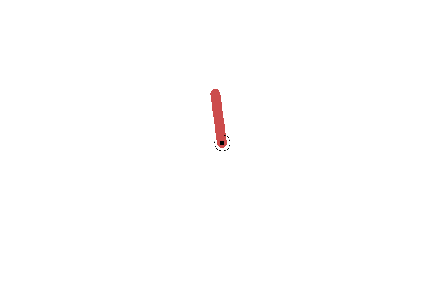
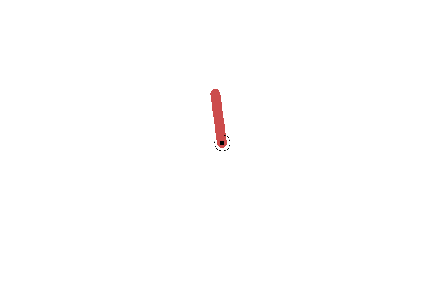
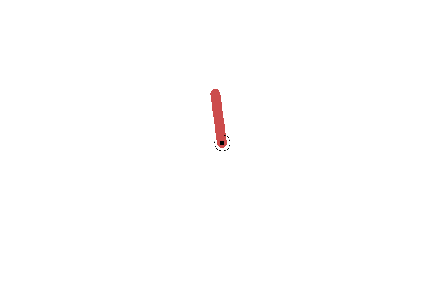
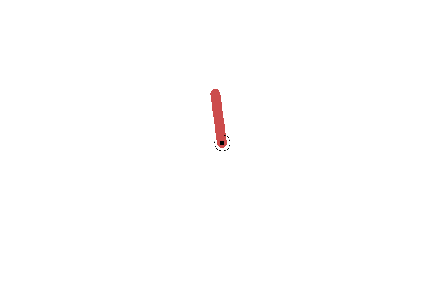
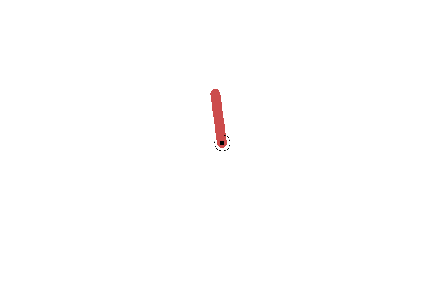
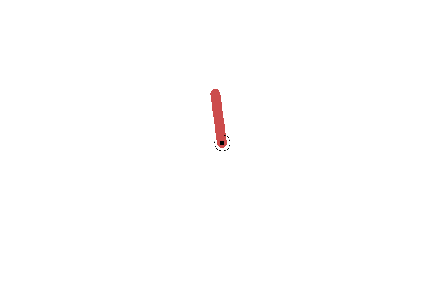
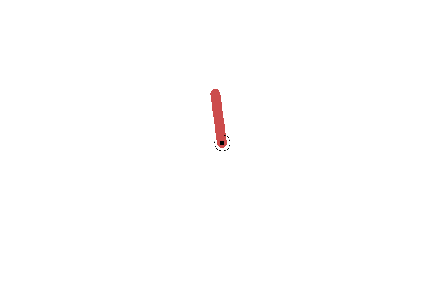
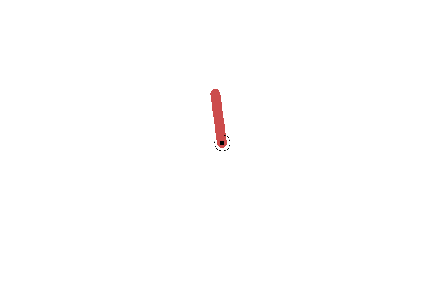
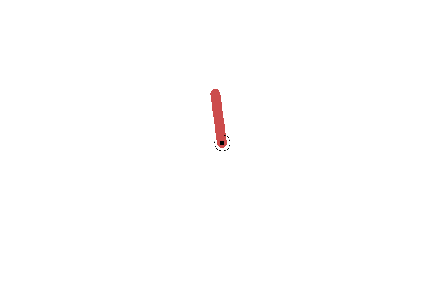
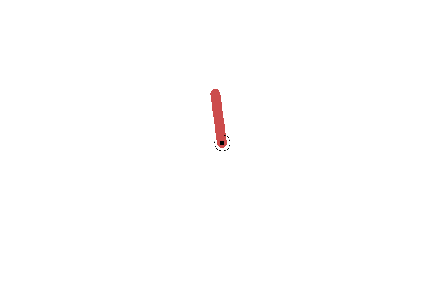
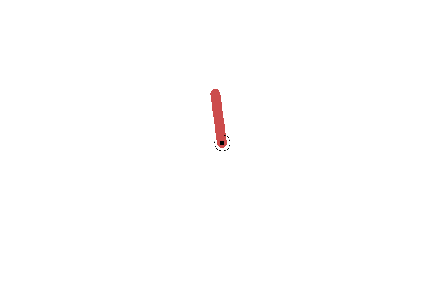
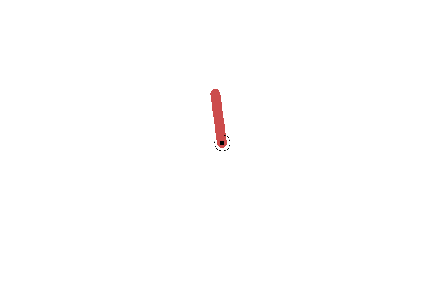
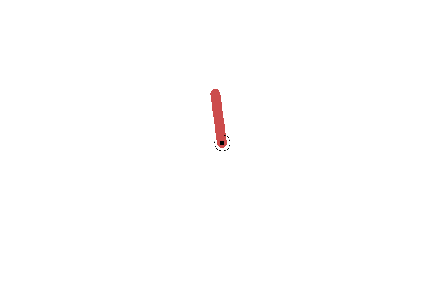
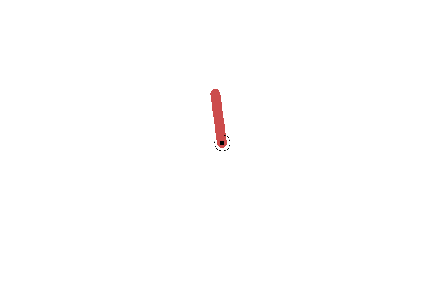
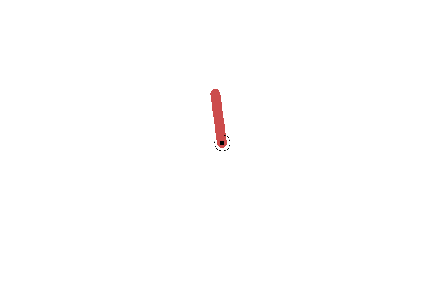
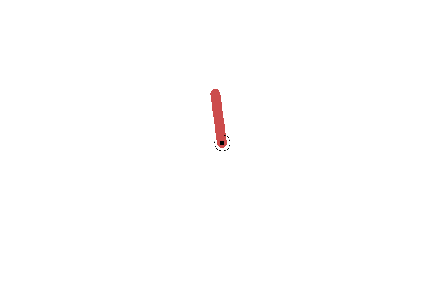
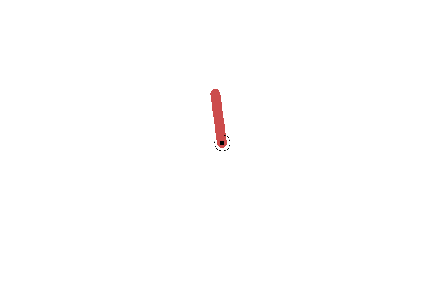
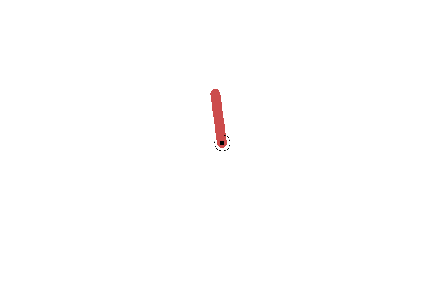
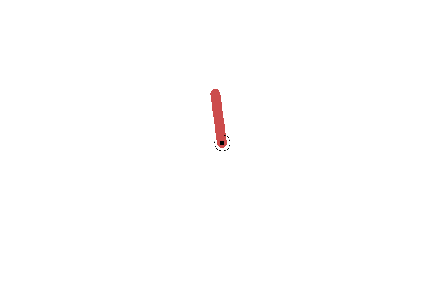
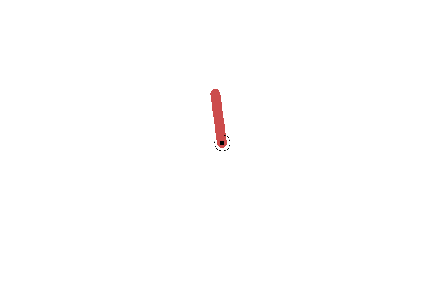
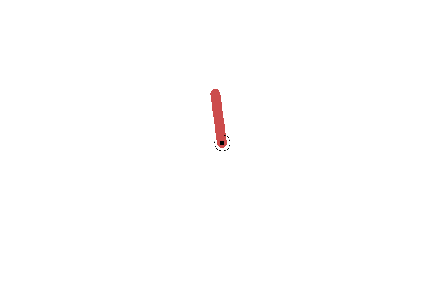
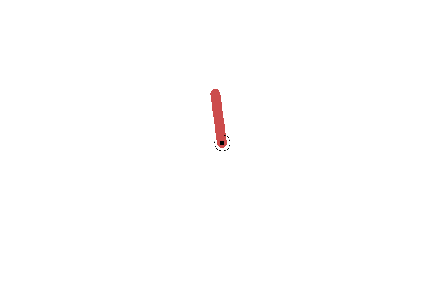
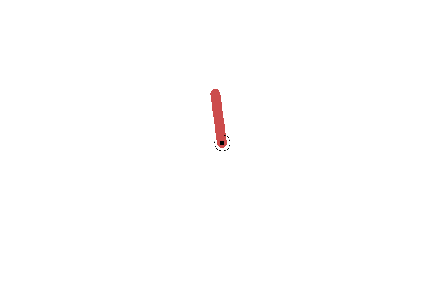
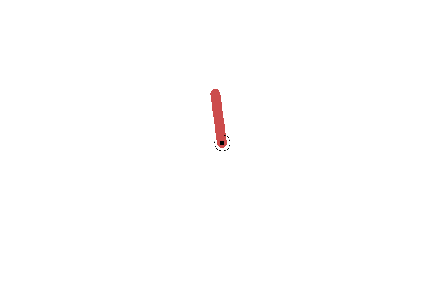
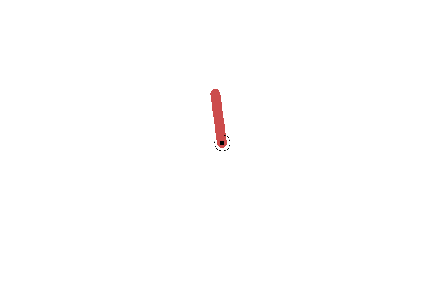
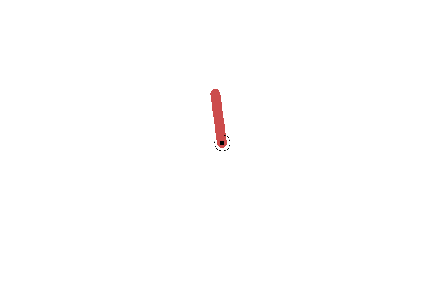
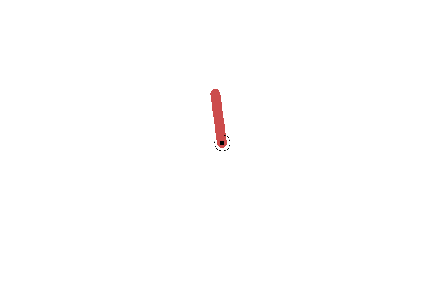
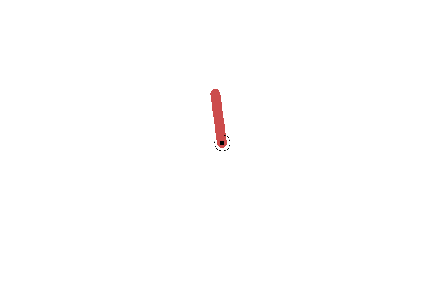
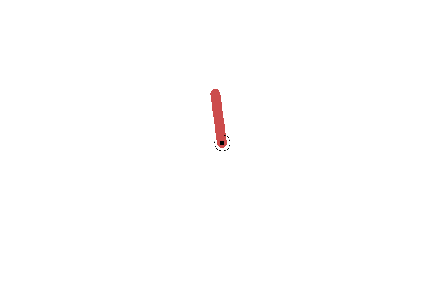
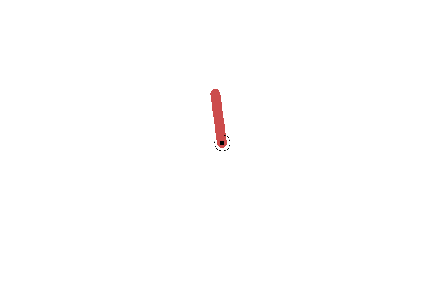
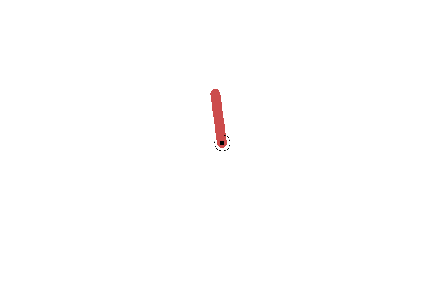
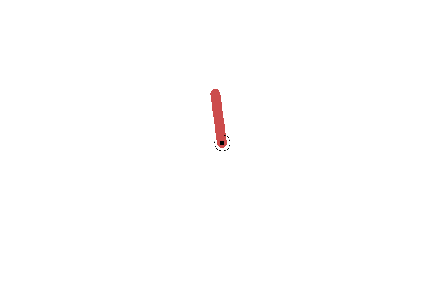
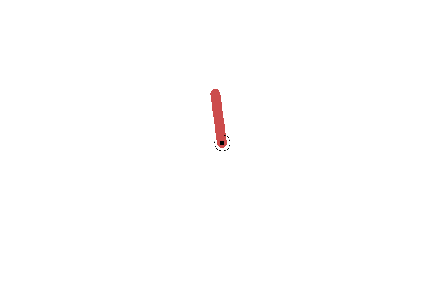
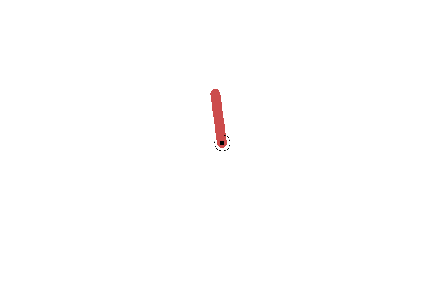
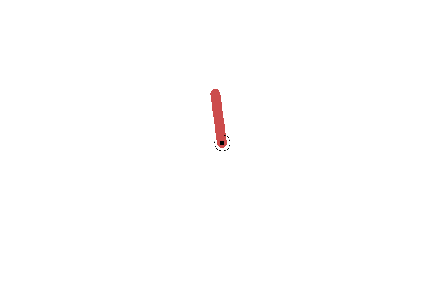
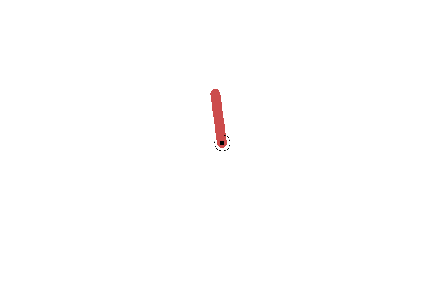
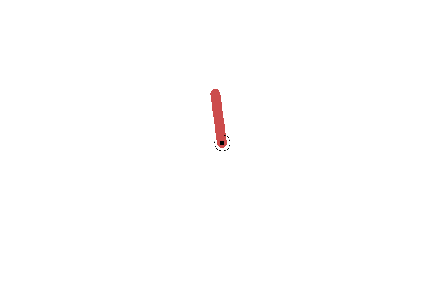
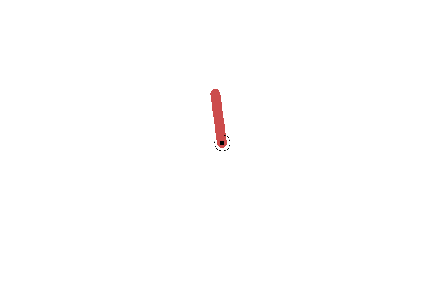
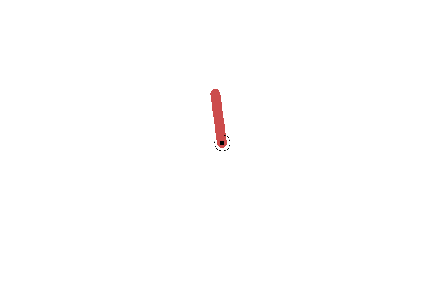
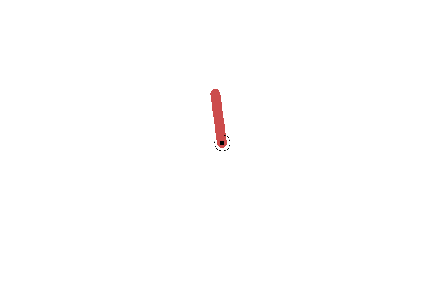
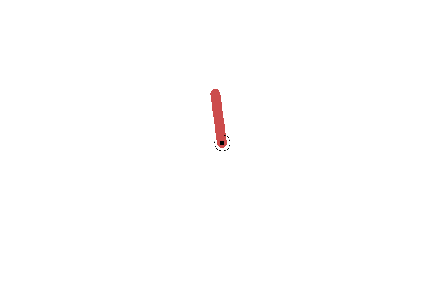
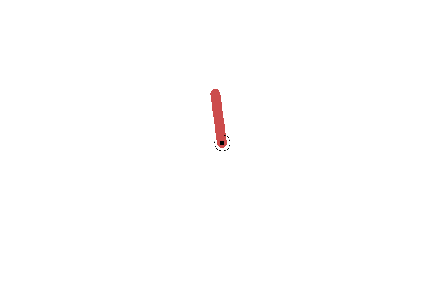
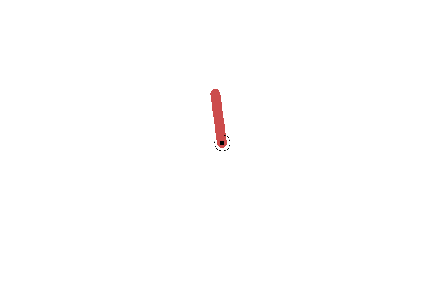
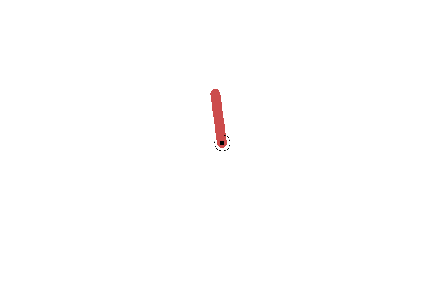
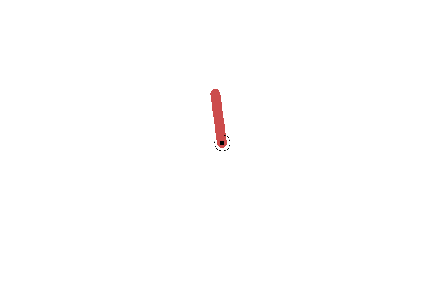
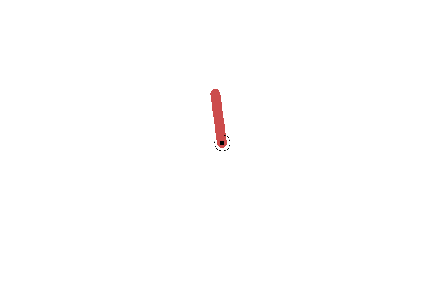
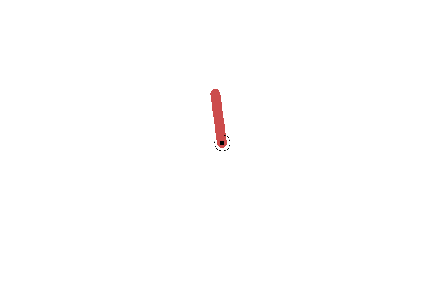
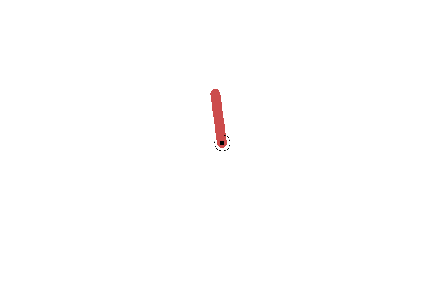
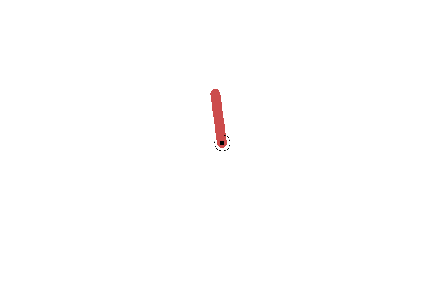
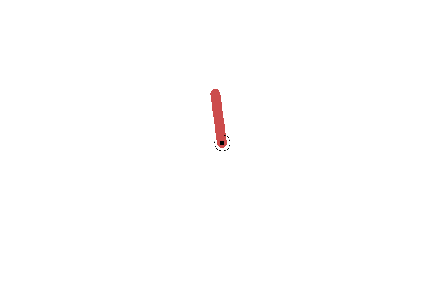
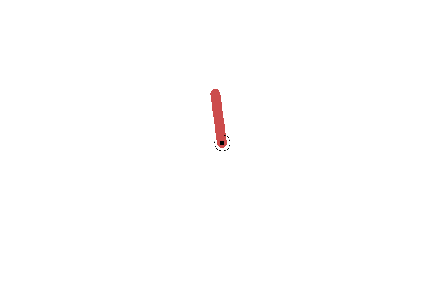
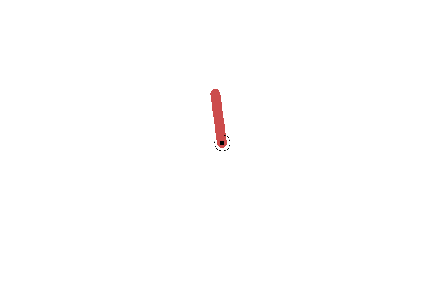
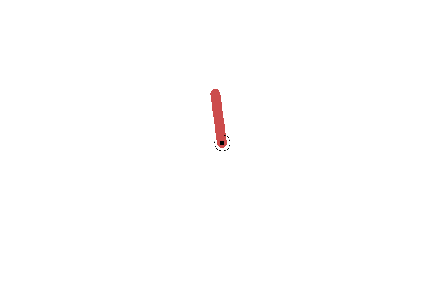

In [30]:
env = gym.make(envname)
obs = env.reset()
obs = np.reshape(obs,[1,-1])
total_reward = 0
frames = []
for t in range(10000):
    # Render into buffer. 
    frames.append(env.render(mode = 'rgb_array'))
    nz_obs = 
    action =
    obs, reward, done, info =
    obs =
    total_reward += reward
    if done:
        break
env.close()
print('Total Reward : %.2f'%total_reward)
display_frames_as_gif(frames)